In [1]:
import collections
import csv
import itertools
import json
import datetime
import time

#import ijson
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

import numpy as np
import pandas as pd
import seaborn as sns
import tqdm

In [2]:
LANGUAGES = {
    "python": "Python",
    "r": "R",
    "javascript": "Javascript",
    "java": "Java",
    "cpp": "C++",
    "php": "PHP",
    "ruby": "Ruby",
    "perl": "Perl",
    "rust": "Rust",
    "swift": "Swift",
    "objectivec": "Objective C",
    "c#": "C#",
}

In [3]:
chrysler_blue = "#3123D0"
mellow_blue = "#448AEB"
ripe_red = "#DC0B0B"


In [4]:
LIMITS = [0, 10, 100, 1000]

Opening new page 1
Processing python
	 Processing resource...
Processing r
	 Processing resource...
Processing javascript
	 Processing resource...
saving page 1
Opening new page 2
Processing java
	 Processing resource...
Processing cpp
	 Processing resource...
Processing php
	 Processing resource...
saving page 2
Opening new page 3
Processing ruby
	 Processing resource...
Processing perl
	 Processing resource...
Processing rust
	 Processing resource...
saving page 3
Opening new page 4
Processing swift
	 Processing resource...
Processing objectivec
	 Processing resource...
Processing c#
	 Processing resource...
saving page 4
Opening new page 1
Processing python
	 Processing resource...
Processing r
	 Processing resource...
Processing javascript
	 Processing resource...
saving page 1
Opening new page 2
Processing java
	 Processing resource...
Processing cpp
	 Processing resource...
Processing php
	 Processing resource...
saving page 2
Opening new page 3
Processing ruby
	 Processing resou

<Figure size 640x480 with 0 Axes>

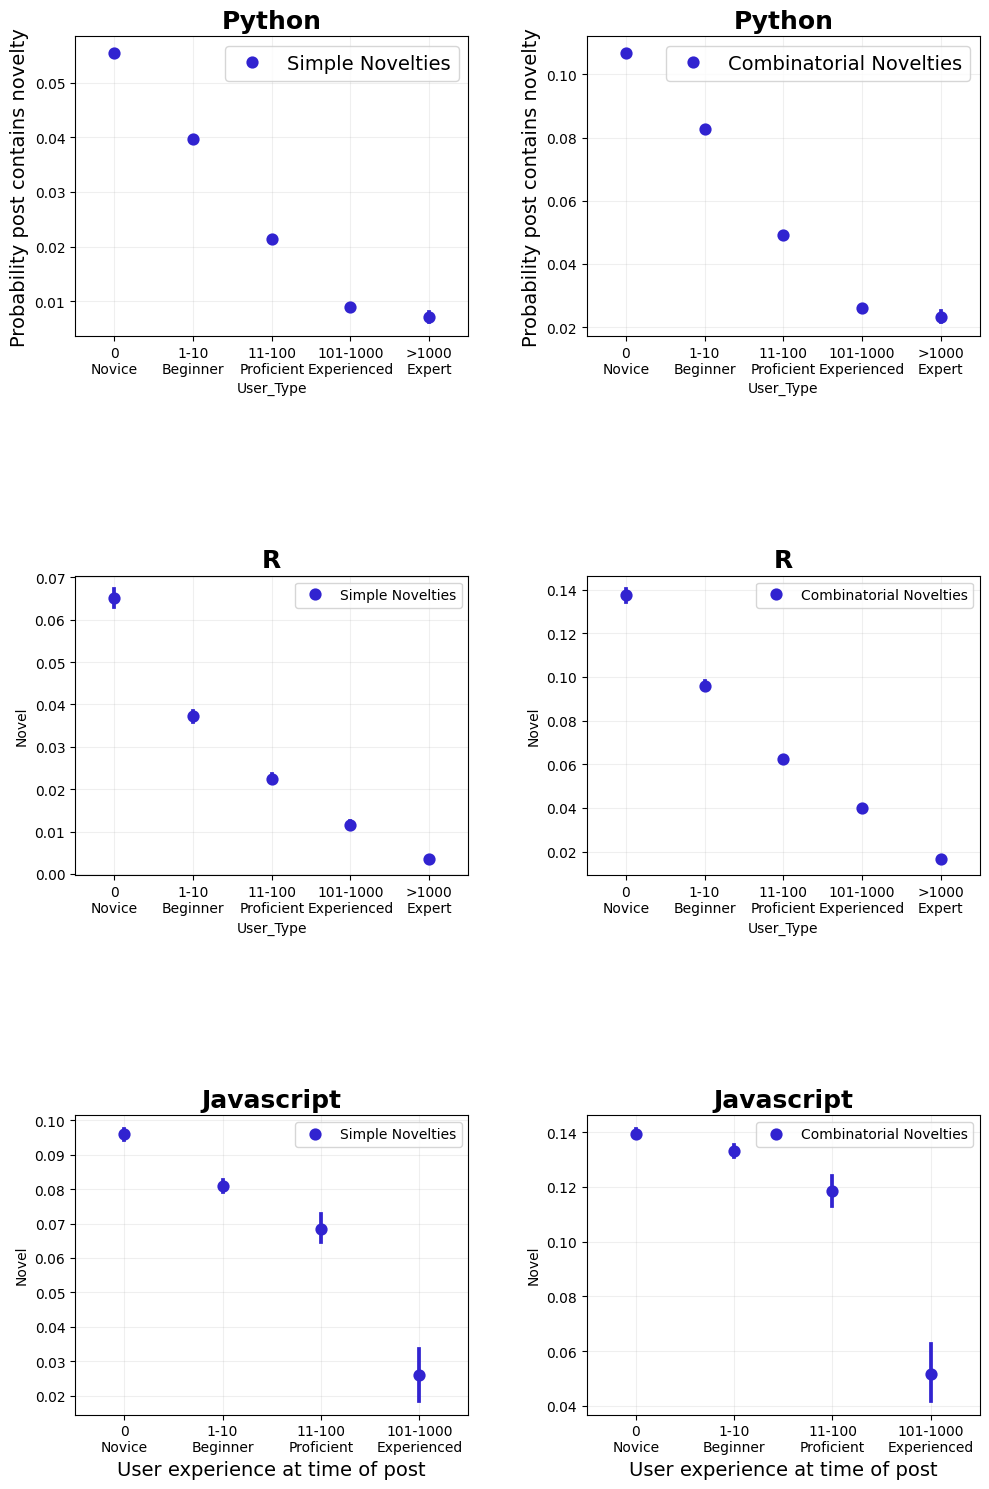

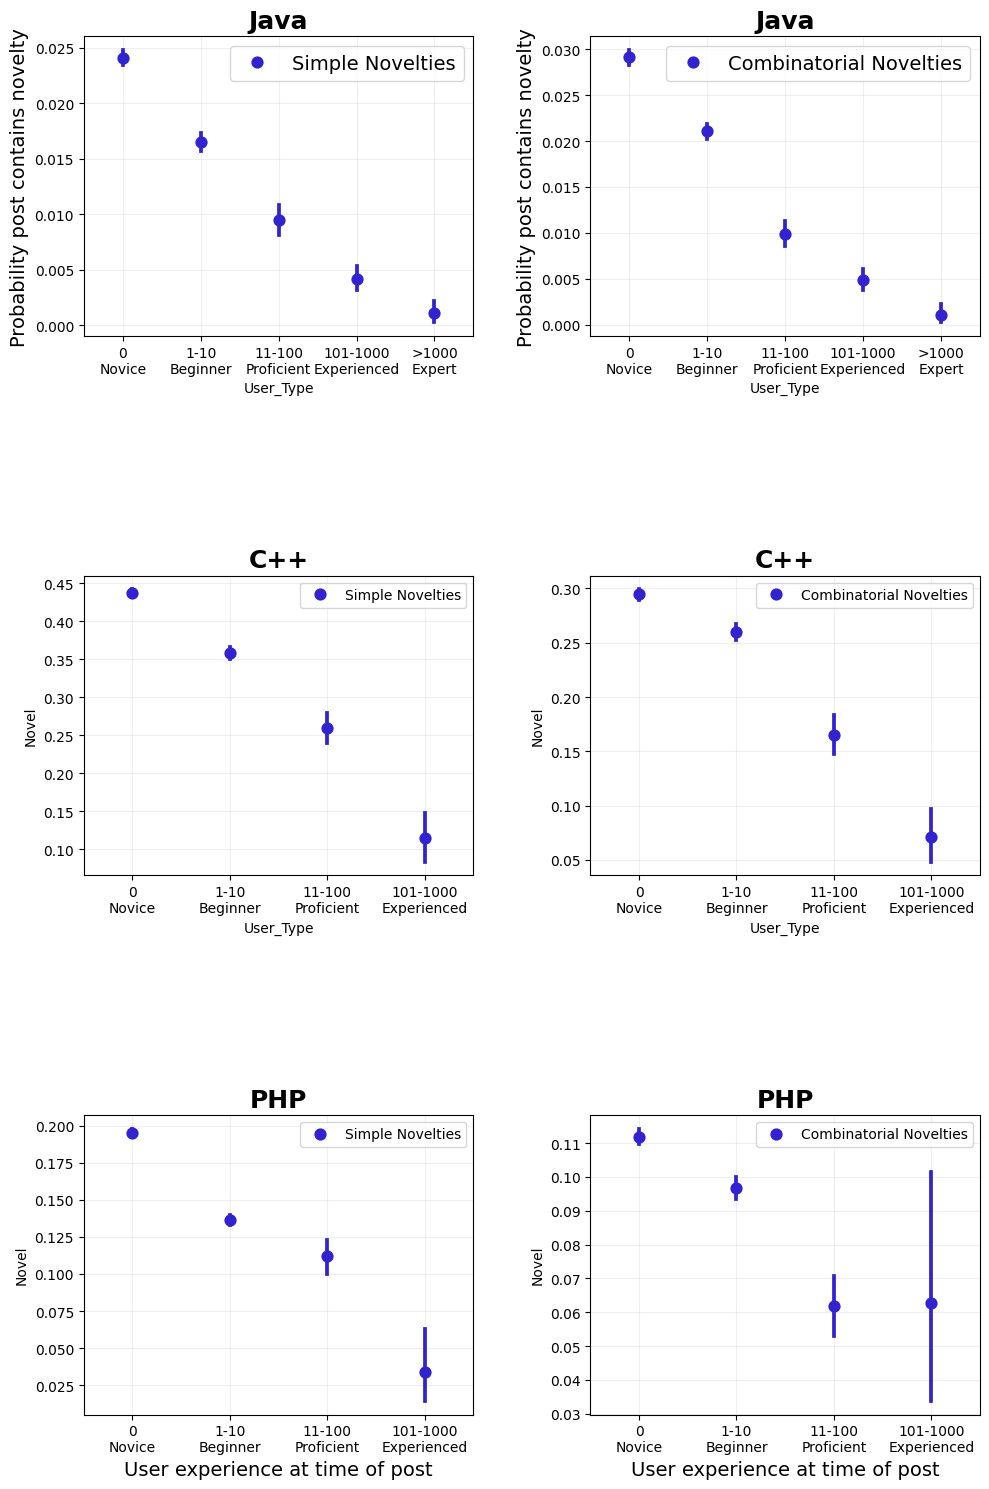

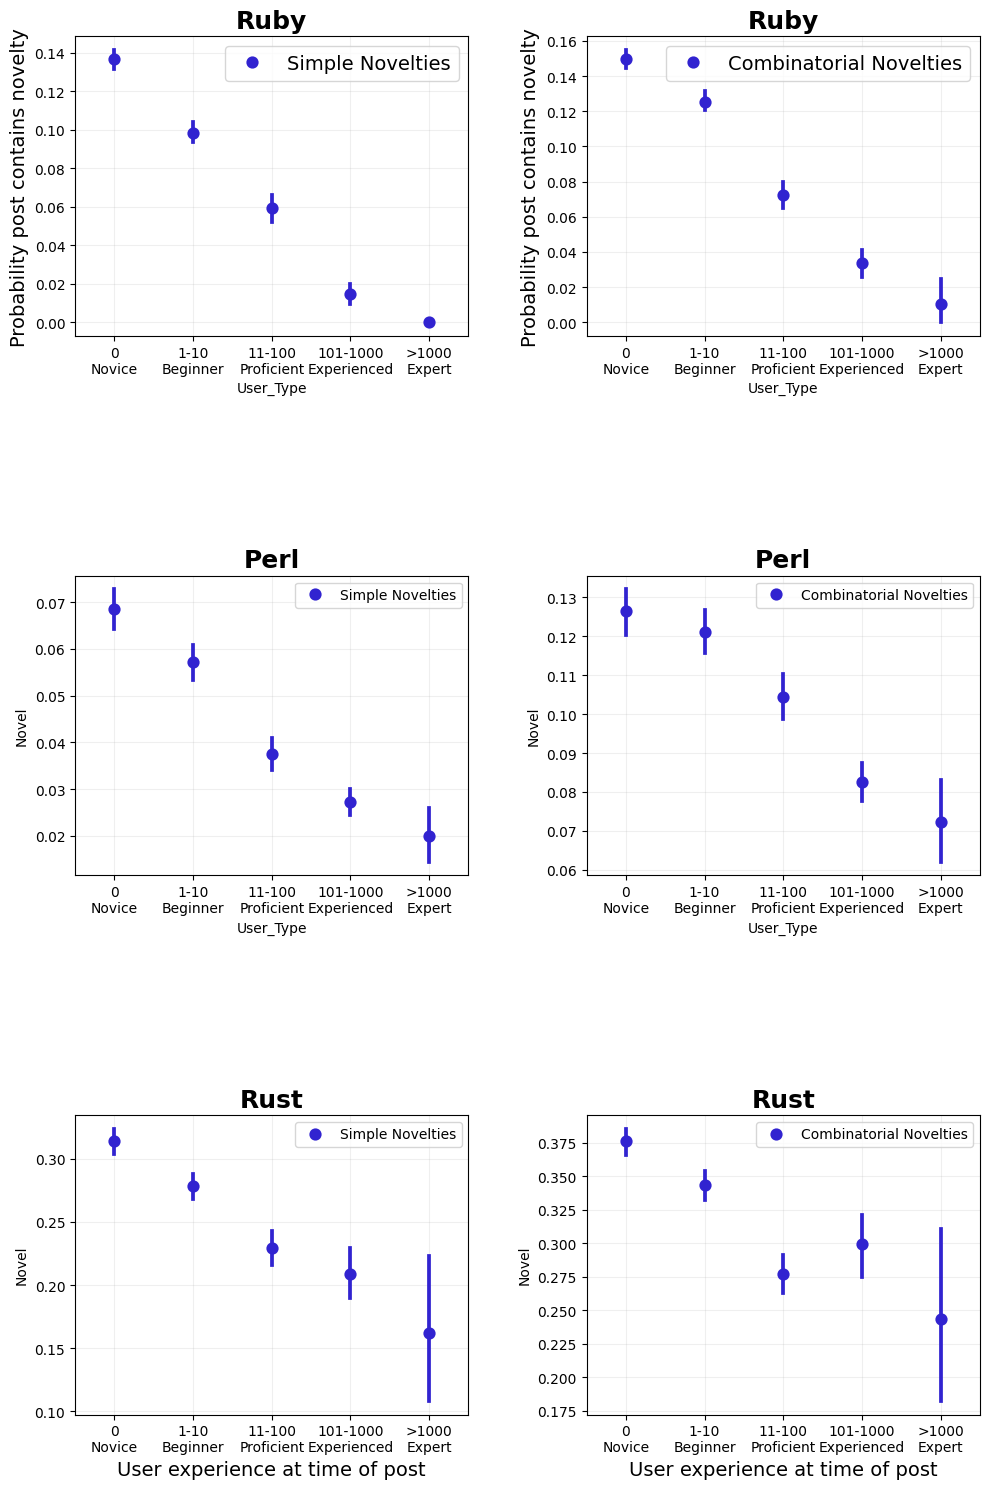

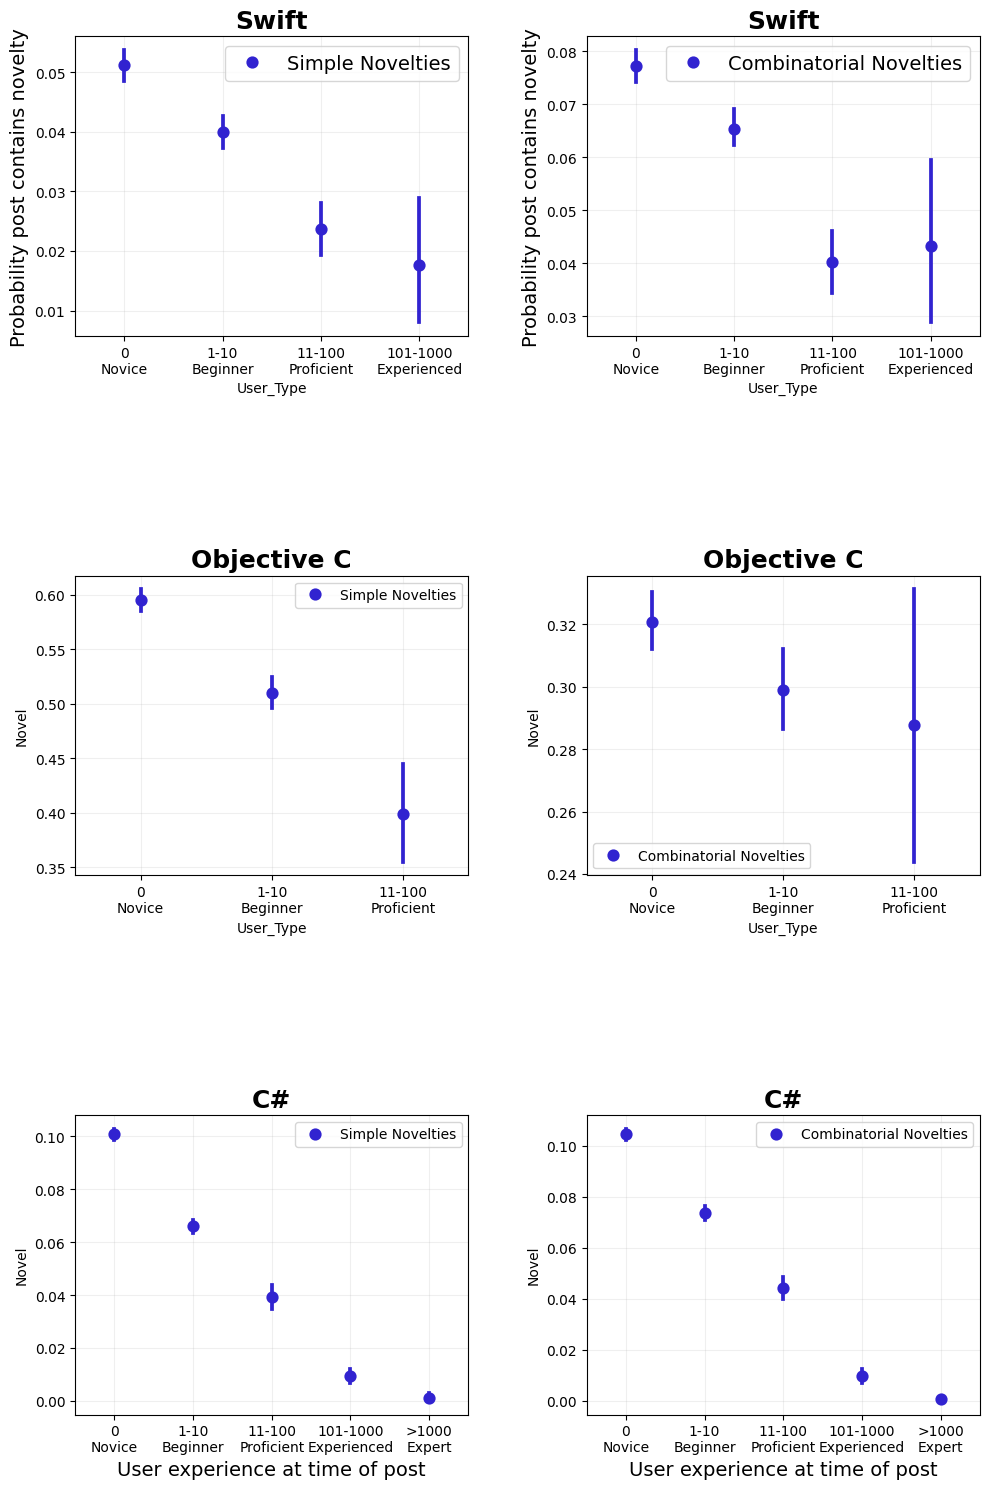

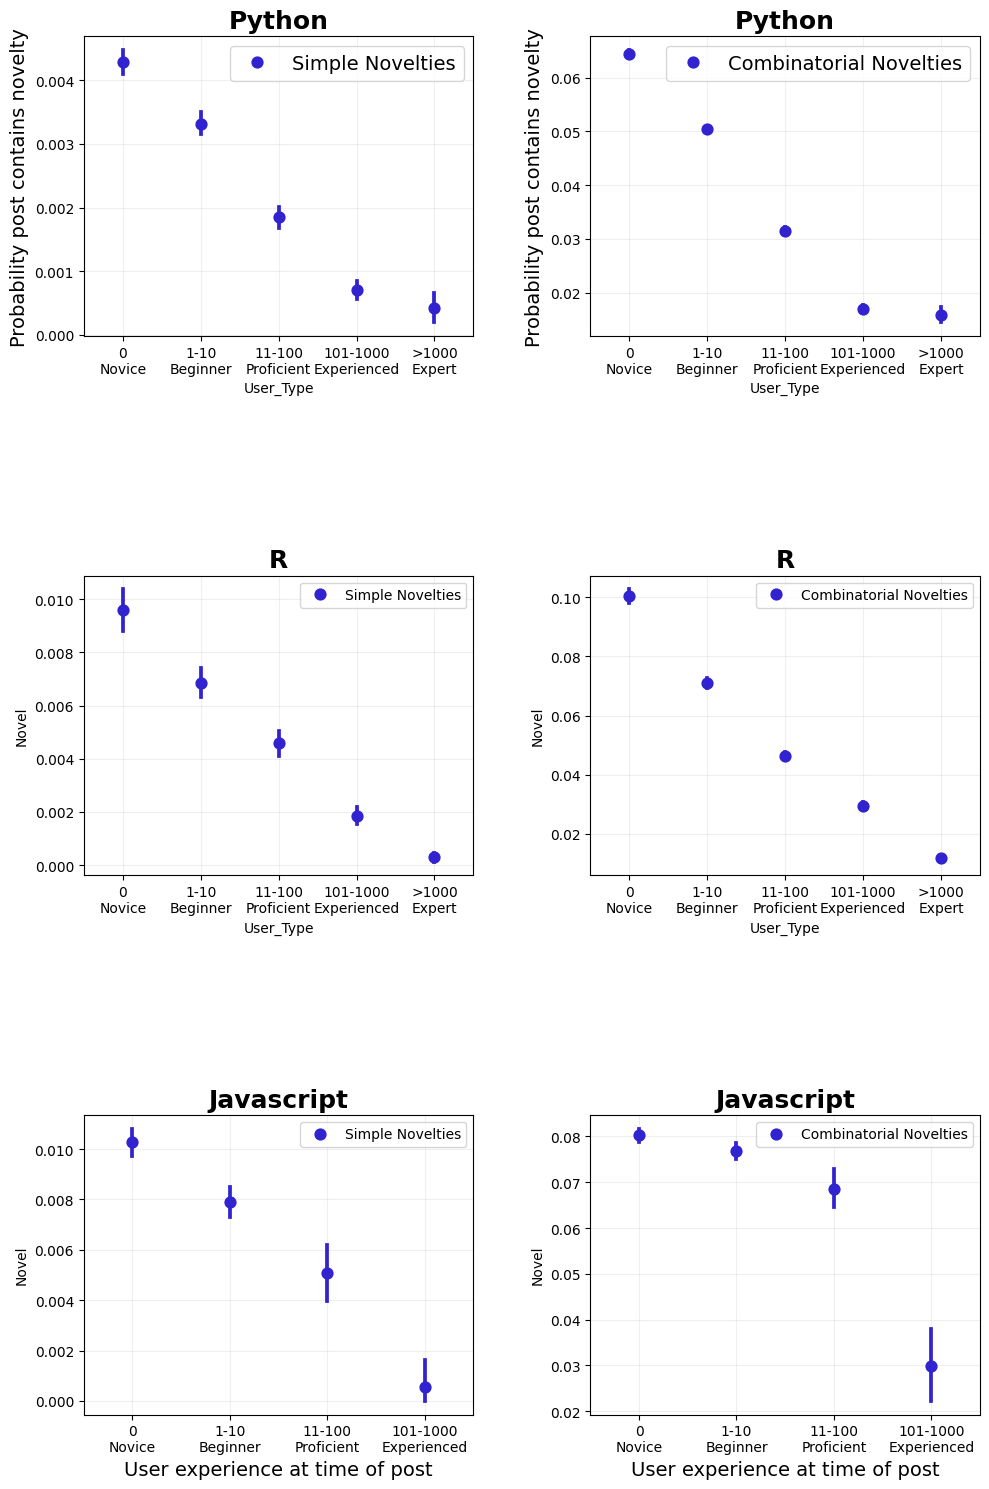

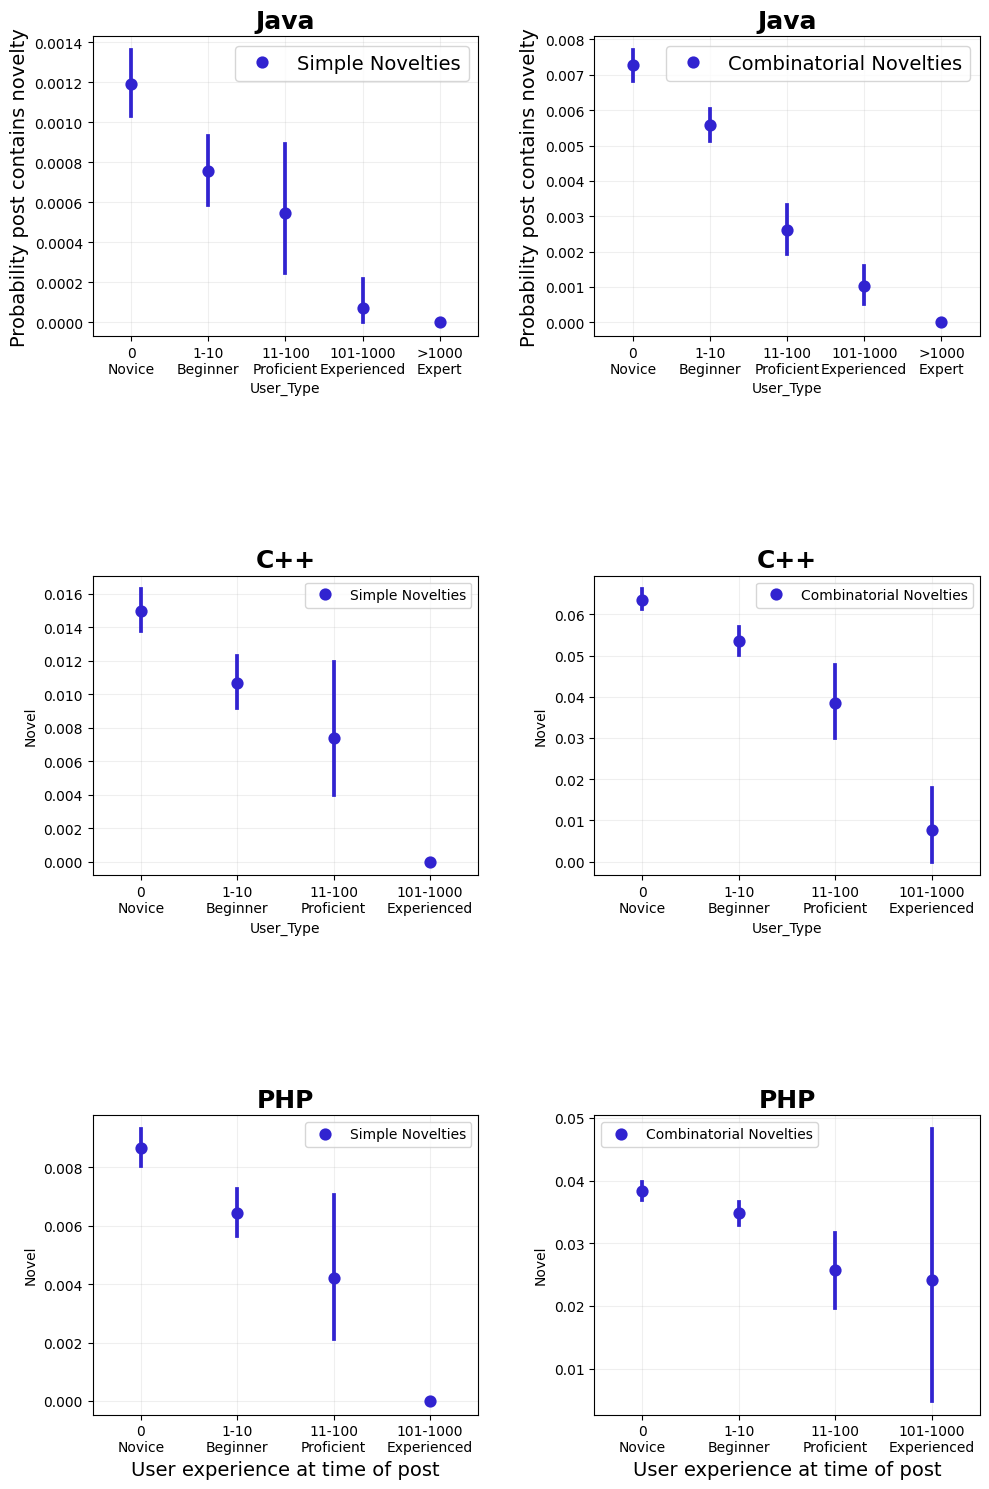

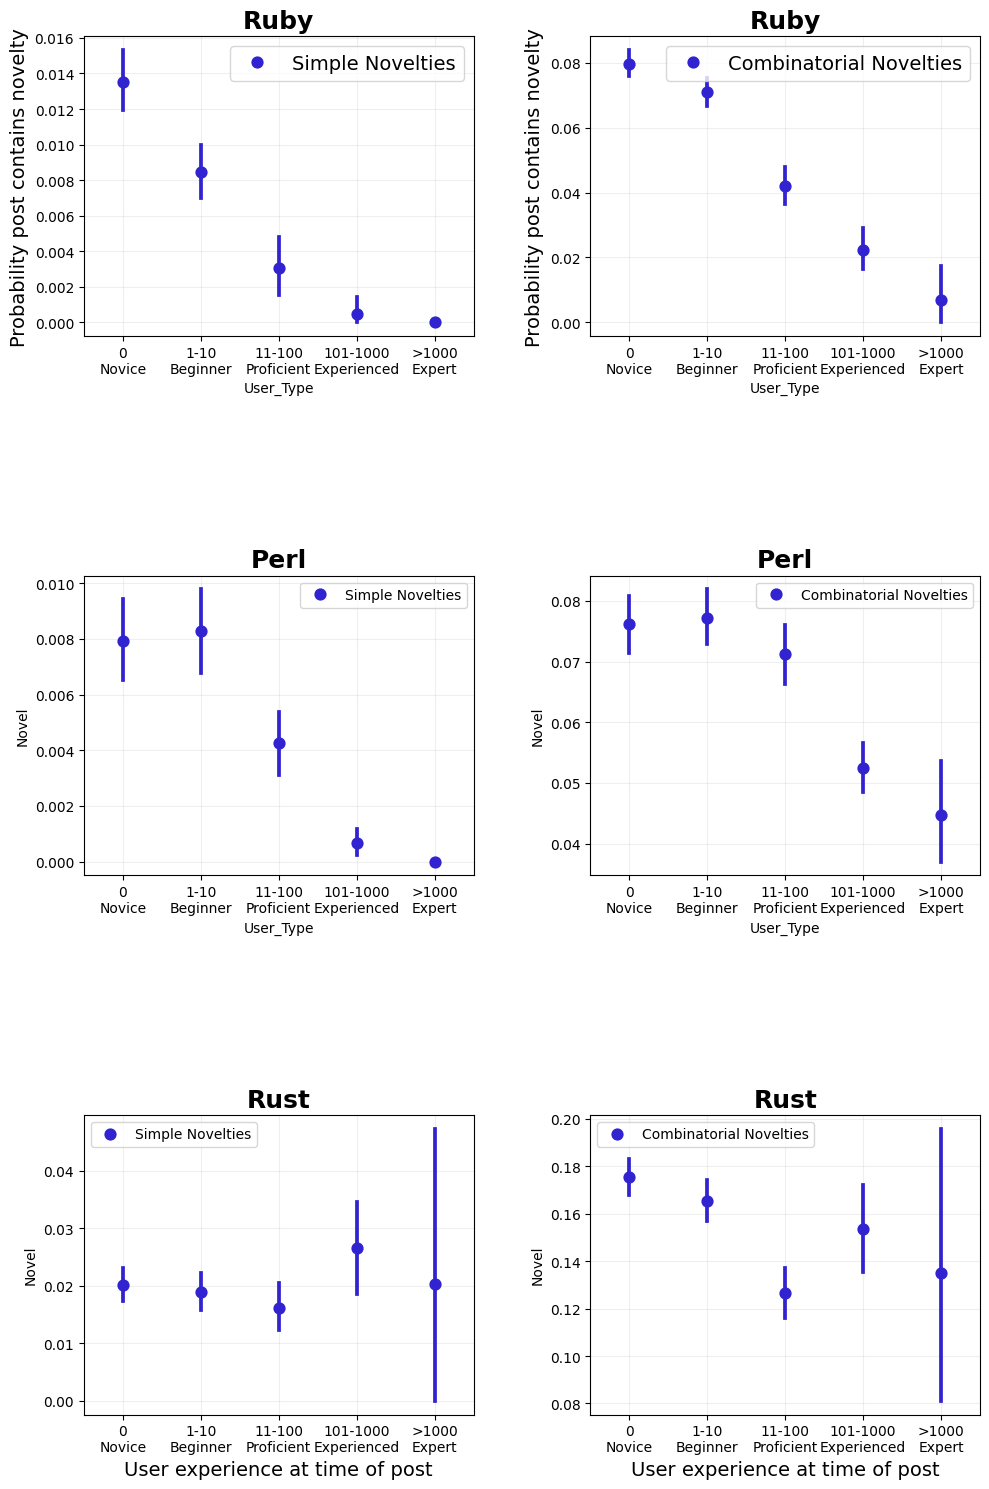

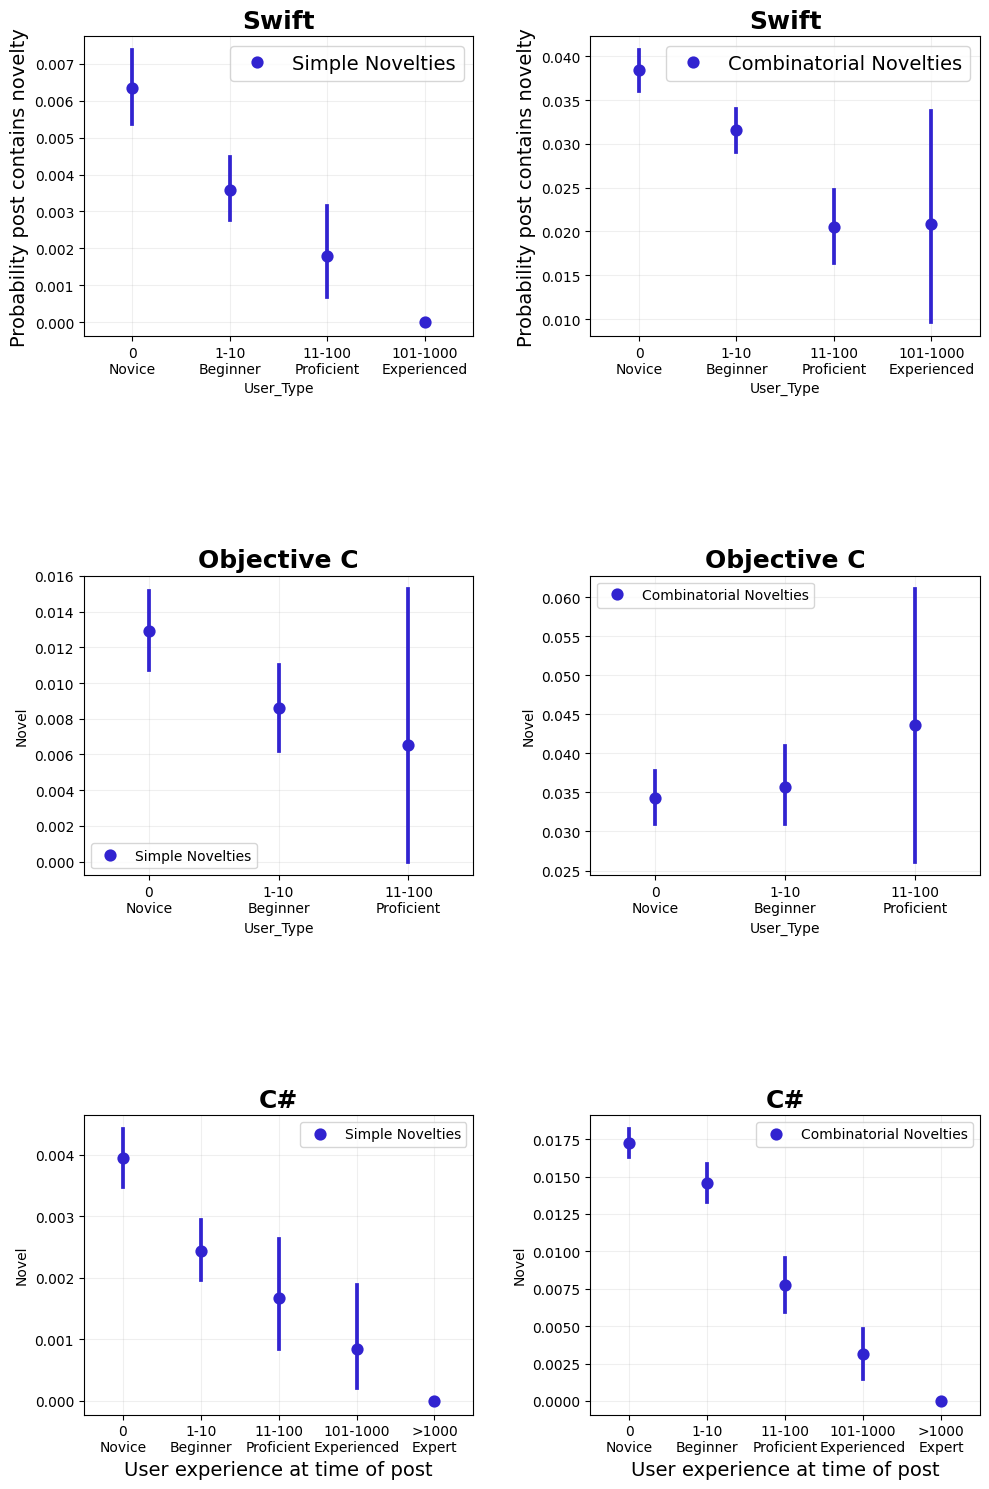

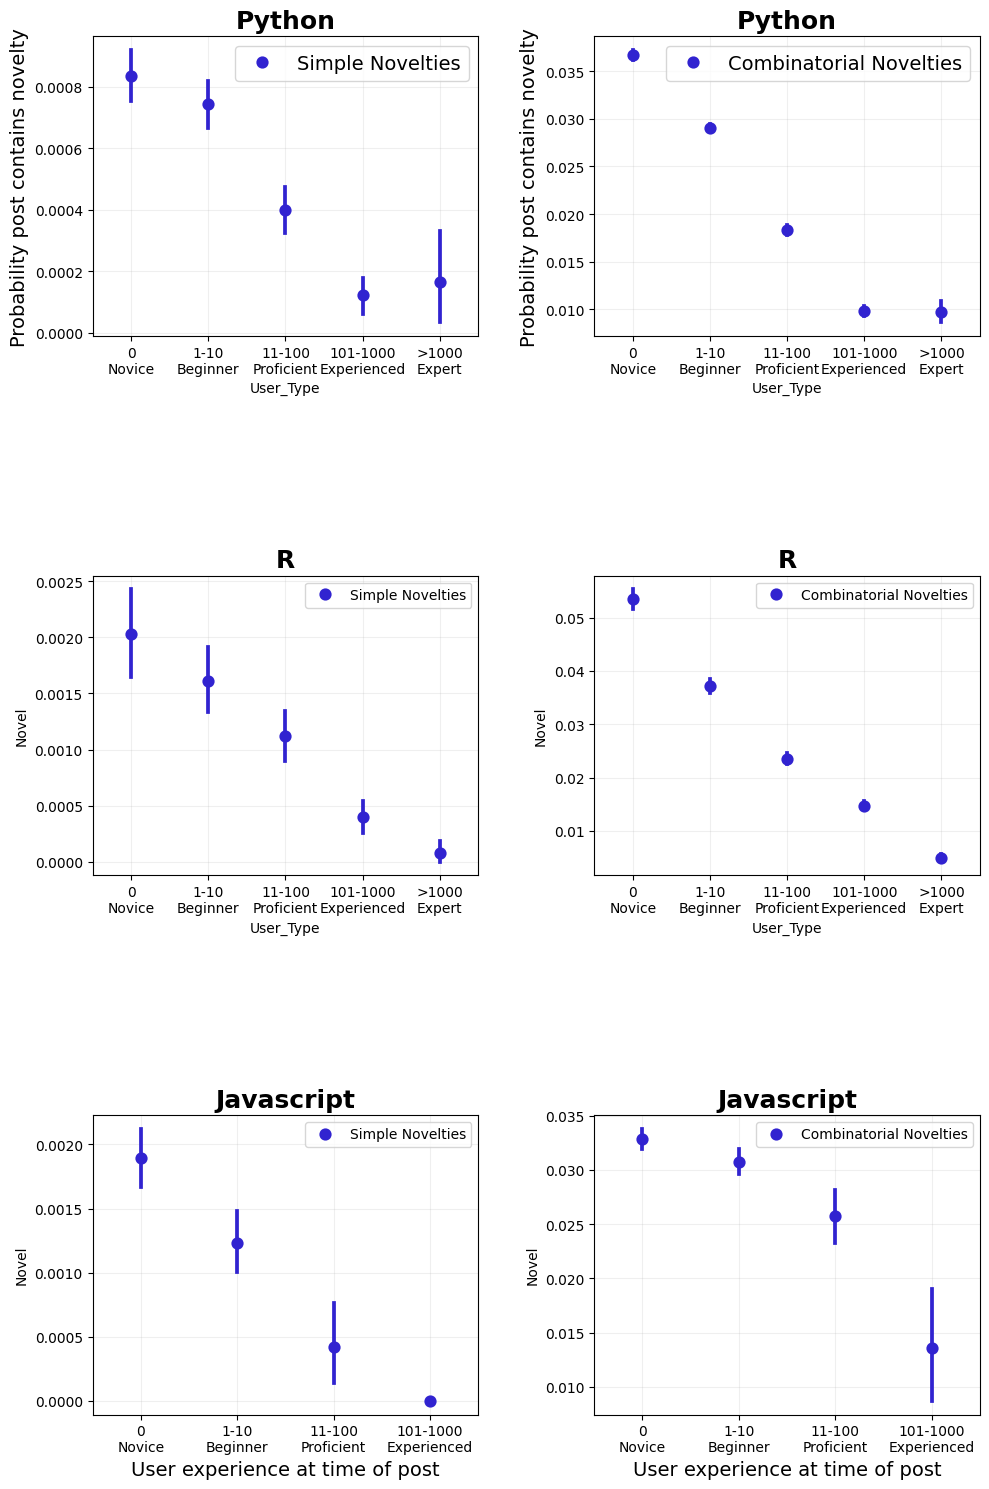

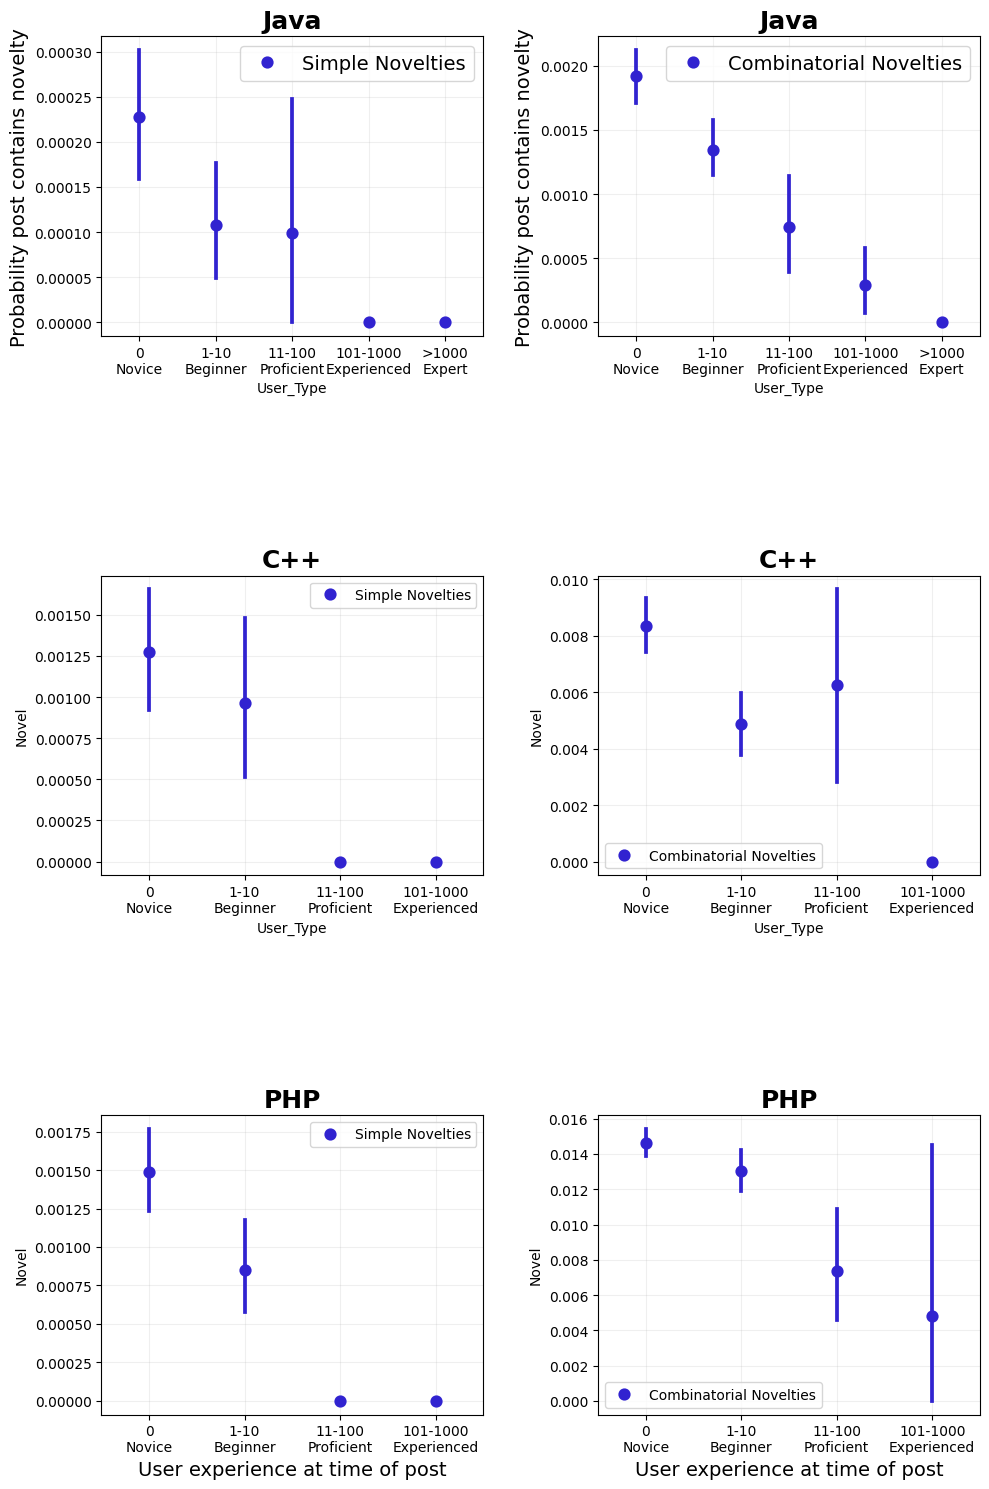

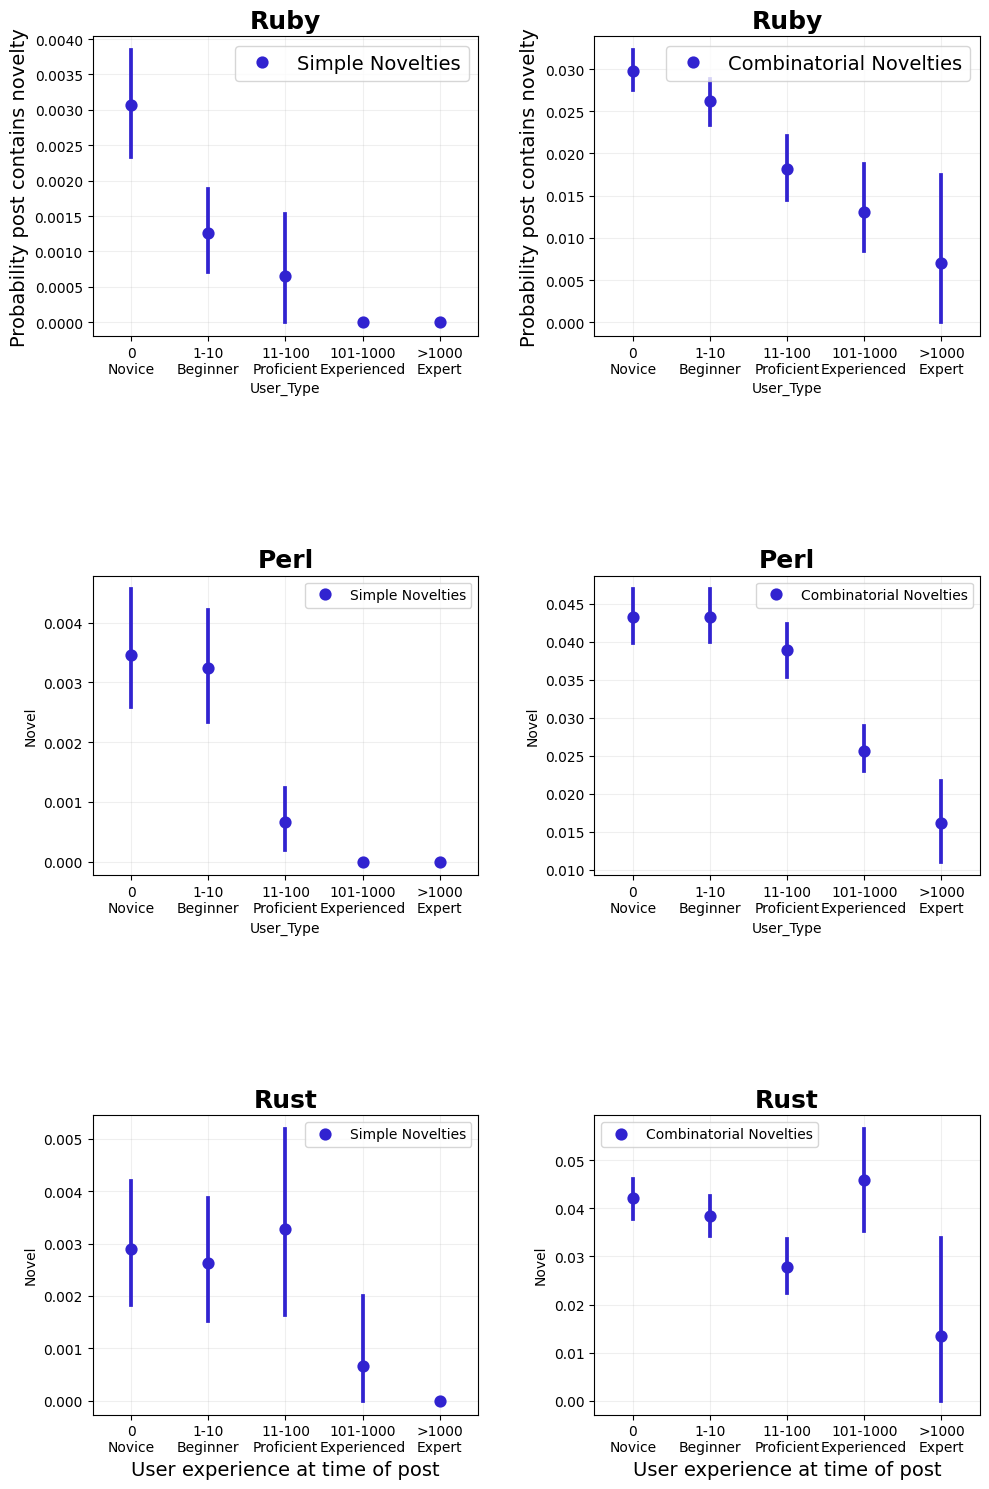

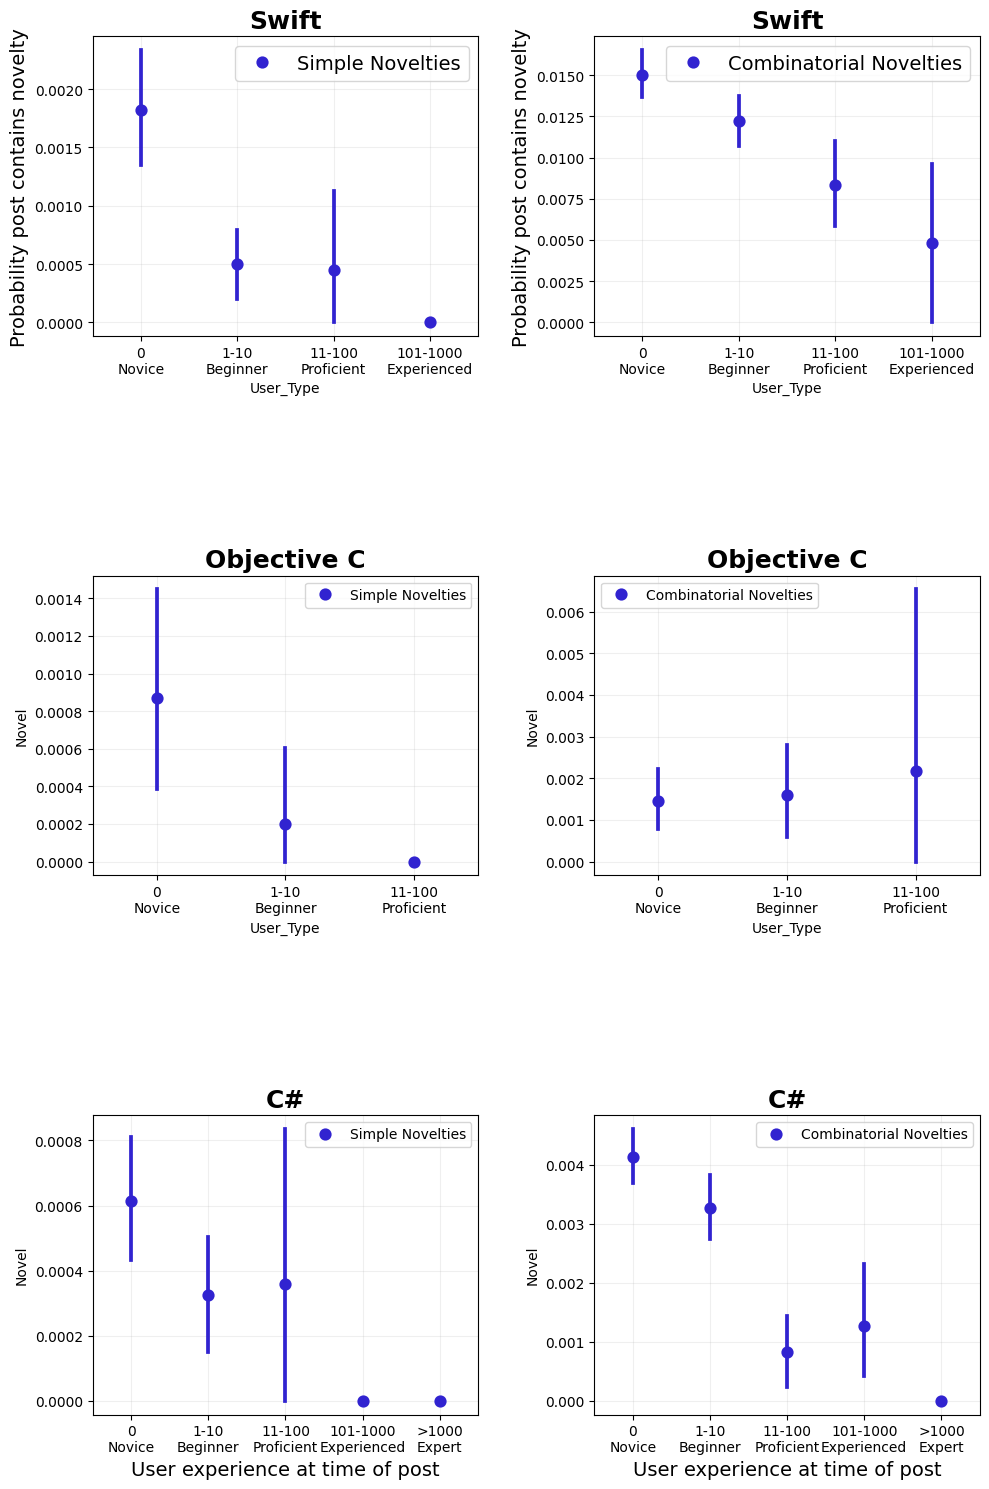

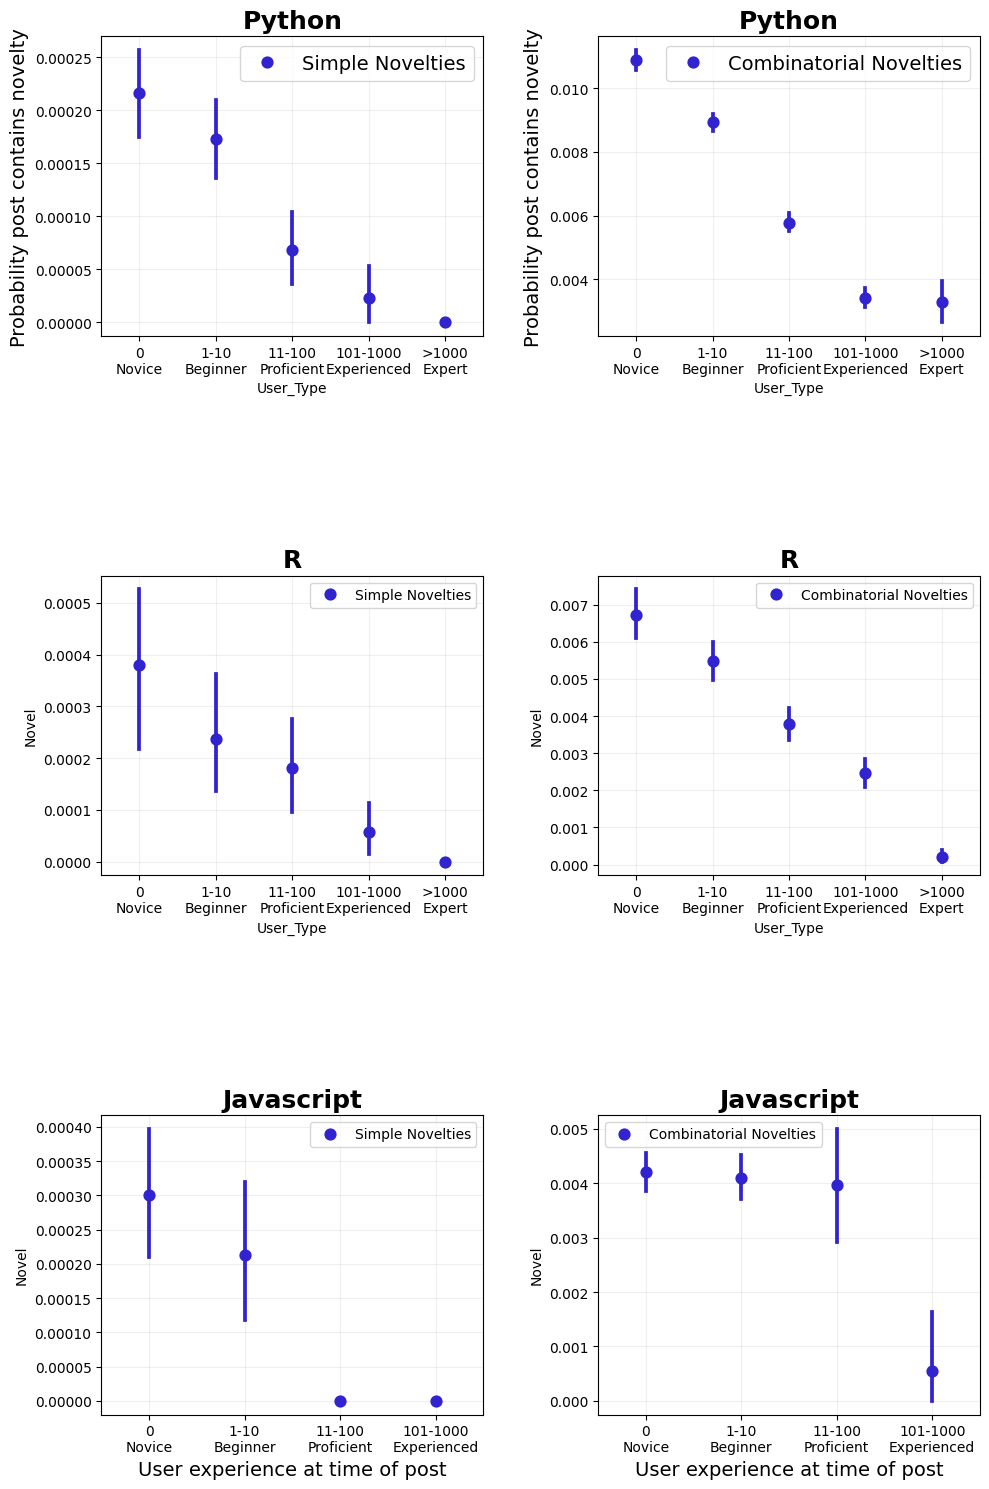

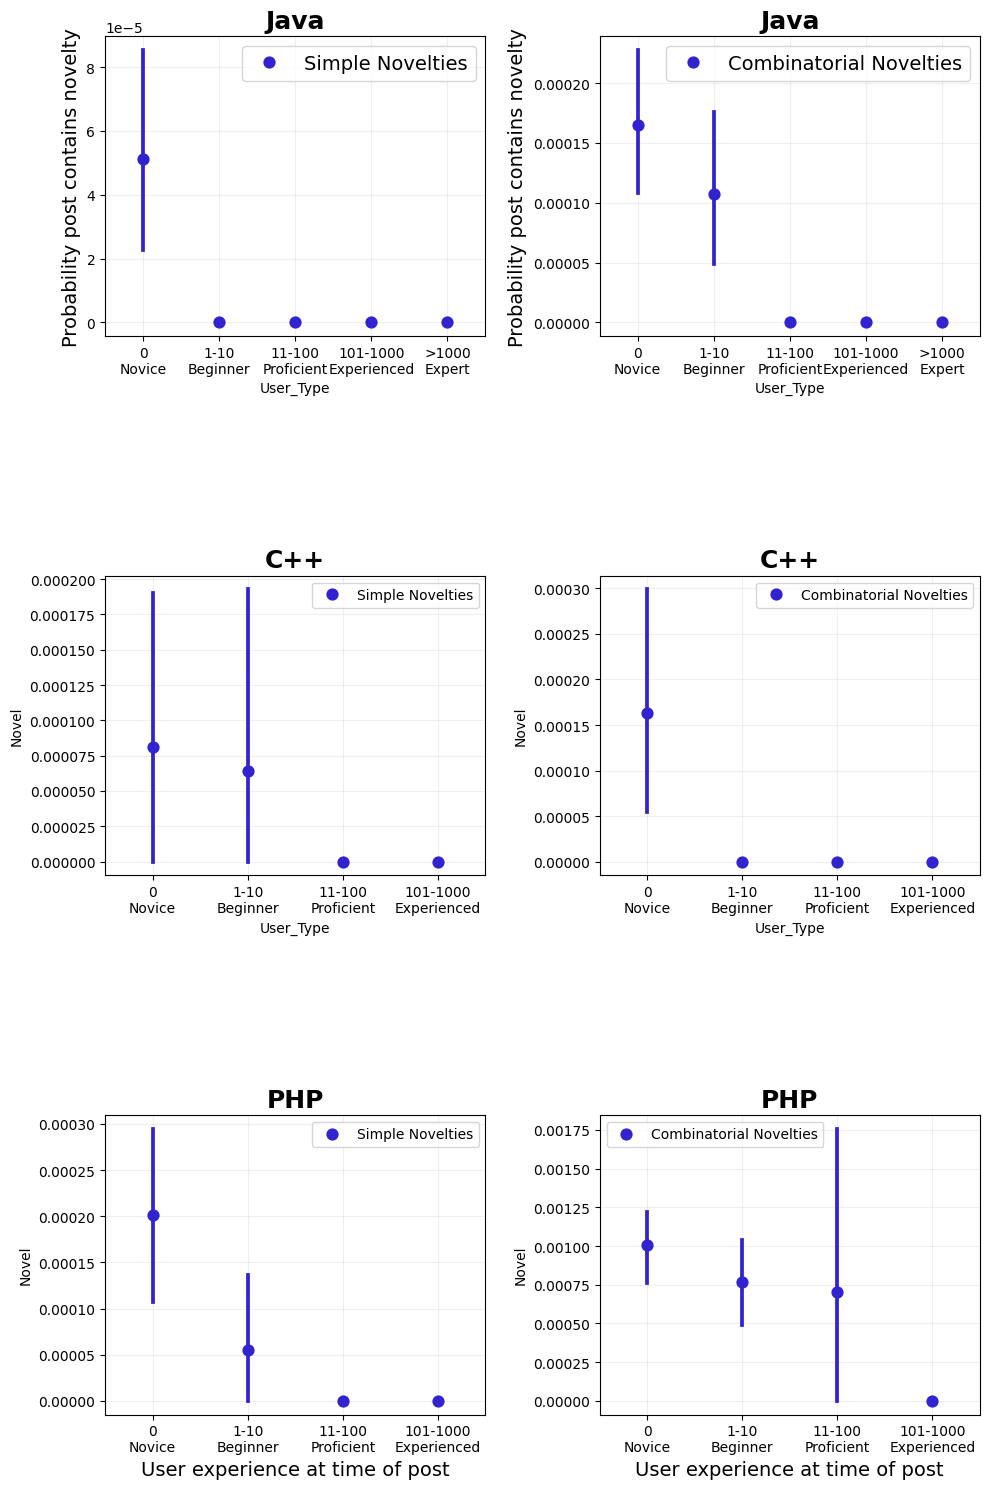

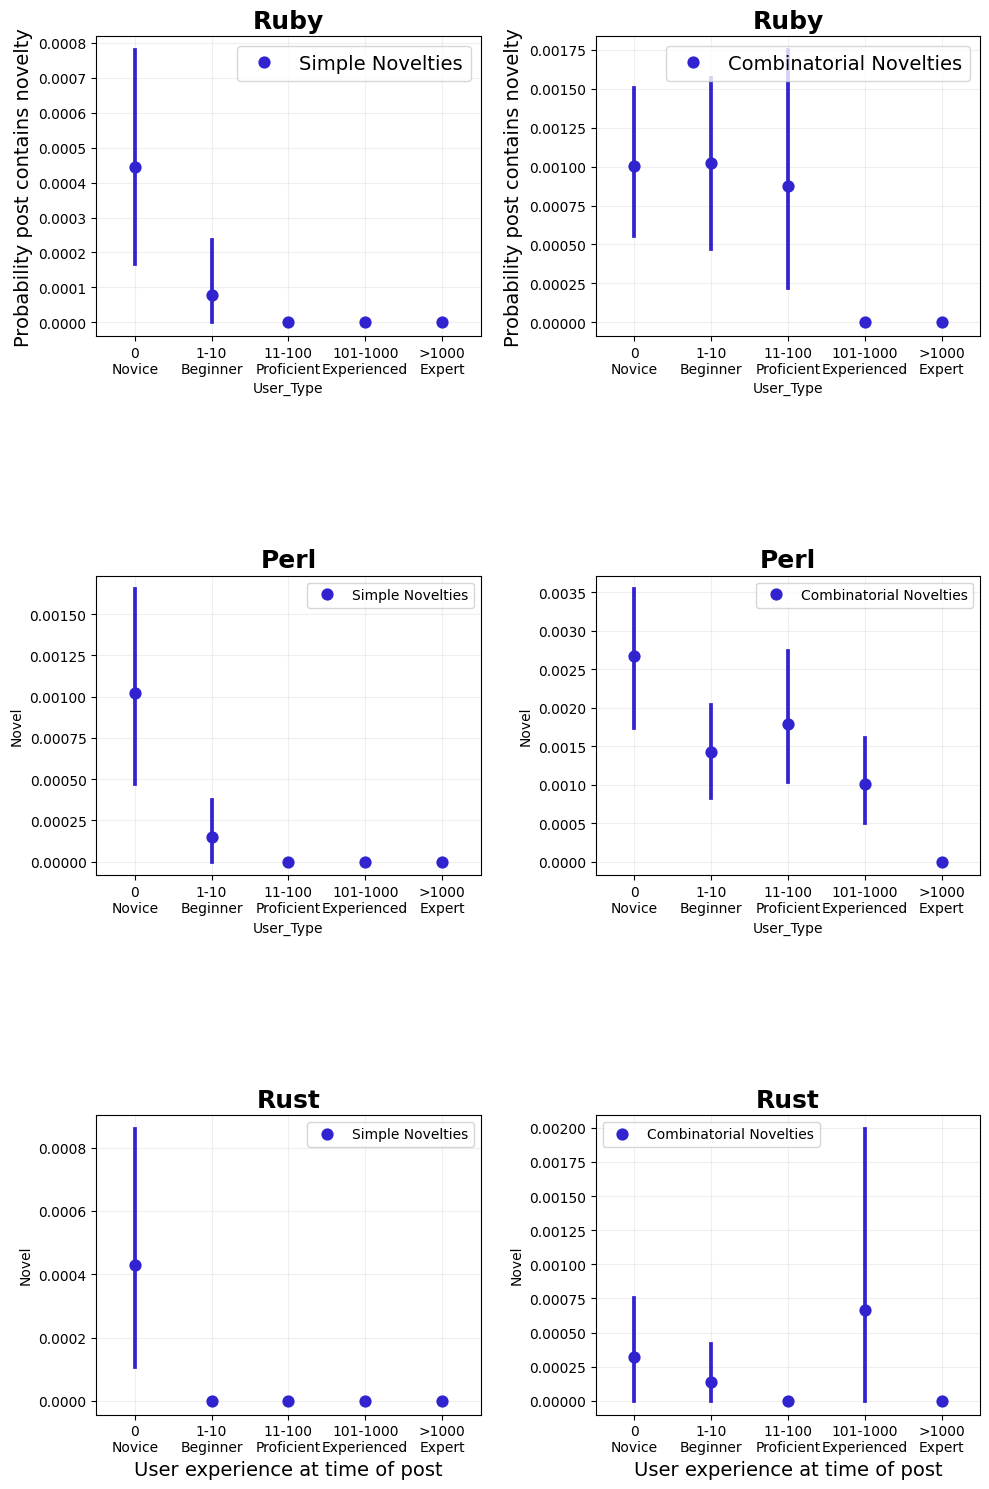

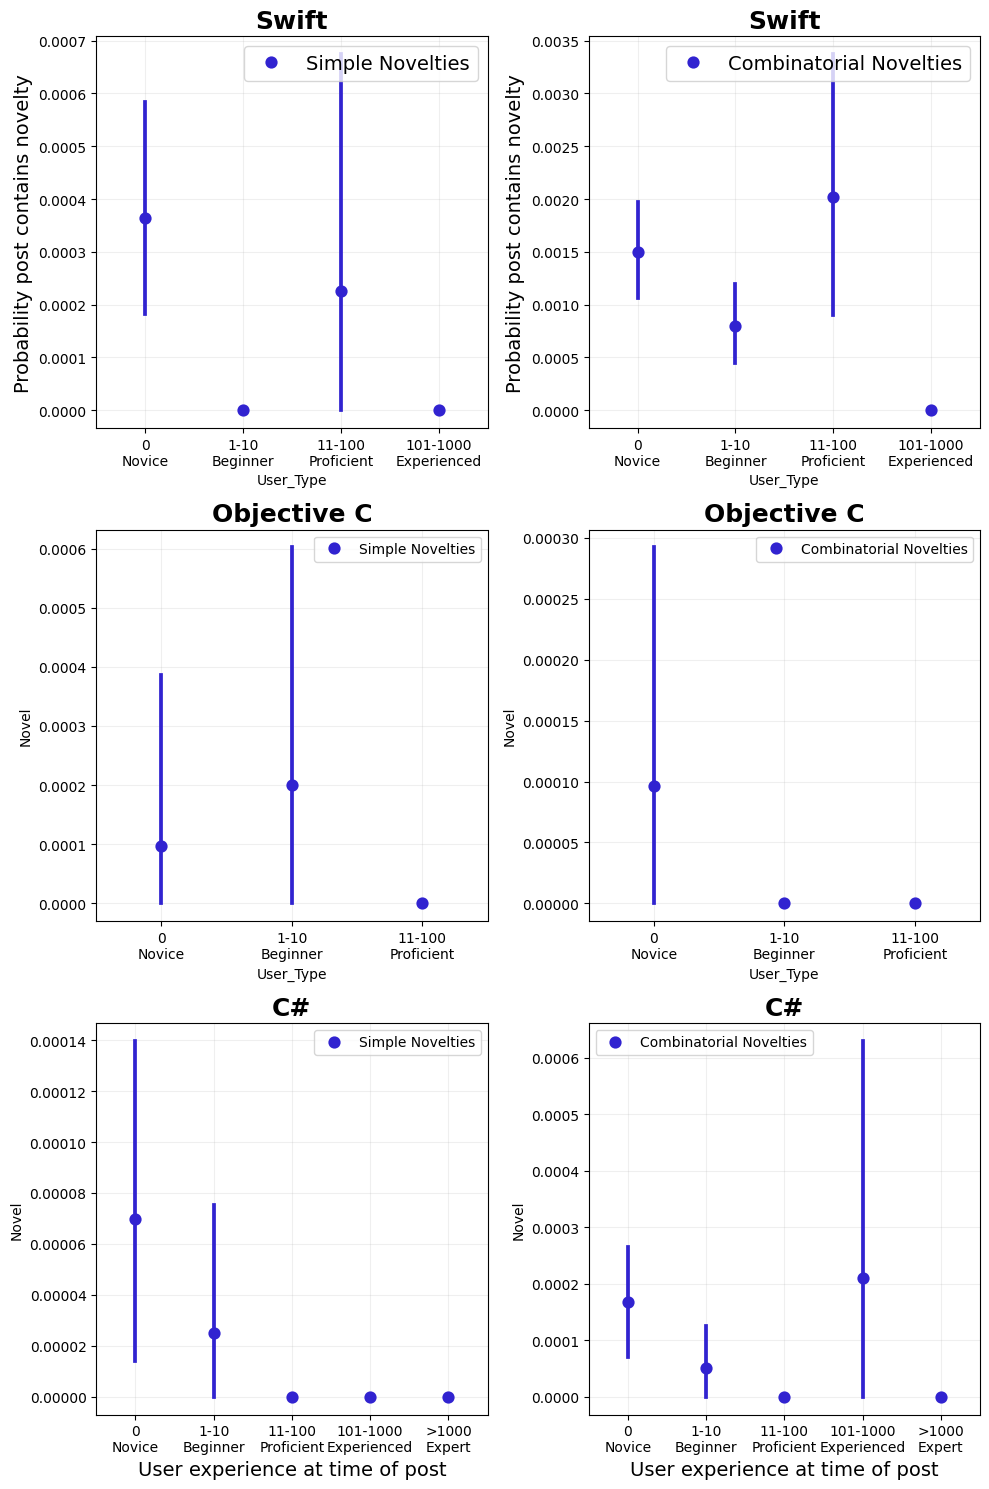

In [5]:
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import ScalarFormatter, LogFormatterExponent,LogFormatterMathtext


import time
from sklearn.linear_model import LinearRegression


%matplotlib inline

for LIMIT in LIMITS:
    def get_user_category(number_of_previous_posts: int) -> str:
        if number_of_previous_posts == 0:
            return "0\nNovice"
        if 0 < number_of_previous_posts <= 10:
            return "1-10\nBeginner"
        if 10 < number_of_previous_posts <= 100:
            return "11-100\nProficient"
        if 100 < number_of_previous_posts <= 1000:
            return "101-1000\nExperienced"
        if 1000 < number_of_previous_posts:
            return ">1000\nExpert"
        raise ValueError(f"post count {number_of_previous_posts} should be a positive integer!")
    
    TOTAL_INPUT = []

    PAGE_SIZE = 3
    page_cnt = 0
    for index, language in enumerate(LANGUAGES):
        if index % PAGE_SIZE == 0:
            page_cnt += 1
            print(f"Opening new page {page_cnt}")
            square_size = 5
            rows, columns = PAGE_SIZE, 2

            plt.subplots_adjust(hspace=0.8, wspace=0.3)
            fig = plt.figure(figsize=(square_size * columns, square_size * rows))
            gs = GridSpec(rows, columns, figure=fig)

        print(f"Processing {language}")
        path_to_lib = f"data/results/{language}"
    
        print("\t Processing resource...")
        user_post_count = collections.defaultdict(int)
        
        libs_df_input = []
        pairs_df_input = []
    
        with open(f"{path_to_lib}/{language}_libs_count.json") as handle:
            libs_count = json.load(handle)
        
        with open(f"{path_to_lib}/{language}_time_based_new.jsonl") as handle:
            for line in handle:
                json_data = json.loads(line)
                TOTAL_INPUT.append(json_data)
    
                new_libs = [item for item in json_data.get("new_libs") if libs_count.get(item, 0) > LIMIT]
                new_pairs = [item for item in json_data.get("new_pairs") if all(libs_count.get(lib_, 0) > LIMIT for lib_ in item.split("|"))]
    
                category = get_user_category(user_post_count[json_data["user_id"]])
                new_libs_row = [
                    json_data["post_id"],
                    bool(len(new_libs)),
                    category,
                ]
                new_pairs_row = [
                    json_data["post_id"],
                    bool(len(new_pairs)),
                    category,
                ]
               
                user_post_count[json_data["user_id"]] += 1
                libs_df_input.append(new_libs_row)
                pairs_df_input.append(new_pairs_row)

            libs_df = pd.DataFrame(libs_df_input, columns=["Id", "Novel", "User_Type"])
            pairs_df = pd.DataFrame(pairs_df_input, columns=["Id", "Novel", "User_Type"])
            
            ax1= fig.add_subplot(gs[index % PAGE_SIZE, 0])
            sns.pointplot(data=libs_df, x="User_Type", y="Novel", linestyles="", ax=ax1, label="Simple Novelties", color=chrysler_blue)
            ax1.set_title(f'{LANGUAGES[language]}', fontsize=18, fontweight='bold')
            if index % PAGE_SIZE == 2:
                ax1.set_xlabel("User experience at time of post", fontsize=14)
            if index % PAGE_SIZE == 0:
                ax1.set_ylabel("Probability post contains novelty", fontsize=14)
                ax1.legend(fontsize=14, loc="upper right")
            
            ax2= fig.add_subplot(gs[index % PAGE_SIZE, 1])
            sns.pointplot(data=pairs_df, x="User_Type", y="Novel", linestyles="", ax=ax2, label="Combinatorial Novelties", color=chrysler_blue)
            ax2.set_title(f'{LANGUAGES[language]}', fontsize=18, fontweight='bold')
            if index % PAGE_SIZE == 2:
                ax2.set_xlabel("User experience at time of post", fontsize=14)
            if index % PAGE_SIZE == 0:
                ax2.set_ylabel("Probability post contains novelty", fontsize=14)
                ax2.legend(fontsize=14, loc="upper right")

            ax1.grid(alpha=0.2)
            ax2.grid(alpha=0.2)

        if index % PAGE_SIZE == PAGE_SIZE - 1:
            print(f"saving page {page_cnt}")
            plt.tight_layout()
            fig.savefig(f"experiences_12_with_limit_{LIMIT}_{page_cnt}.png")

In [6]:
SORTED_TOTAL_INPUT = sorted(TOTAL_INPUT, key=lambda x: x.get("post_date"))

user_post_count = collections.defaultdict(int)
libs_rows = []
pairs_rows = []
for item in tqdm.tqdm(SORTED_TOTAL_INPUT):
    new_libs_row = [
        json_data["post_id"],
        bool(len(item.get("new_libs", []))),
        get_user_category(user_post_count[item["user_id"]]),
        item["post_date"],
    ] 
    new_pairs_row = [
        json_data["post_id"],
        bool(len(item.get("new_pairs", []))),
        get_user_category(user_post_count[item["user_id"]]),
        item["post_date"],
    ] 
    user_post_count[item["user_id"]] += 1
    libs_rows.append(new_libs_row)
    pairs_rows.append(new_pairs_row)

libs_df = pd.DataFrame(libs_rows, columns=["Id", "Novel", "User_Type", "Date_Posted"])
pairs_df = pd.DataFrame(pairs_rows, columns=["Id", "Novel", "User_Type", "Date_Posted"])

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2708608/2708608 [00:16<00:00, 159632.72it/s]


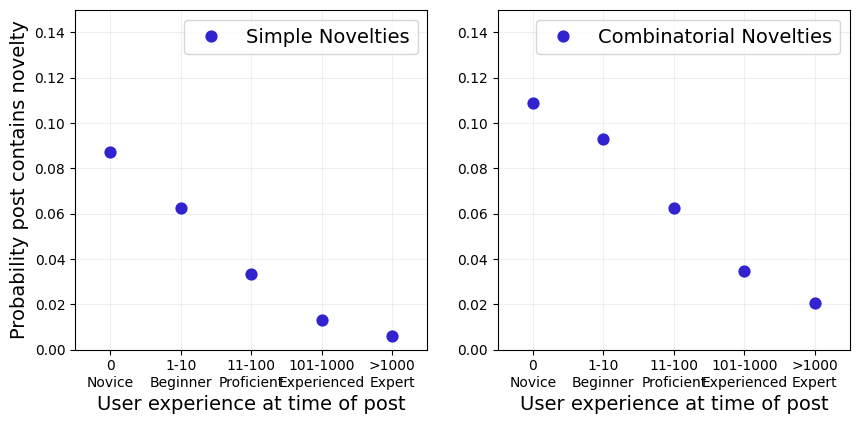

In [7]:
total_fig = plt.figure(figsize=(10, 15))

ax1 = total_fig.add_subplot(gs[0, 0])
sns.pointplot(data=libs_df, x="User_Type", y="Novel", ax=ax1, linestyles="", label="Simple Novelties", color=chrysler_blue)
ax1.set_xlabel("User experience at time of post", fontsize=14)
ax1.set_ylabel("Probability post contains novelty", fontsize=14)
ax1.legend(fontsize=14, loc="upper right")
ax1.set_ylim(0, 0.15)
#ax1.set_title("All Studied Programming Languages", fontsize=18)
ax1.margins(y=0)
plt.grid(alpha=0.2)

ax2 = total_fig.add_subplot(gs[0, 1])
sns.pointplot(data=pairs_df, x="User_Type", y="Novel", ax=ax2, linestyles="", label="Combinatorial Novelties", color=chrysler_blue)
ax2.set_xlabel("User experience at time of post", fontsize=14)
#ax2.set_ylabel("Probability post contains novelty", fontsize=14)
ax2.set_ylabel("")
ax2.legend(fontsize=14, loc="upper right")
#ax2.set_title("All Studied Programming Languages", fontsize=18)
ax2.margins(y=0)
plt.grid(alpha=0.2)
ax2.set_ylim(0, 0.15)
#total_fig.suptitle("All Studied Programming Languages", fontsize=18)
total_fig.savefig(f"experiences_total_with_limit_{LIMIT}.png")


# Only for specific years

In [8]:
YEAR = 2016

Opening new page 1
Processing python
	 Processing resource...
Processing r
	 Processing resource...
Processing javascript
	 Processing resource...
saving page 1
Opening new page 2
Processing java
	 Processing resource...
Processing cpp
	 Processing resource...
Processing php
	 Processing resource...
saving page 2
Opening new page 3
Processing ruby
	 Processing resource...
Processing perl
	 Processing resource...
Processing rust
	 Processing resource...
saving page 3
Opening new page 4
Processing swift
	 Processing resource...
Processing objectivec
	 Processing resource...
Processing c#
	 Processing resource...
saving page 4
Opening new page 1
Processing python
	 Processing resource...
Processing r
	 Processing resource...
Processing javascript
	 Processing resource...
saving page 1
Opening new page 2
Processing java
	 Processing resource...
Processing cpp
	 Processing resource...
Processing php
	 Processing resource...
saving page 2
Opening new page 3
Processing ruby
	 Processing resou

<Figure size 640x480 with 0 Axes>

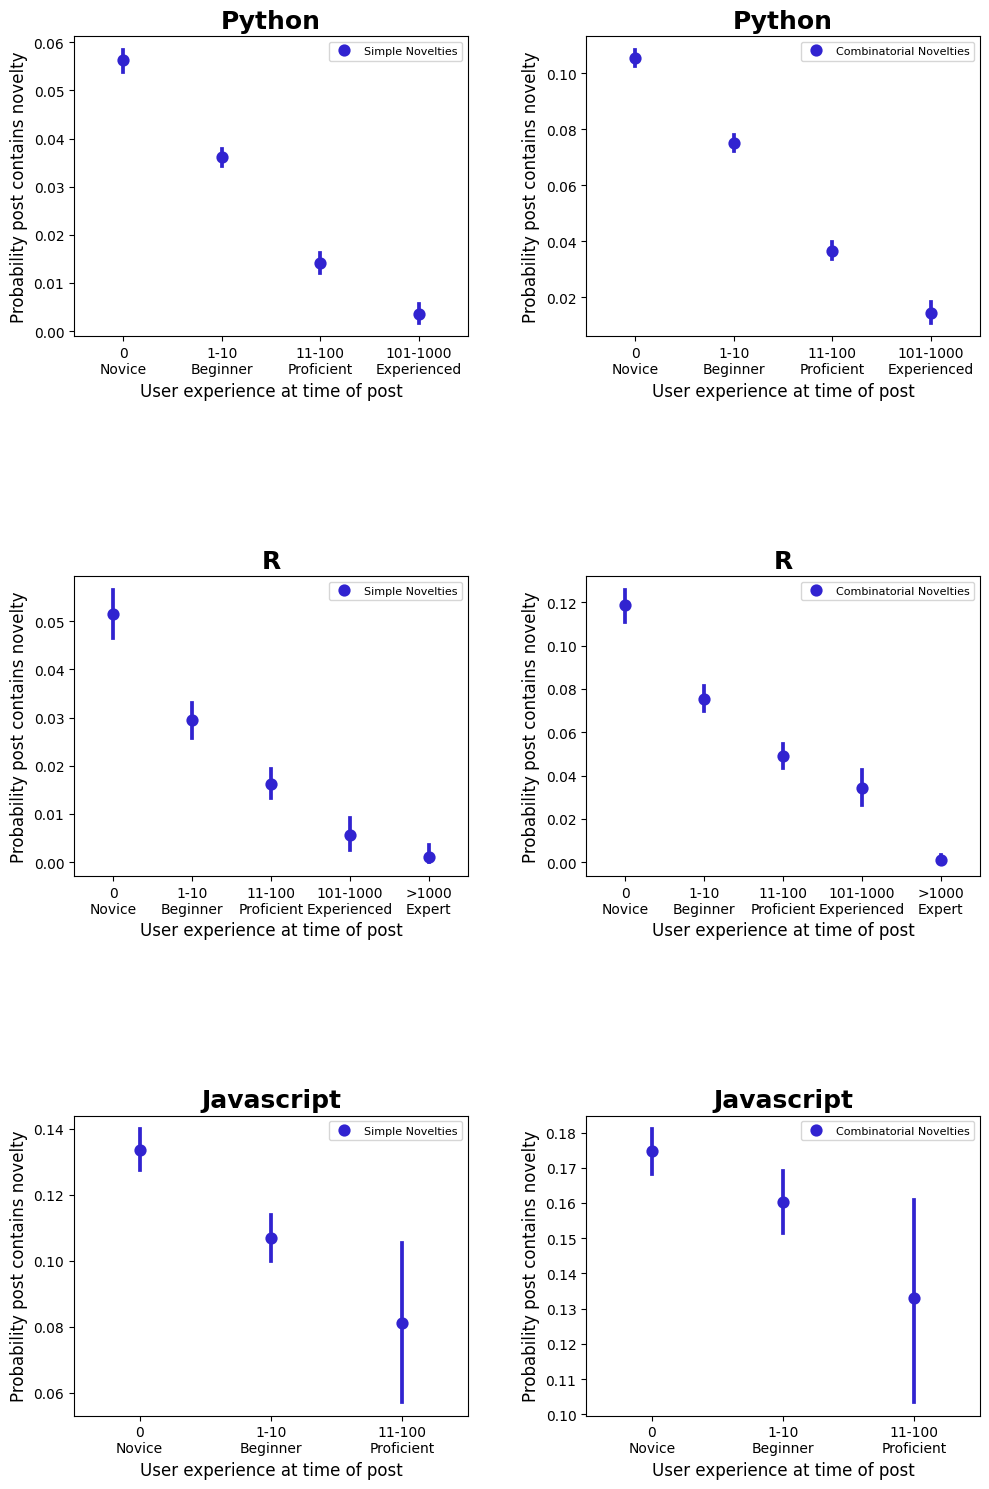

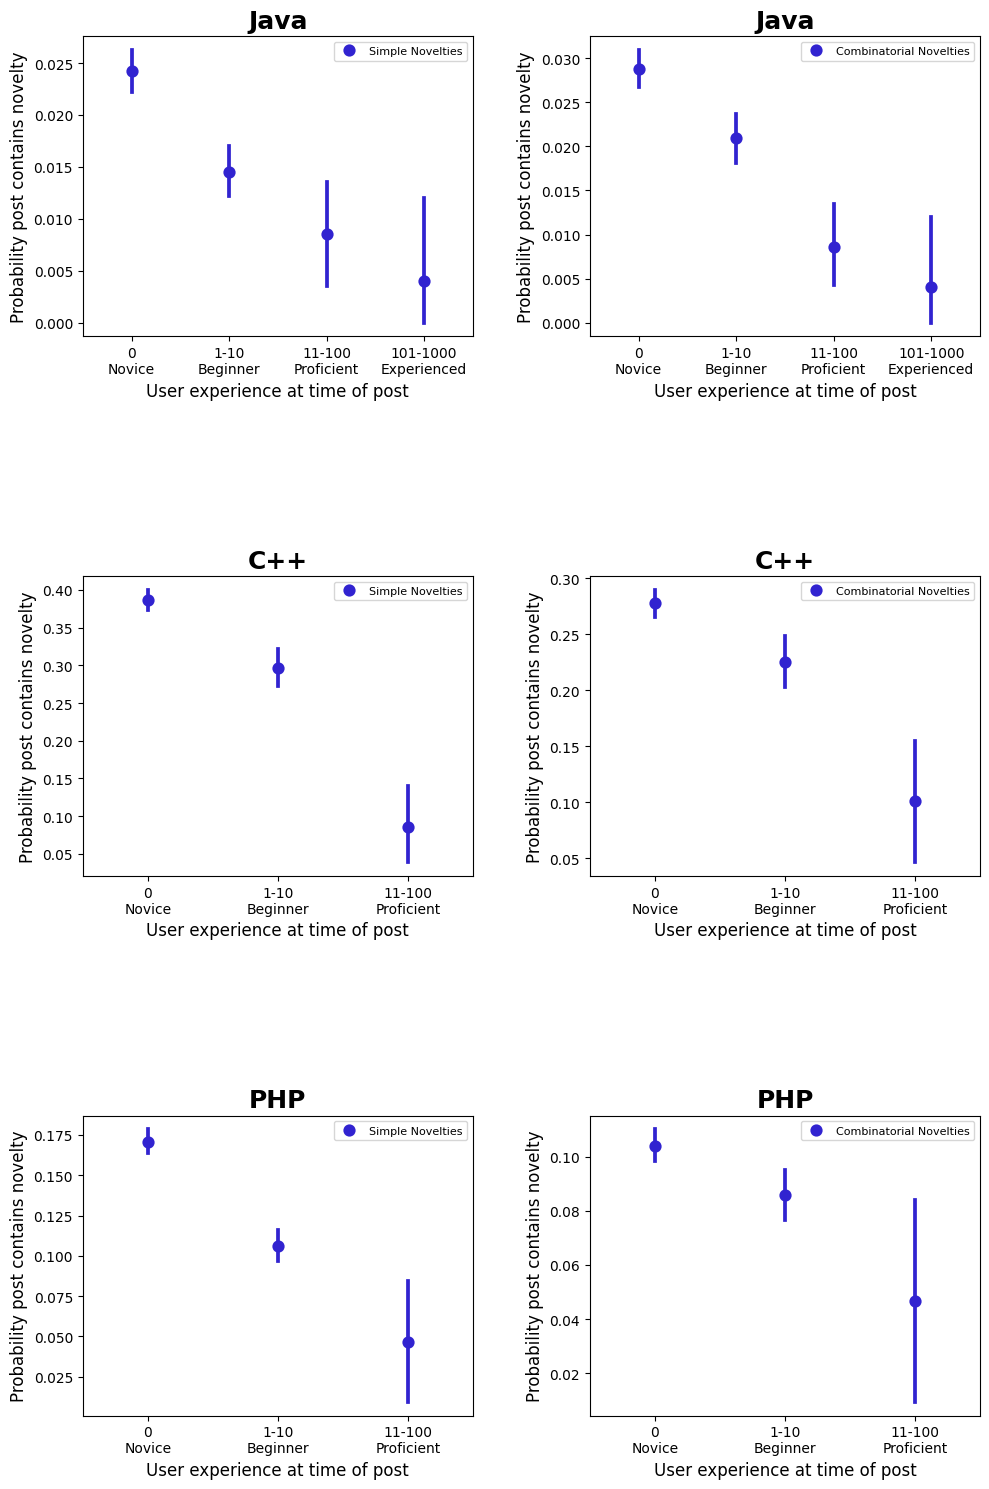

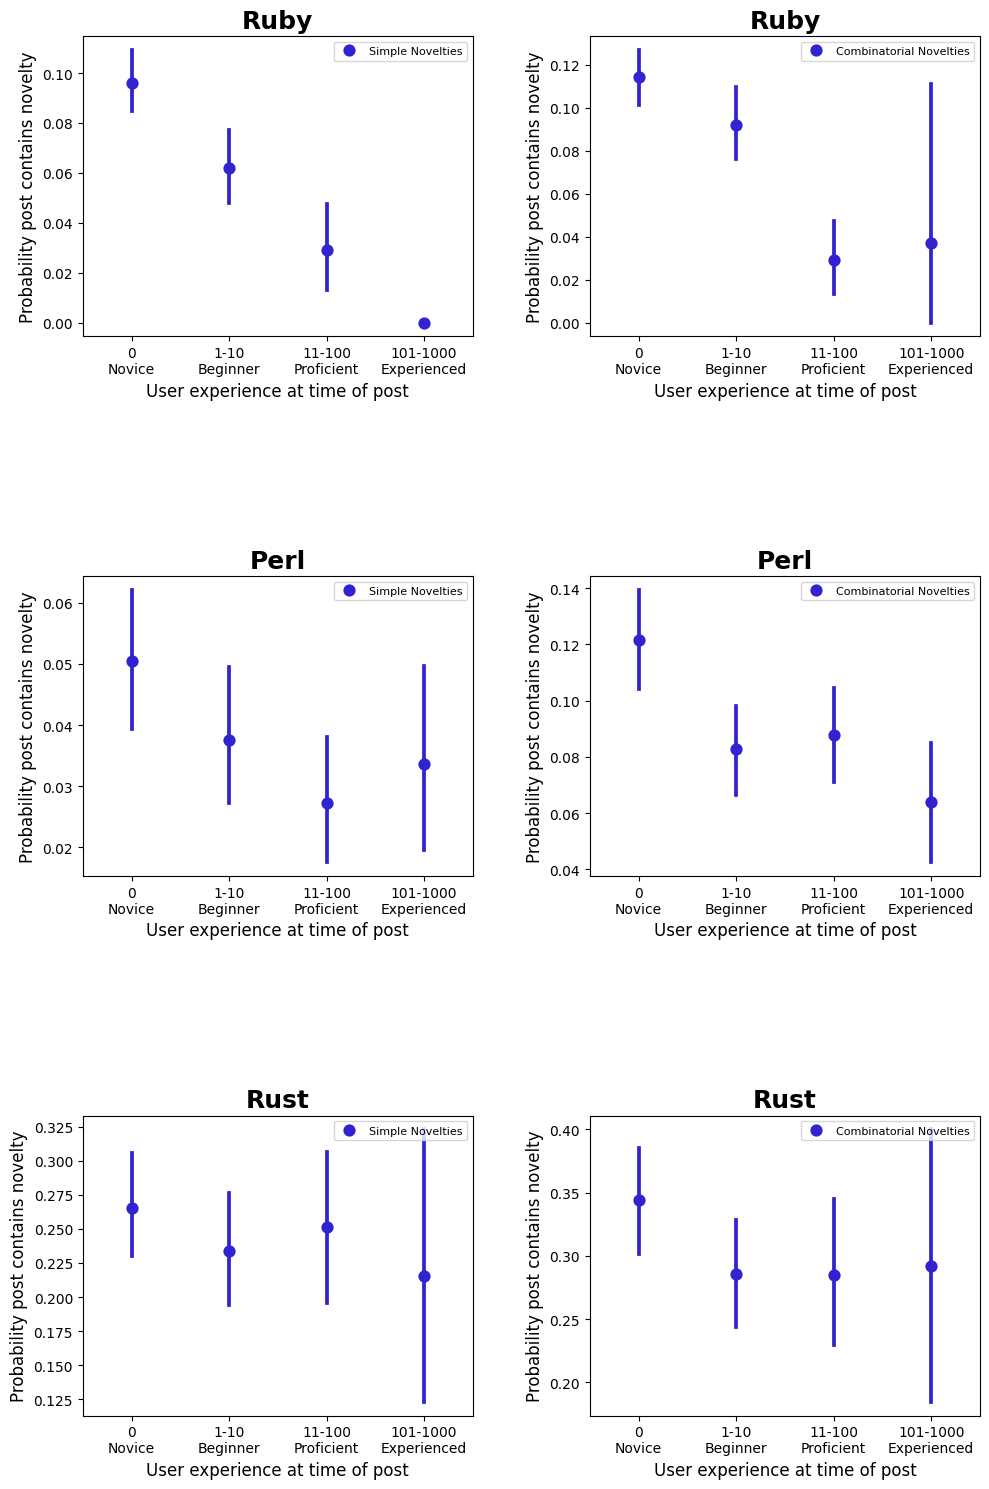

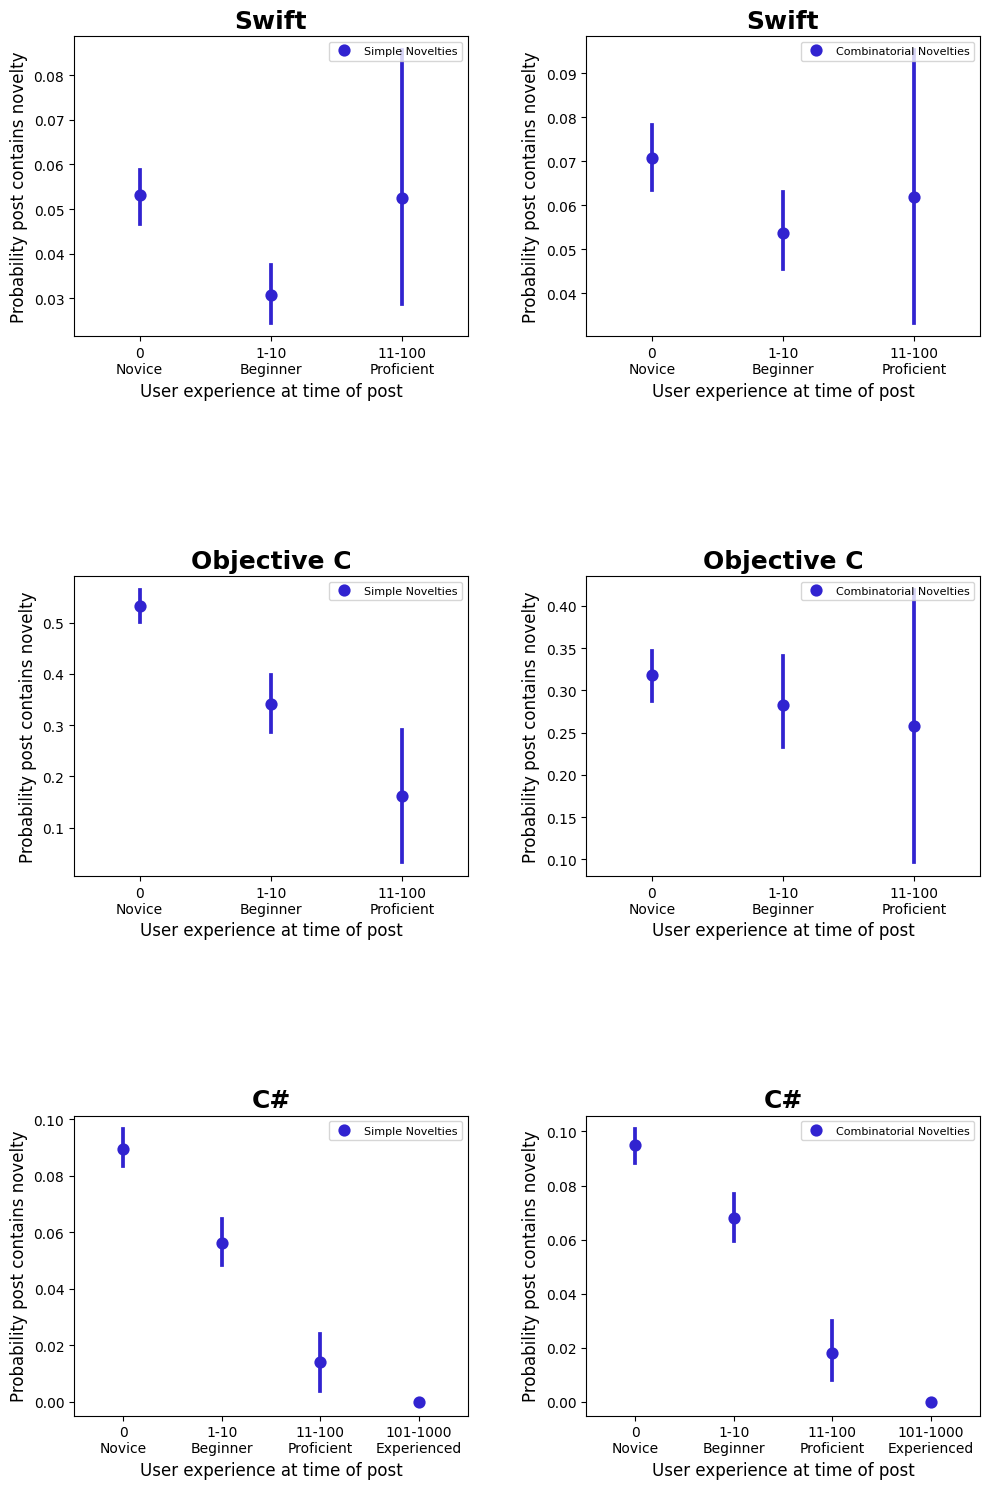

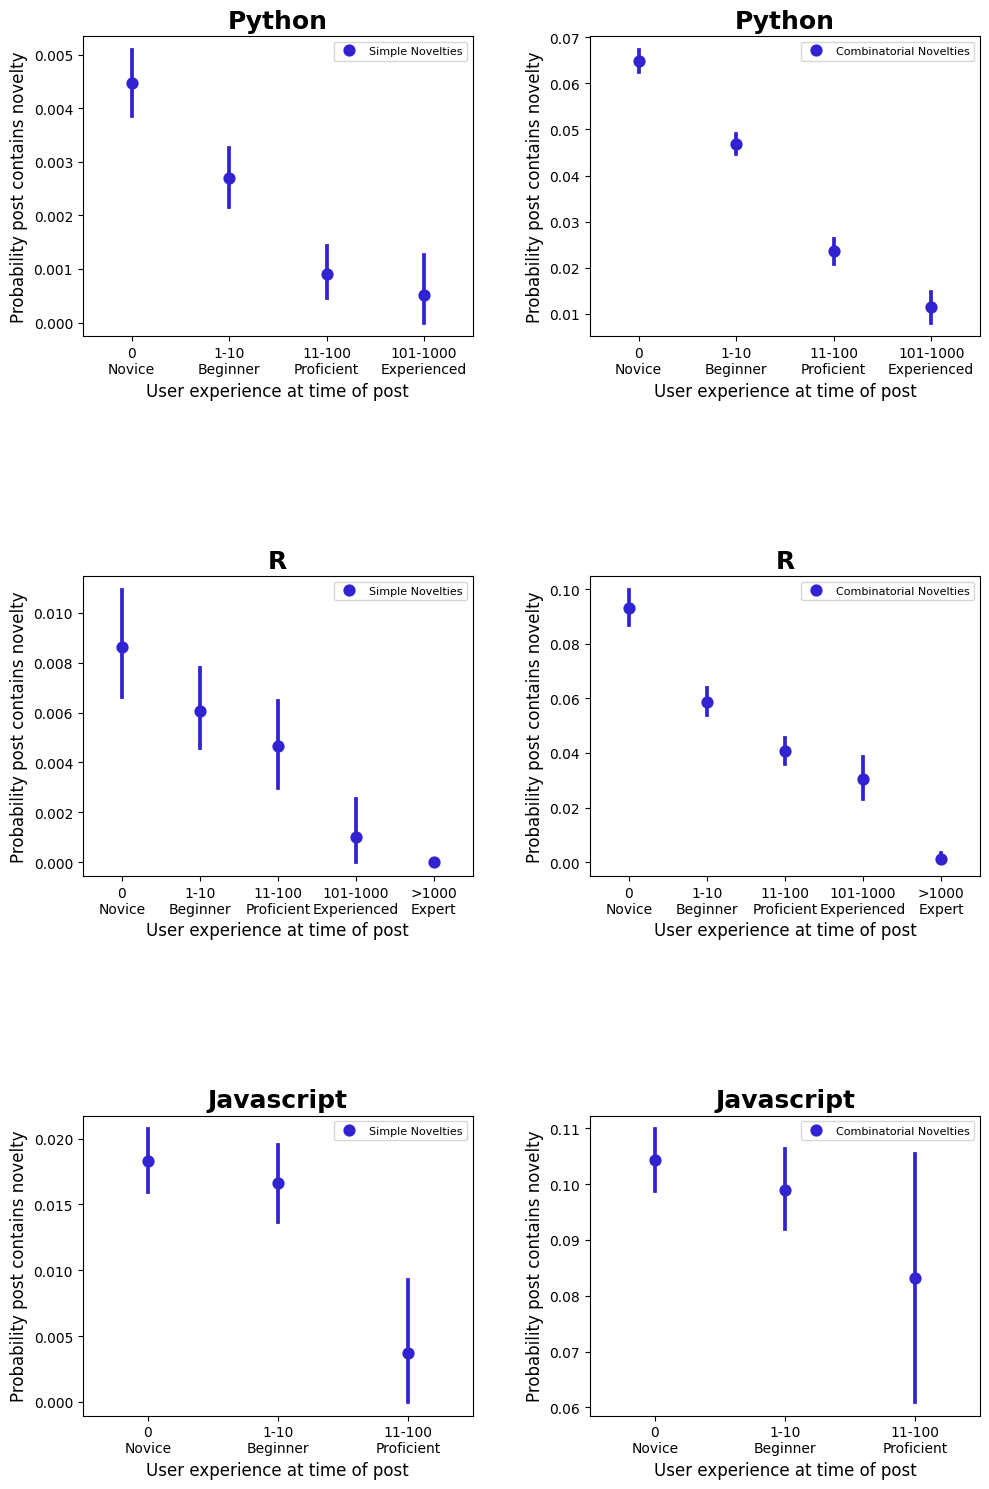

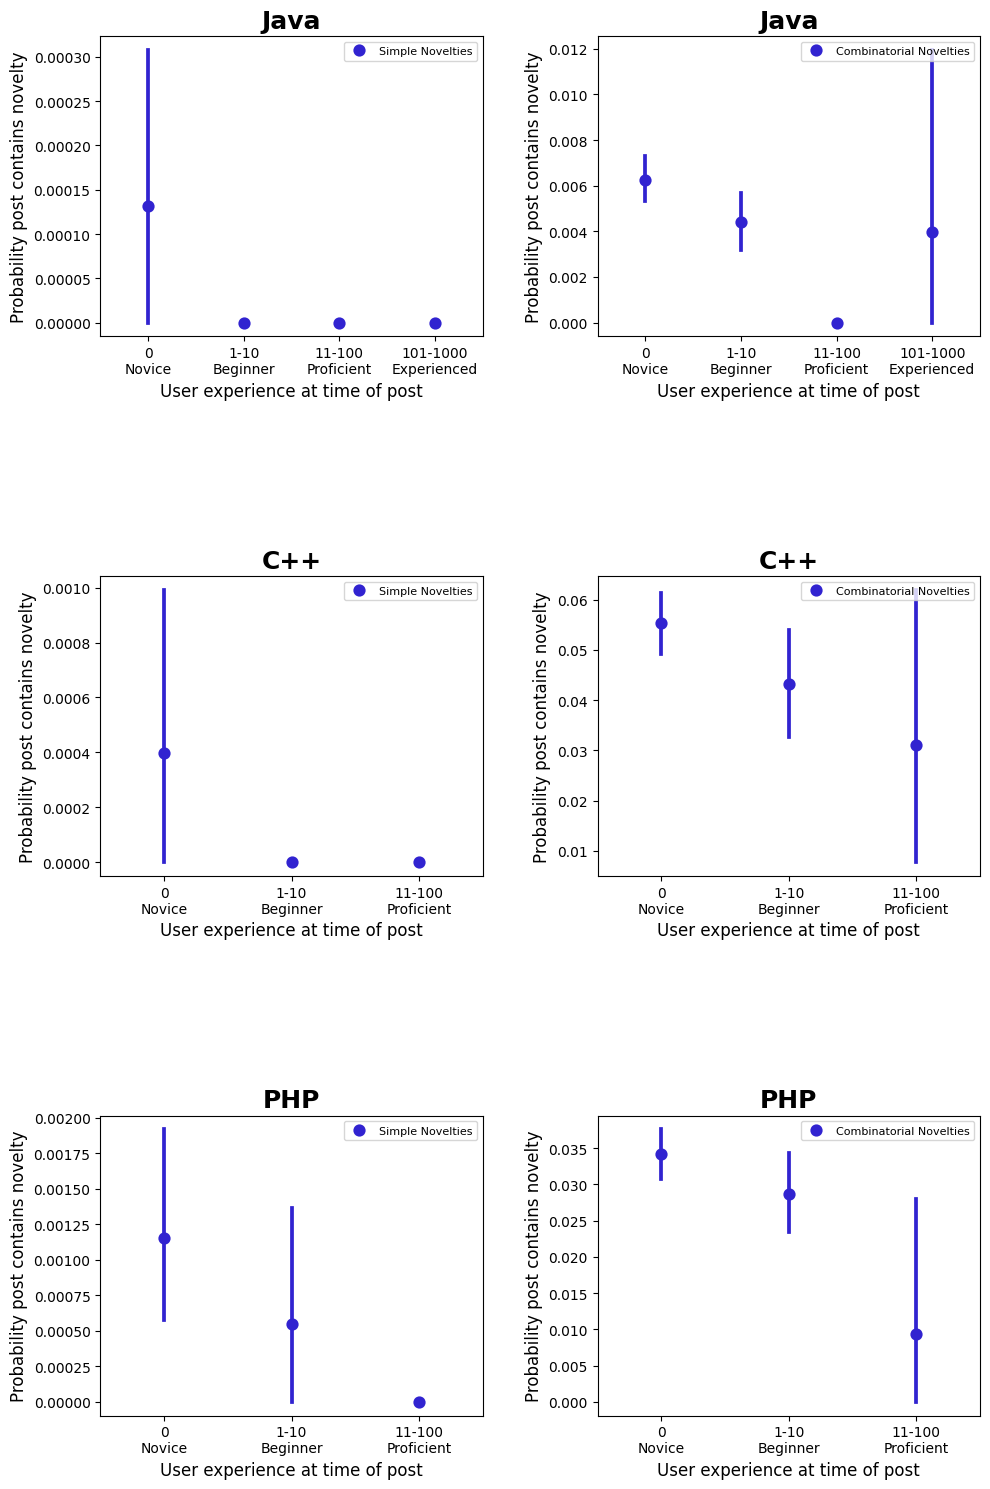

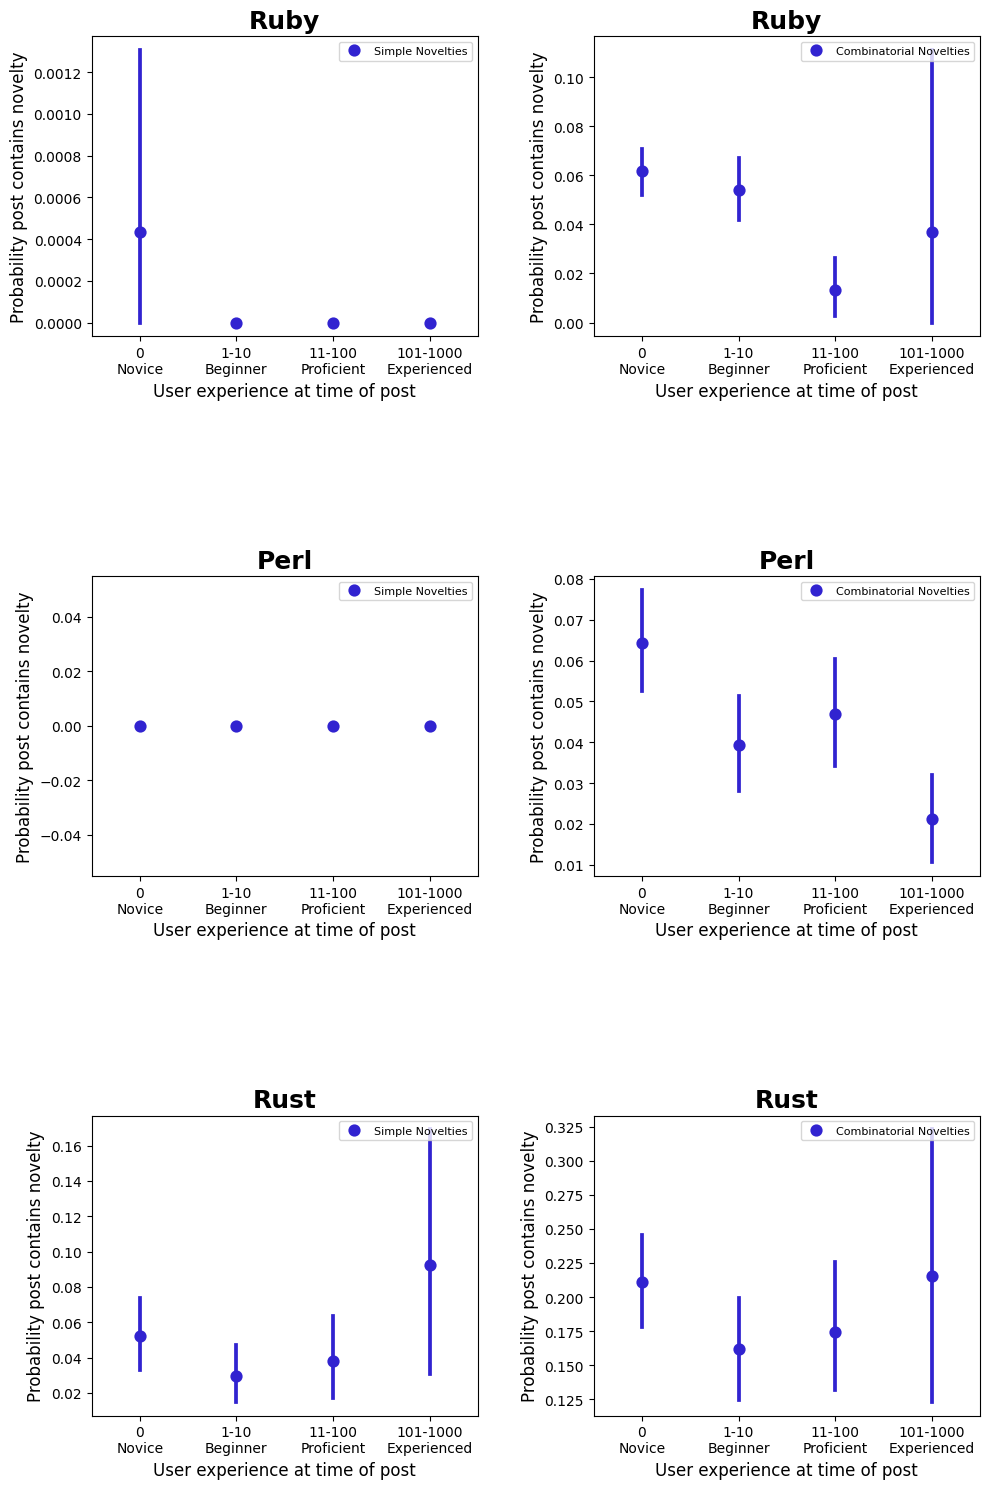

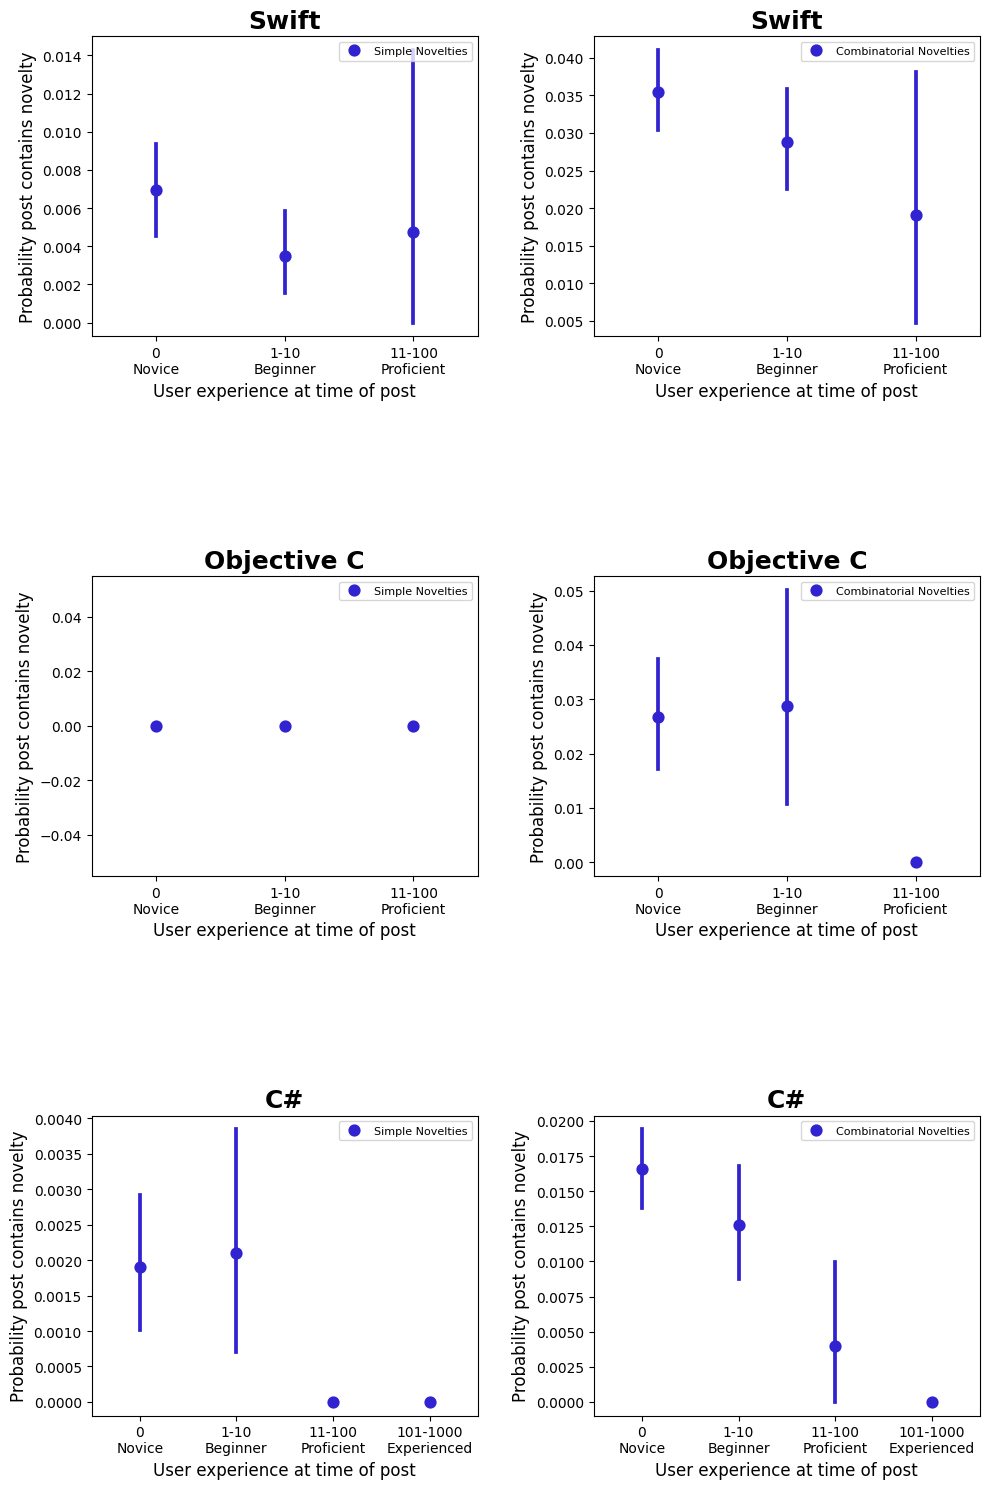

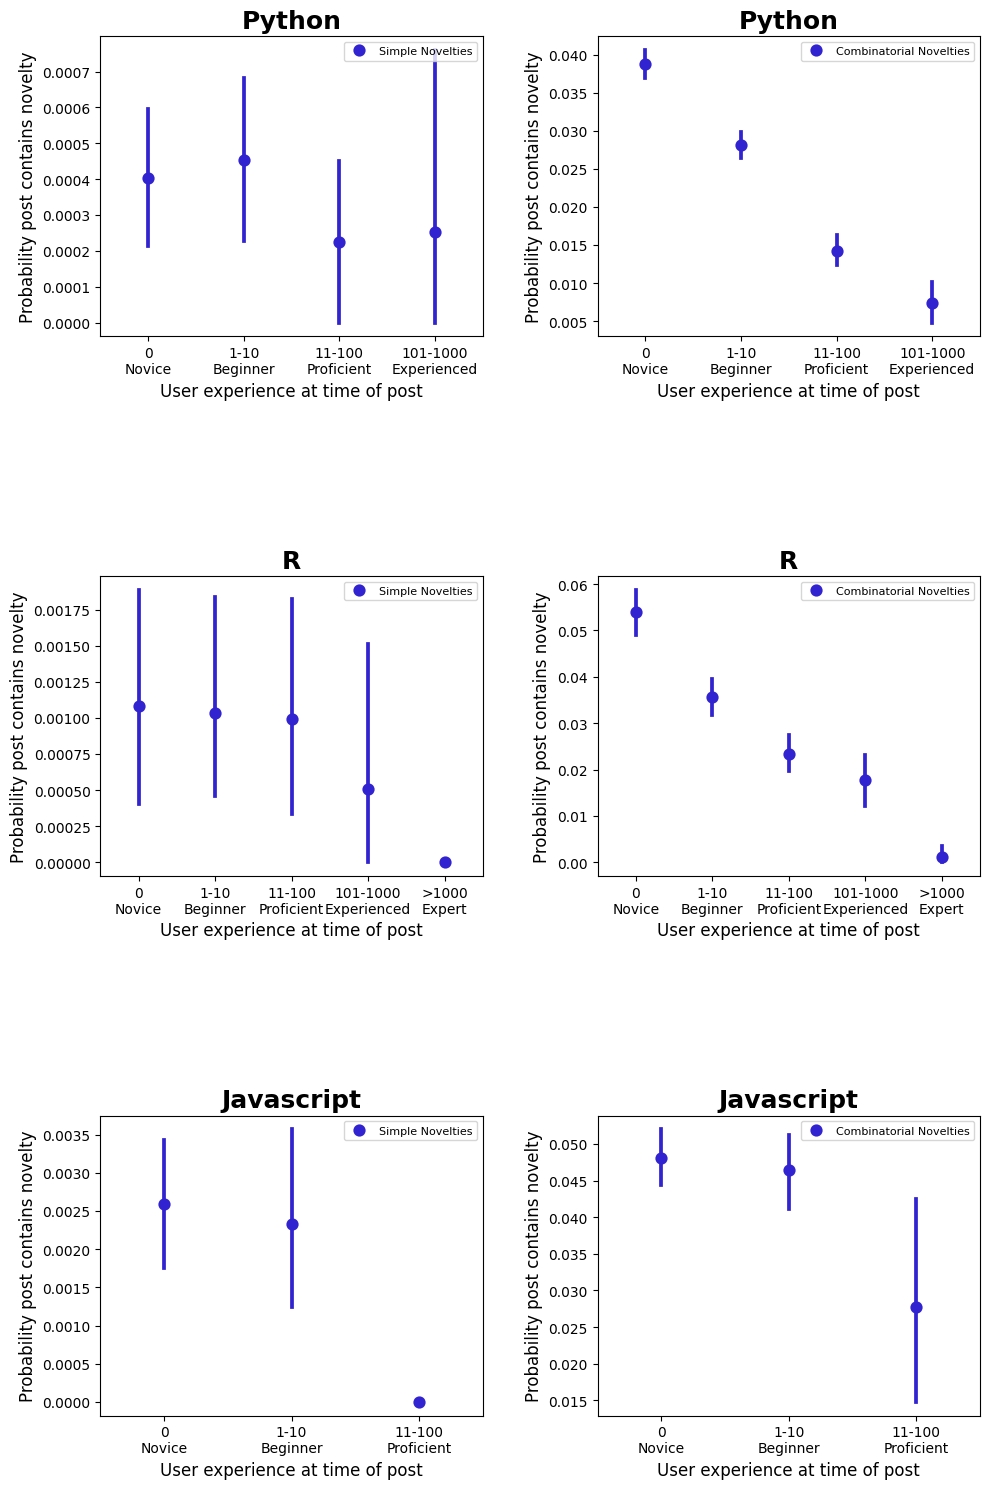

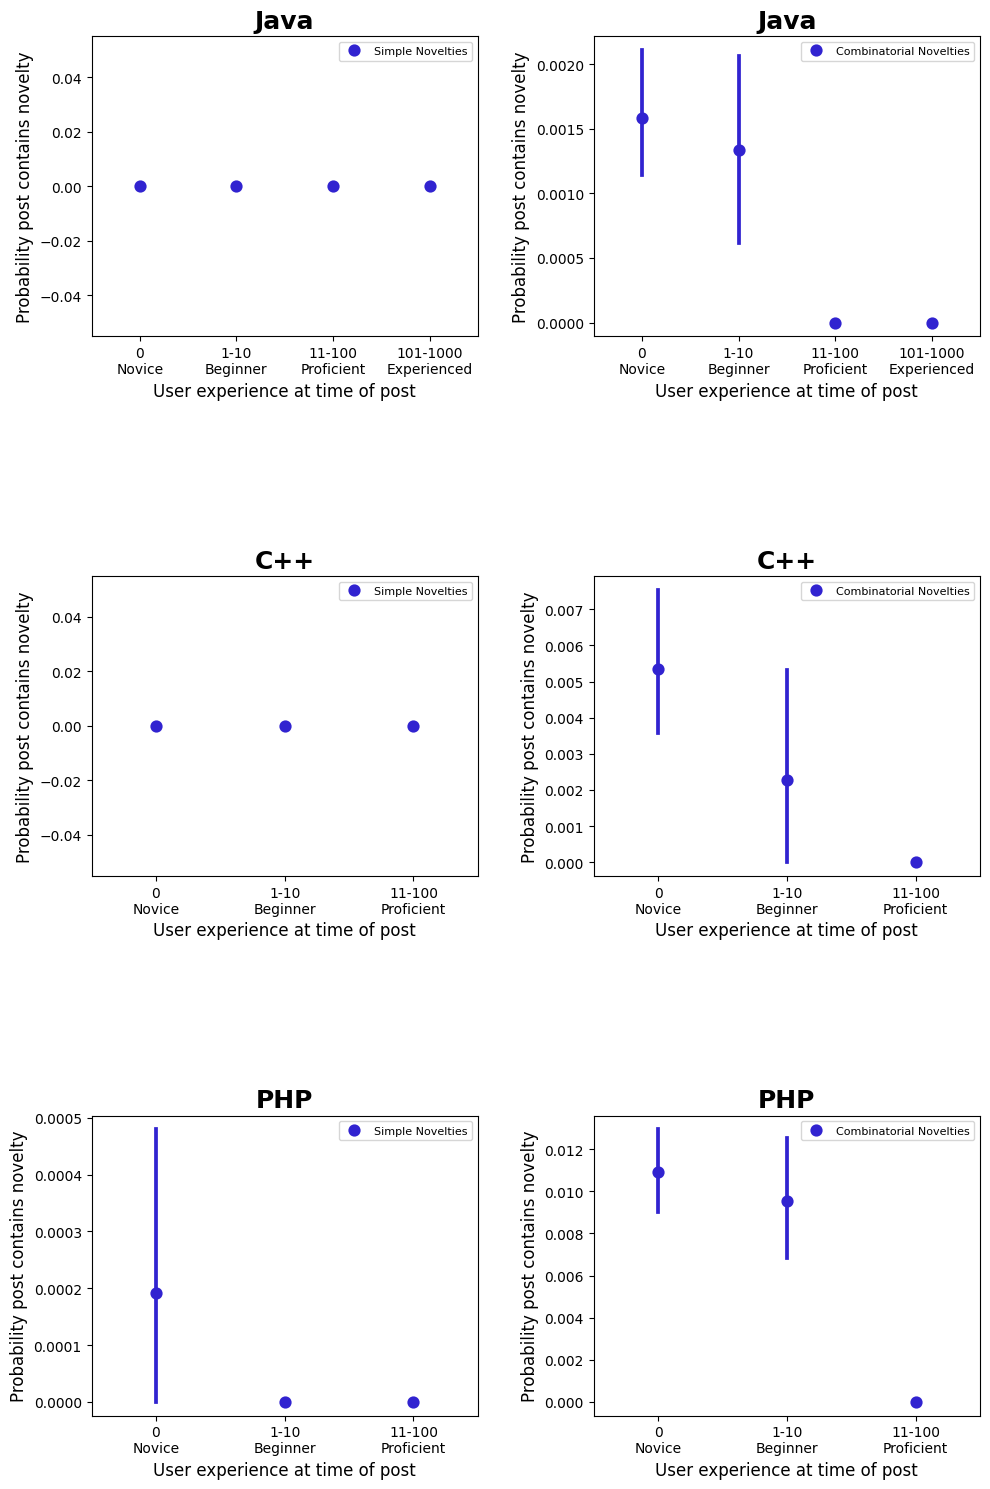

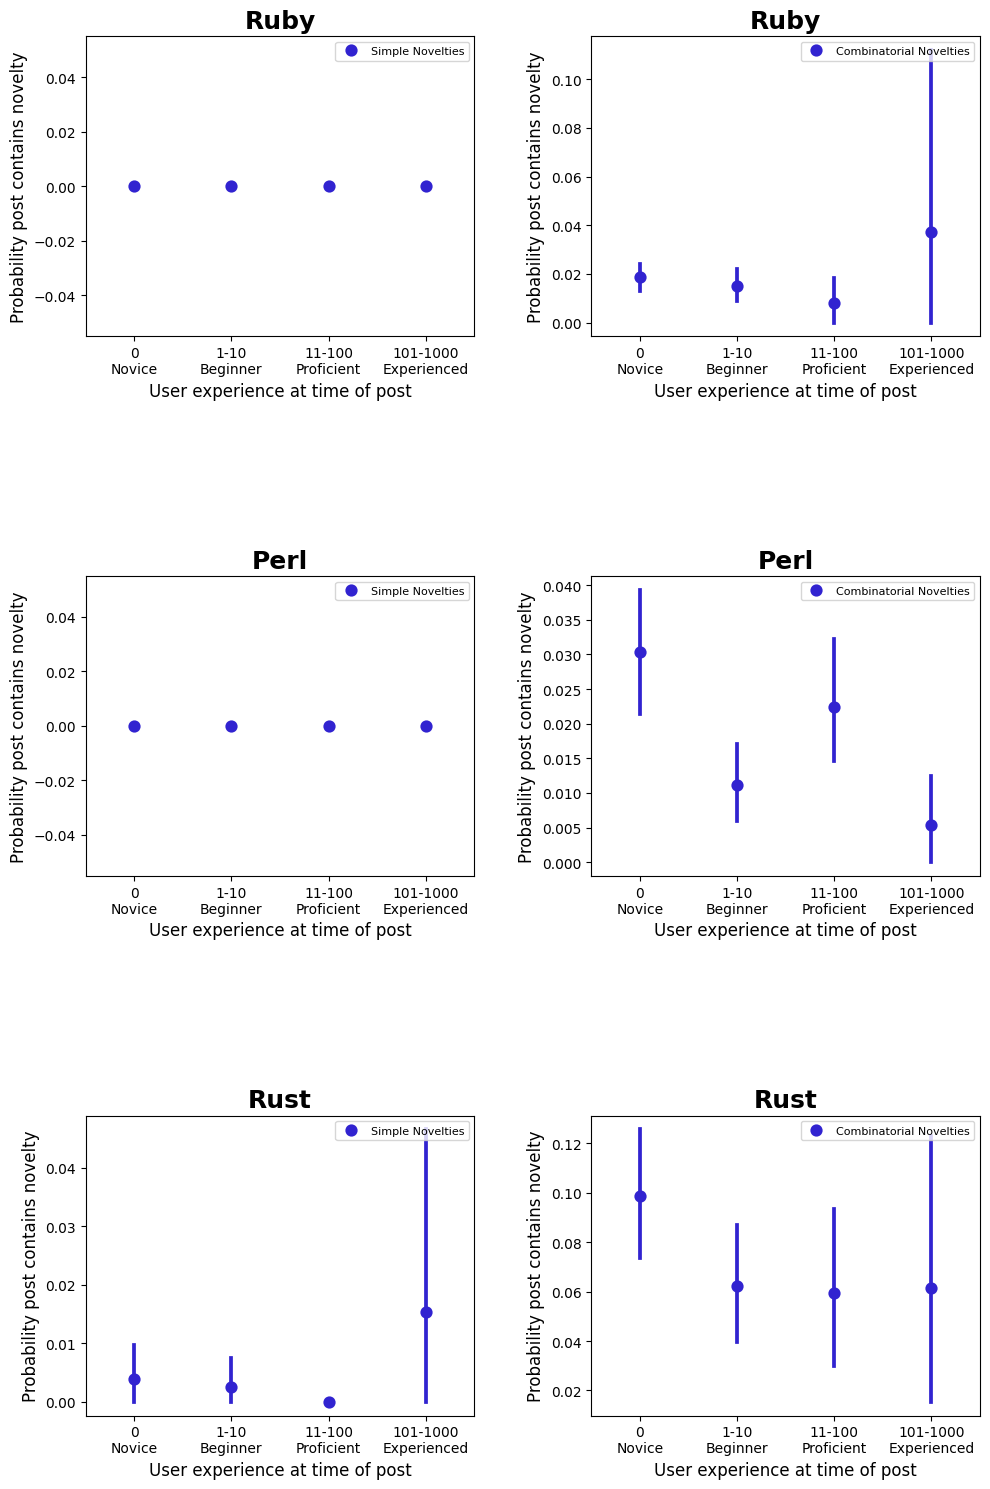

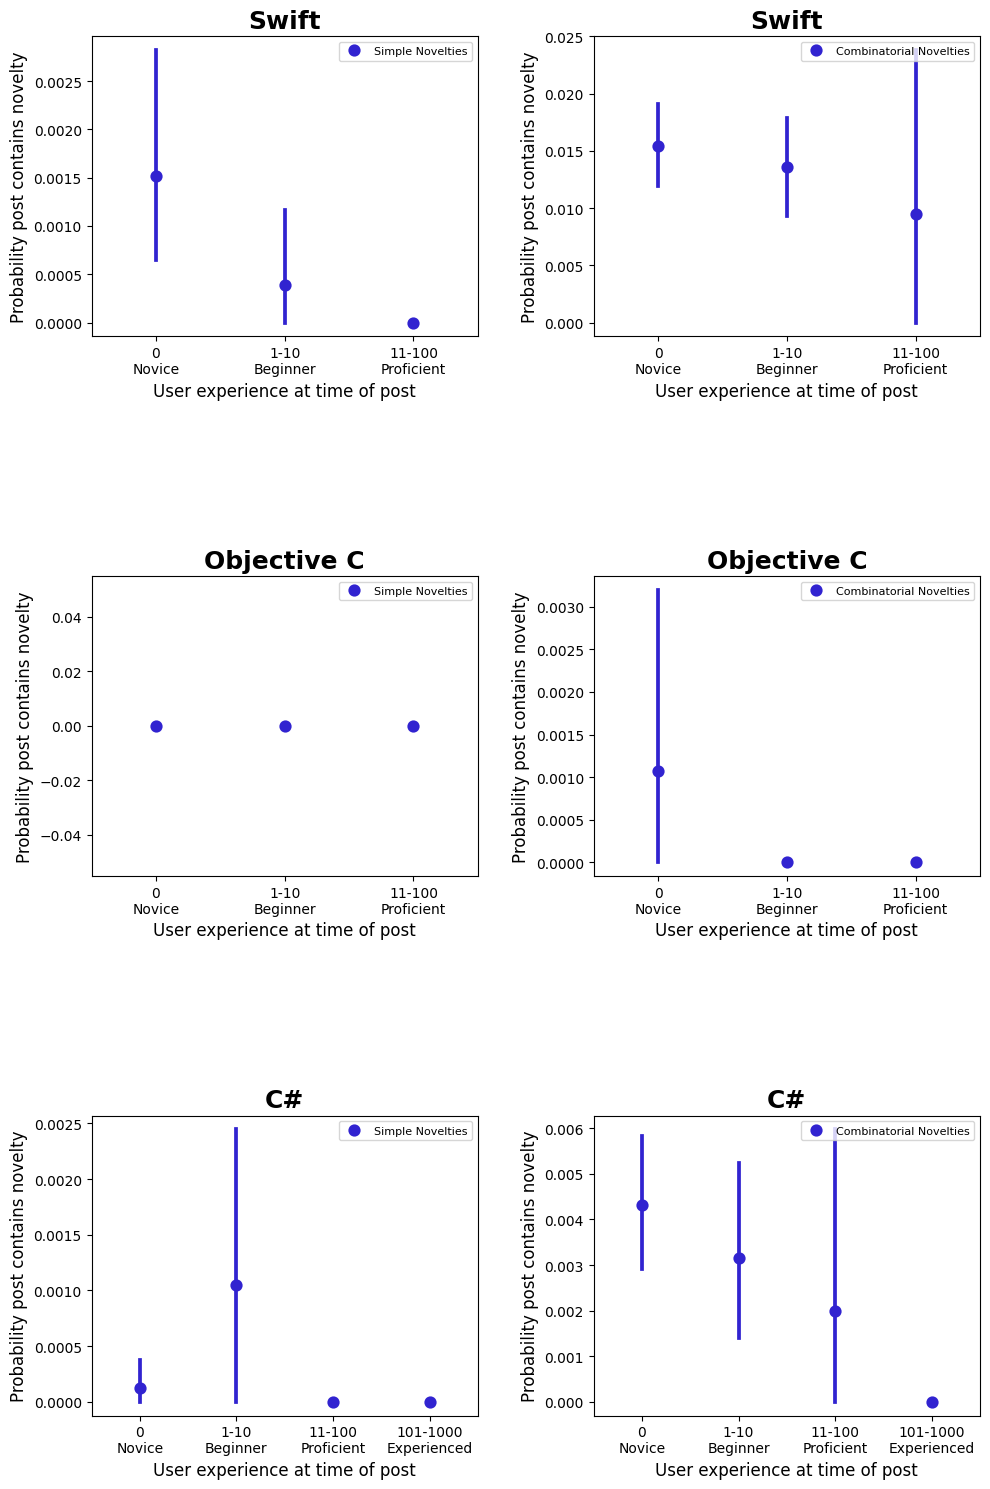

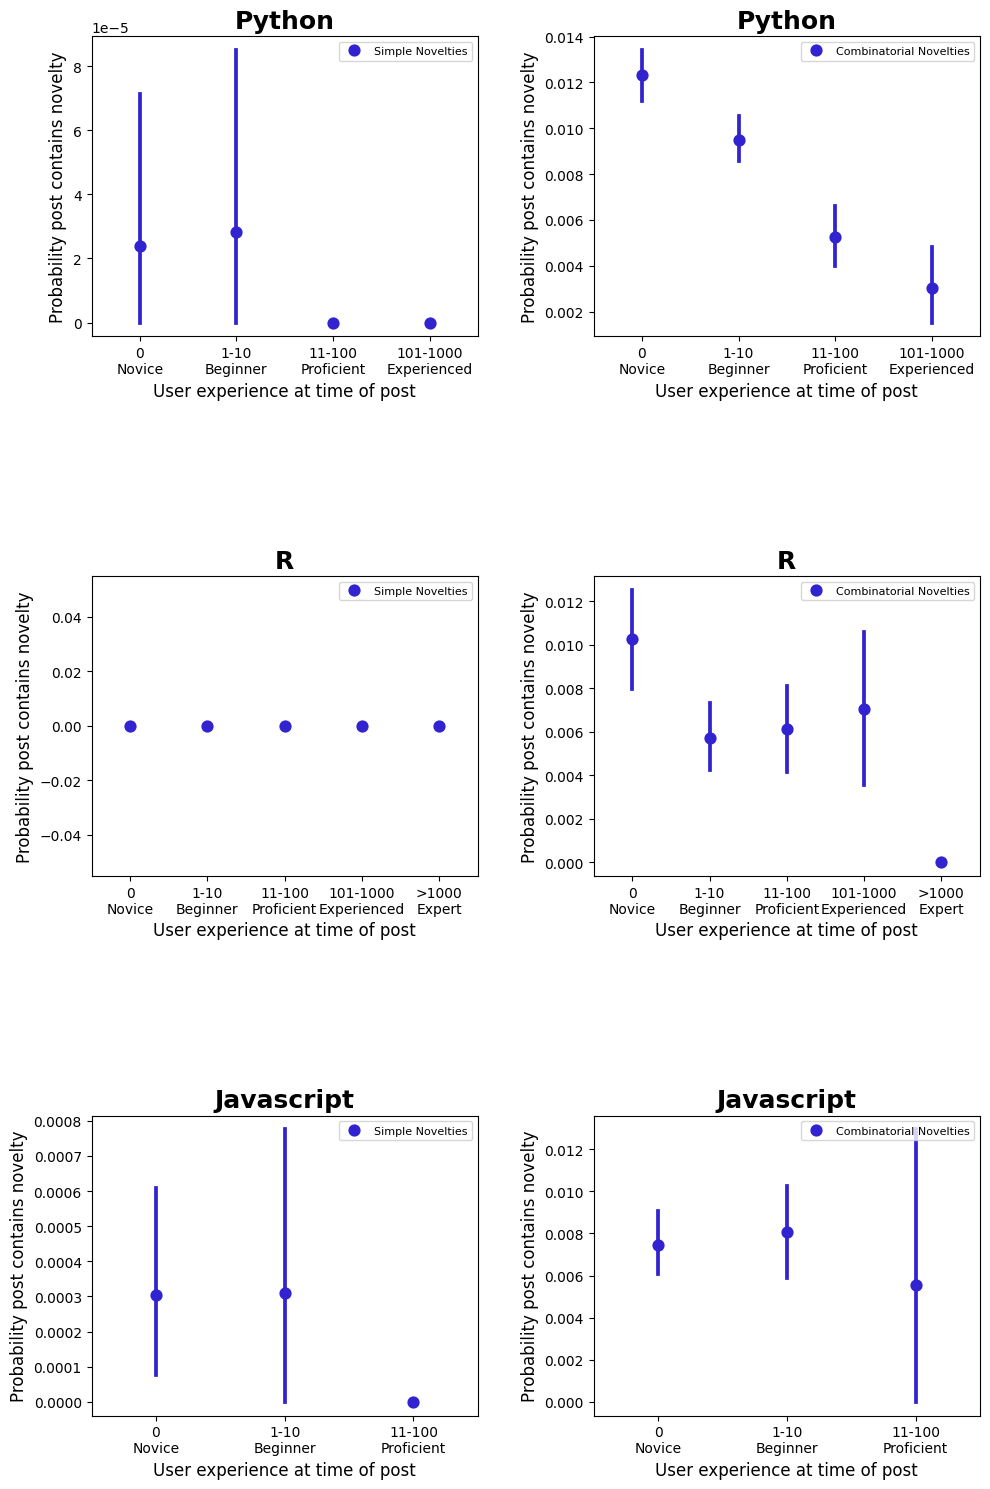

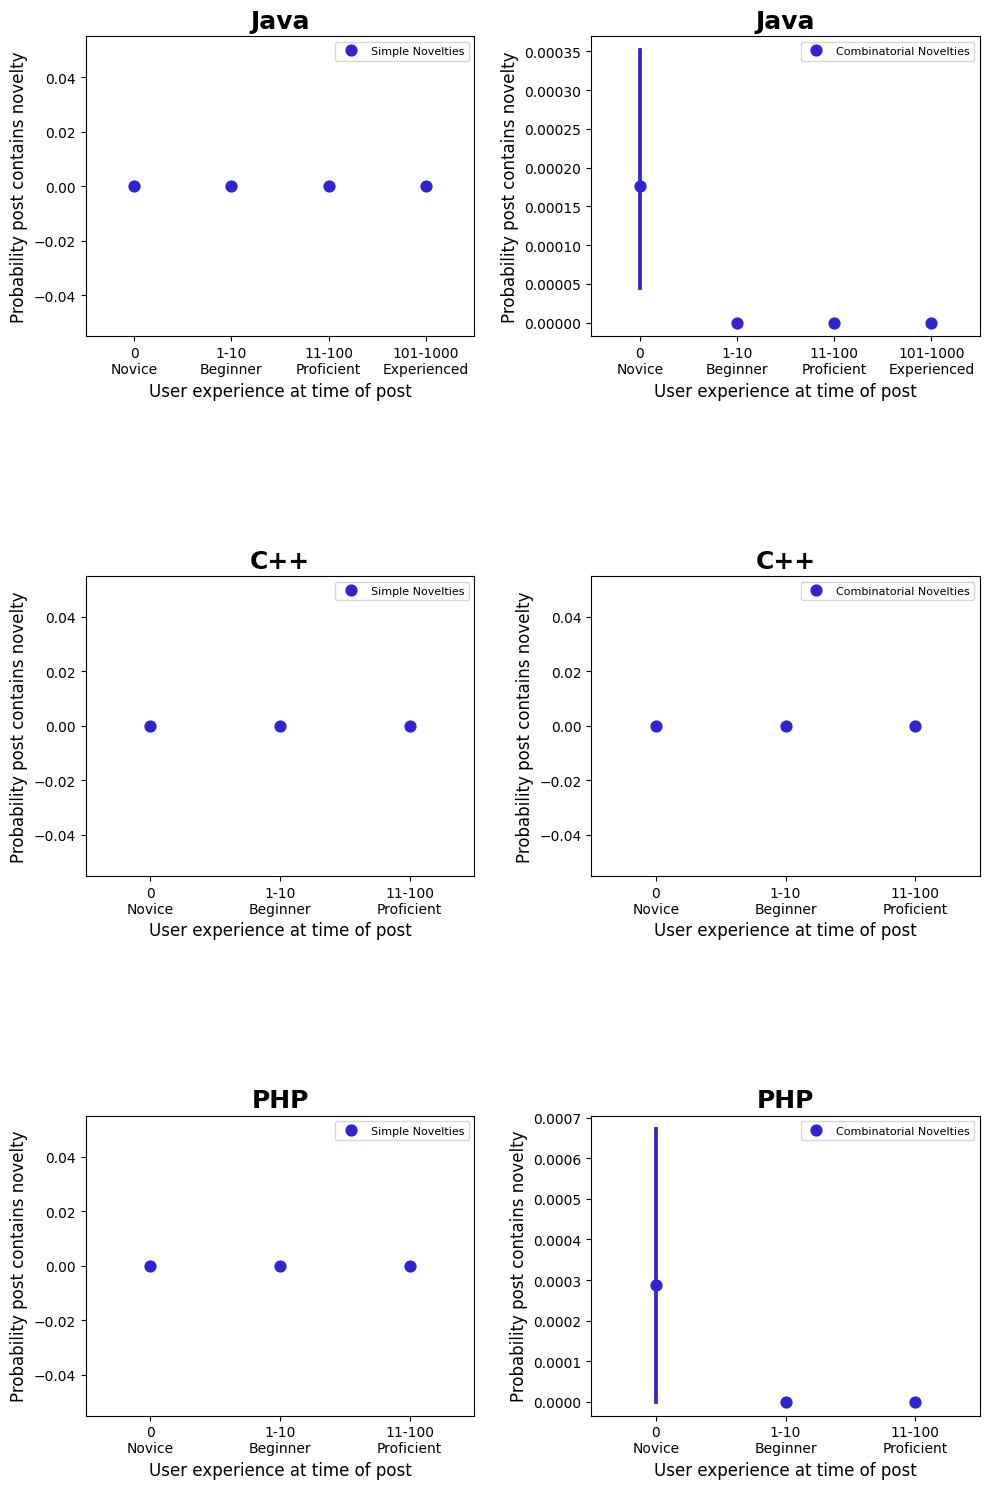

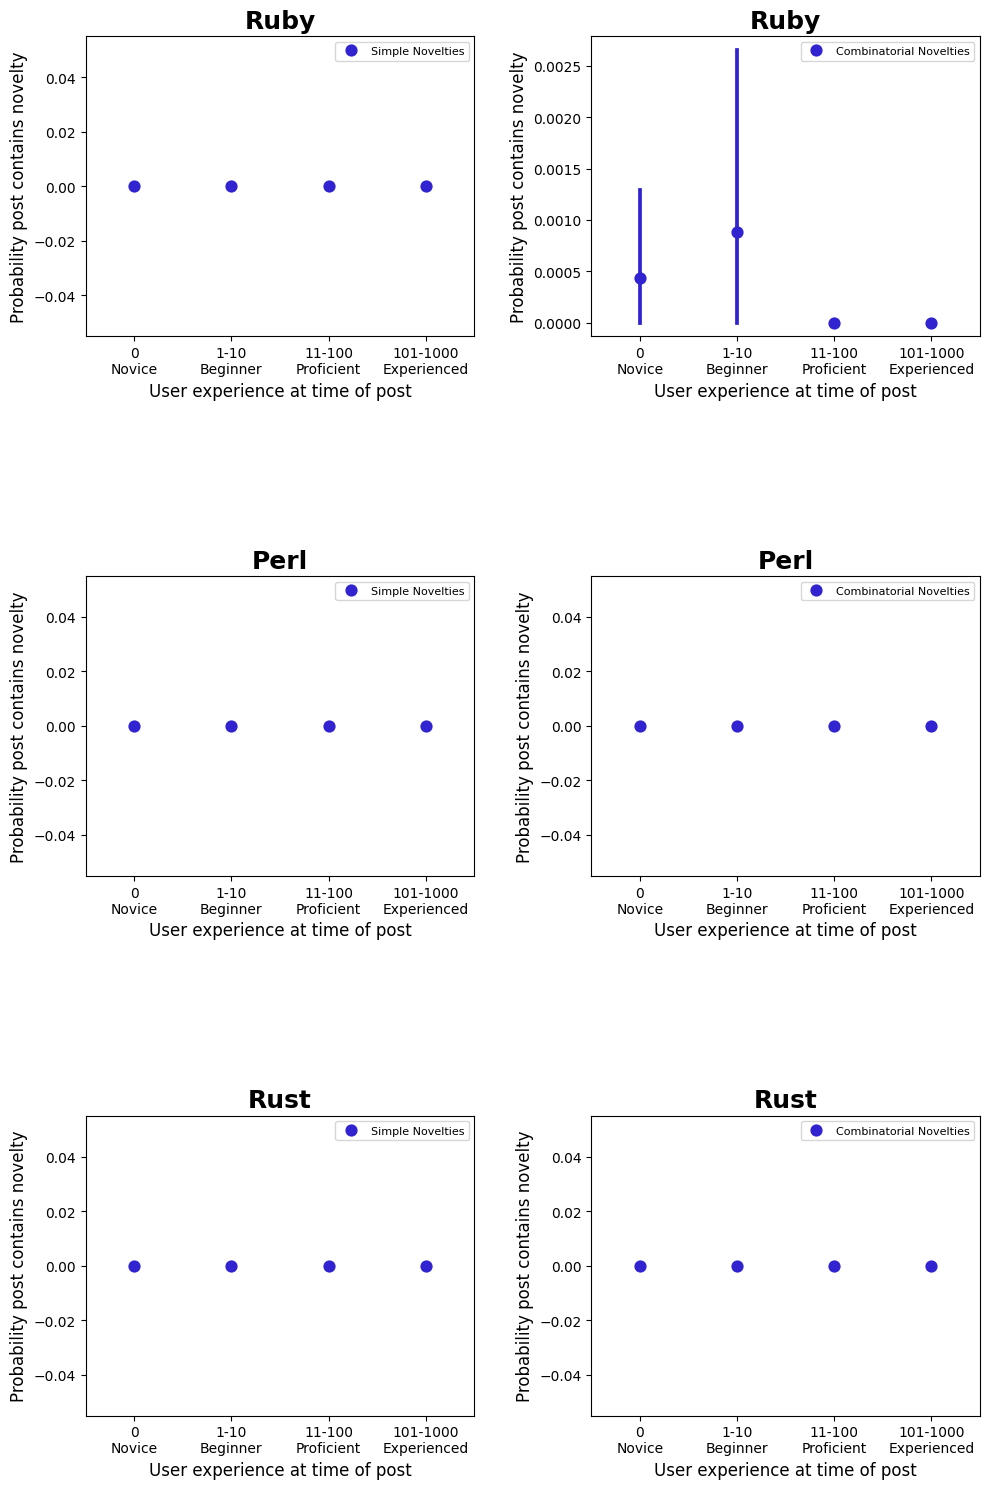

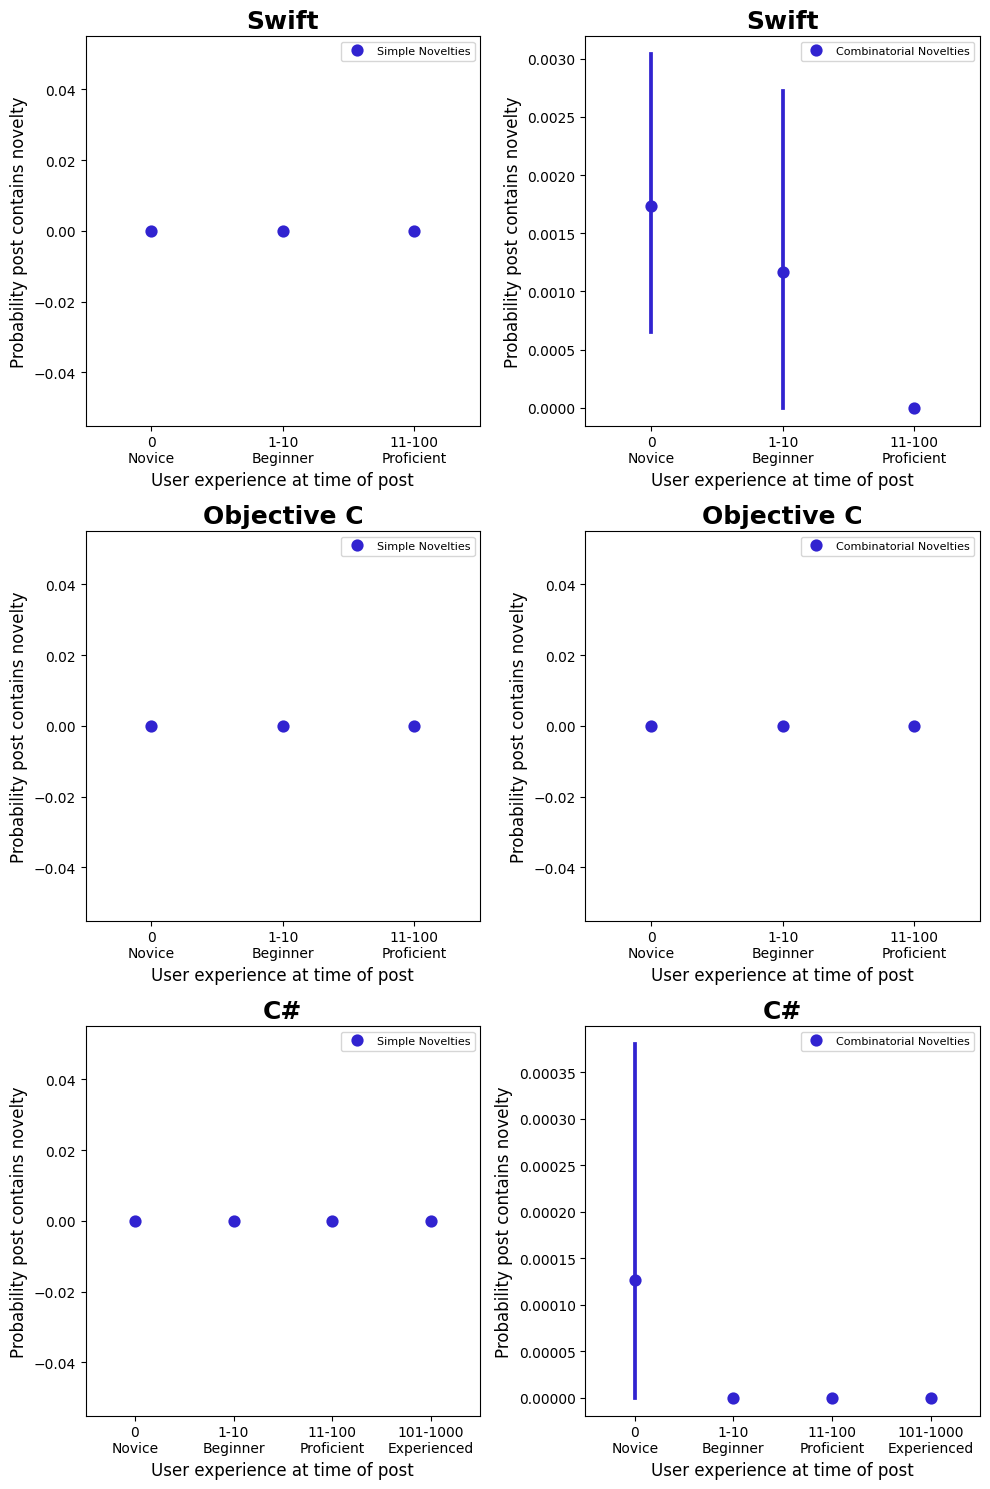

In [9]:
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import ScalarFormatter, LogFormatterExponent,LogFormatterMathtext


import time
from sklearn.linear_model import LinearRegression


%matplotlib inline

for LIMIT in LIMITS:
    def get_user_category(number_of_previous_posts: int) -> str:
        if number_of_previous_posts == 0:
            return "0\nNovice"
        if 0 < number_of_previous_posts <= 10:
            return "1-10\nBeginner"
        if 10 < number_of_previous_posts <= 100:
            return "11-100\nProficient"
        if 100 < number_of_previous_posts <= 1000:
            return "101-1000\nExperienced"
        if 1000 < number_of_previous_posts:
            return ">1000\nExpert"
        raise ValueError(f"post count {number_of_previous_posts} should be a positive integer!")
    
    TOTAL_INPUT = []

    PAGE_SIZE = 3
    page_cnt = 0
    for index, language in enumerate(LANGUAGES):
        if index % PAGE_SIZE == 0:
            page_cnt += 1
            print(f"Opening new page {page_cnt}")
            square_size = 5
            rows, columns = PAGE_SIZE, 2

            plt.subplots_adjust(hspace=0.8, wspace=0.3)
            fig = plt.figure(figsize=(square_size * columns, square_size * rows))
            gs = GridSpec(rows, columns, figure=fig)

        print(f"Processing {language}")
        path_to_lib = f"data/results/{language}"
    
        print("\t Processing resource...")
        user_post_count = collections.defaultdict(int)
        
        libs_df_input = []
        pairs_df_input = []
    
        with open(f"{path_to_lib}/{language}_libs_count.json") as handle:
            libs_count = json.load(handle)
        
        with open(f"{path_to_lib}/{language}_time_based_new.jsonl") as handle:
            for line in handle:
                json_data = json.loads(line)
                if int(json_data.get("post_date", 0)[:4]) != YEAR:
                    continue
                TOTAL_INPUT.append(json_data)
    
                new_libs = [item for item in json_data.get("new_libs") if libs_count.get(item, 0) > LIMIT]
                new_pairs = [item for item in json_data.get("new_pairs") if all(libs_count.get(lib_, 0) > LIMIT for lib_ in item.split("|"))]
    
                category = get_user_category(user_post_count[json_data["user_id"]])
                new_libs_row = [
                    json_data["post_id"],
                    bool(len(new_libs)),
                    category,
                ]
                new_pairs_row = [
                    json_data["post_id"],
                    bool(len(new_pairs)),
                    category,
                ]
               
                user_post_count[json_data["user_id"]] += 1
                libs_df_input.append(new_libs_row)
                pairs_df_input.append(new_pairs_row)

            libs_df = pd.DataFrame(libs_df_input, columns=["Id", "Novel", "User_Type"])
            pairs_df = pd.DataFrame(pairs_df_input, columns=["Id", "Novel", "User_Type"])
            
            ax1= fig.add_subplot(gs[index % PAGE_SIZE, 0])
            sns.pointplot(data=libs_df, x="User_Type", y="Novel", linestyles="", ax=ax1, label="Simple Novelties", color=chrysler_blue)
            ax1.set_title(f'{LANGUAGES[language]}', fontsize=18, fontweight='bold')
            ax1.set_xlabel("User experience at time of post", fontsize=12)
            ax1.set_ylabel("Probability post contains novelty", fontsize=12)
            ax1.legend(fontsize=8, loc="upper right")
            
            ax2= fig.add_subplot(gs[index % PAGE_SIZE, 1])
            sns.pointplot(data=pairs_df, x="User_Type", y="Novel", linestyles="", ax=ax2, label="Combinatorial Novelties", color=chrysler_blue)
            ax2.set_title(f'{LANGUAGES[language]}', fontsize=18, fontweight='bold')
            ax2.set_xlabel("User experience at time of post", fontsize=12)
            ax2.set_ylabel("Probability post contains novelty", fontsize=12)
            ax2.legend(fontsize=8, loc="upper right")

        if index % PAGE_SIZE == PAGE_SIZE - 1:
            print(f"saving page {page_cnt}")
            plt.tight_layout()
            fig.savefig(f"experiences_12_with_limit_{LIMIT}_{page_cnt}_YEAR_{YEAR}.png")

In [10]:
SORTED_TOTAL_INPUT = sorted(TOTAL_INPUT, key=lambda x: x.get("post_date"))

user_post_count = collections.defaultdict(int)
libs_rows = []
pairs_rows = []
for item in tqdm.tqdm(SORTED_TOTAL_INPUT):
    new_libs_row = [
        json_data["post_id"],
        bool(len(item.get("new_libs", []))),
        get_user_category(user_post_count[item["user_id"]]),
        item["post_date"],
    ] 
    new_pairs_row = [
        json_data["post_id"],
        bool(len(item.get("new_pairs", []))),
        get_user_category(user_post_count[item["user_id"]]),
        item["post_date"],
    ] 
    user_post_count[item["user_id"]] += 1
    libs_rows.append(new_libs_row)
    pairs_rows.append(new_pairs_row)

libs_df = pd.DataFrame(libs_rows, columns=["Id", "Novel", "User_Type", "Date_Posted"])
pairs_df = pd.DataFrame(pairs_rows, columns=["Id", "Novel", "User_Type", "Date_Posted"])

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 223893/223893 [00:01<00:00, 158527.51it/s]


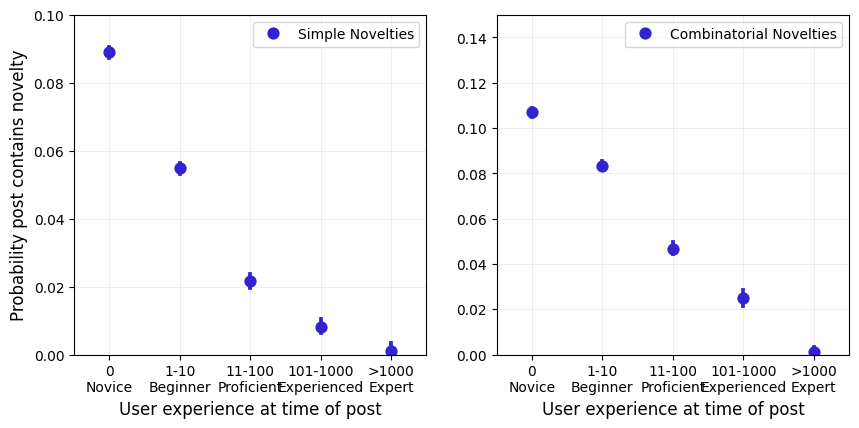

In [11]:
total_fig = plt.figure(figsize=(10, 15))

ax1 = total_fig.add_subplot(gs[0, 0])
sns.pointplot(data=libs_df, x="User_Type", y="Novel", ax=ax1, linestyles="", label="Simple Novelties", color=chrysler_blue)
ax1.set_xlabel("User experience at time of post", fontsize=12)
ax1.set_ylabel("Probability post contains novelty", fontsize=12)
#ax1.set_title("All Studied Programming Languages")
ax1.margins(y=0)
ax1.set_ylim(0, 0.1)
plt.grid(alpha=0.2)
ax2 = total_fig.add_subplot(gs[0, 1])
sns.pointplot(data=pairs_df, x="User_Type", y="Novel", ax=ax2, linestyles="", label="Combinatorial Novelties", color=chrysler_blue)
ax2.set_xlabel("User experience at time of post", fontsize=12)
#ax2.set_ylabel("Probability post contains novelty", fontsize=12)
ax2.set_ylabel("")
ax2.set_ylim(0, 0.15)
#ax2.set_title("All Studied Programming Languages")
ax2.margins(y=0)
plt.grid(alpha=0.2)
total_fig.savefig(f"experiences_total_with_limit_{LIMIT}_YEAR_{YEAR}.png")


# Flipped plots

Processing python
	 Processing resource...
Processing r
	 Processing resource...
Processing javascript
	 Processing resource...
Processing java
	 Processing resource...
Processing cpp
	 Processing resource...
Processing php
	 Processing resource...
Processing ruby
	 Processing resource...
Processing perl
	 Processing resource...
Processing rust
	 Processing resource...
Processing swift
	 Processing resource...
Processing objectivec
	 Processing resource...
Processing c#
	 Processing resource...


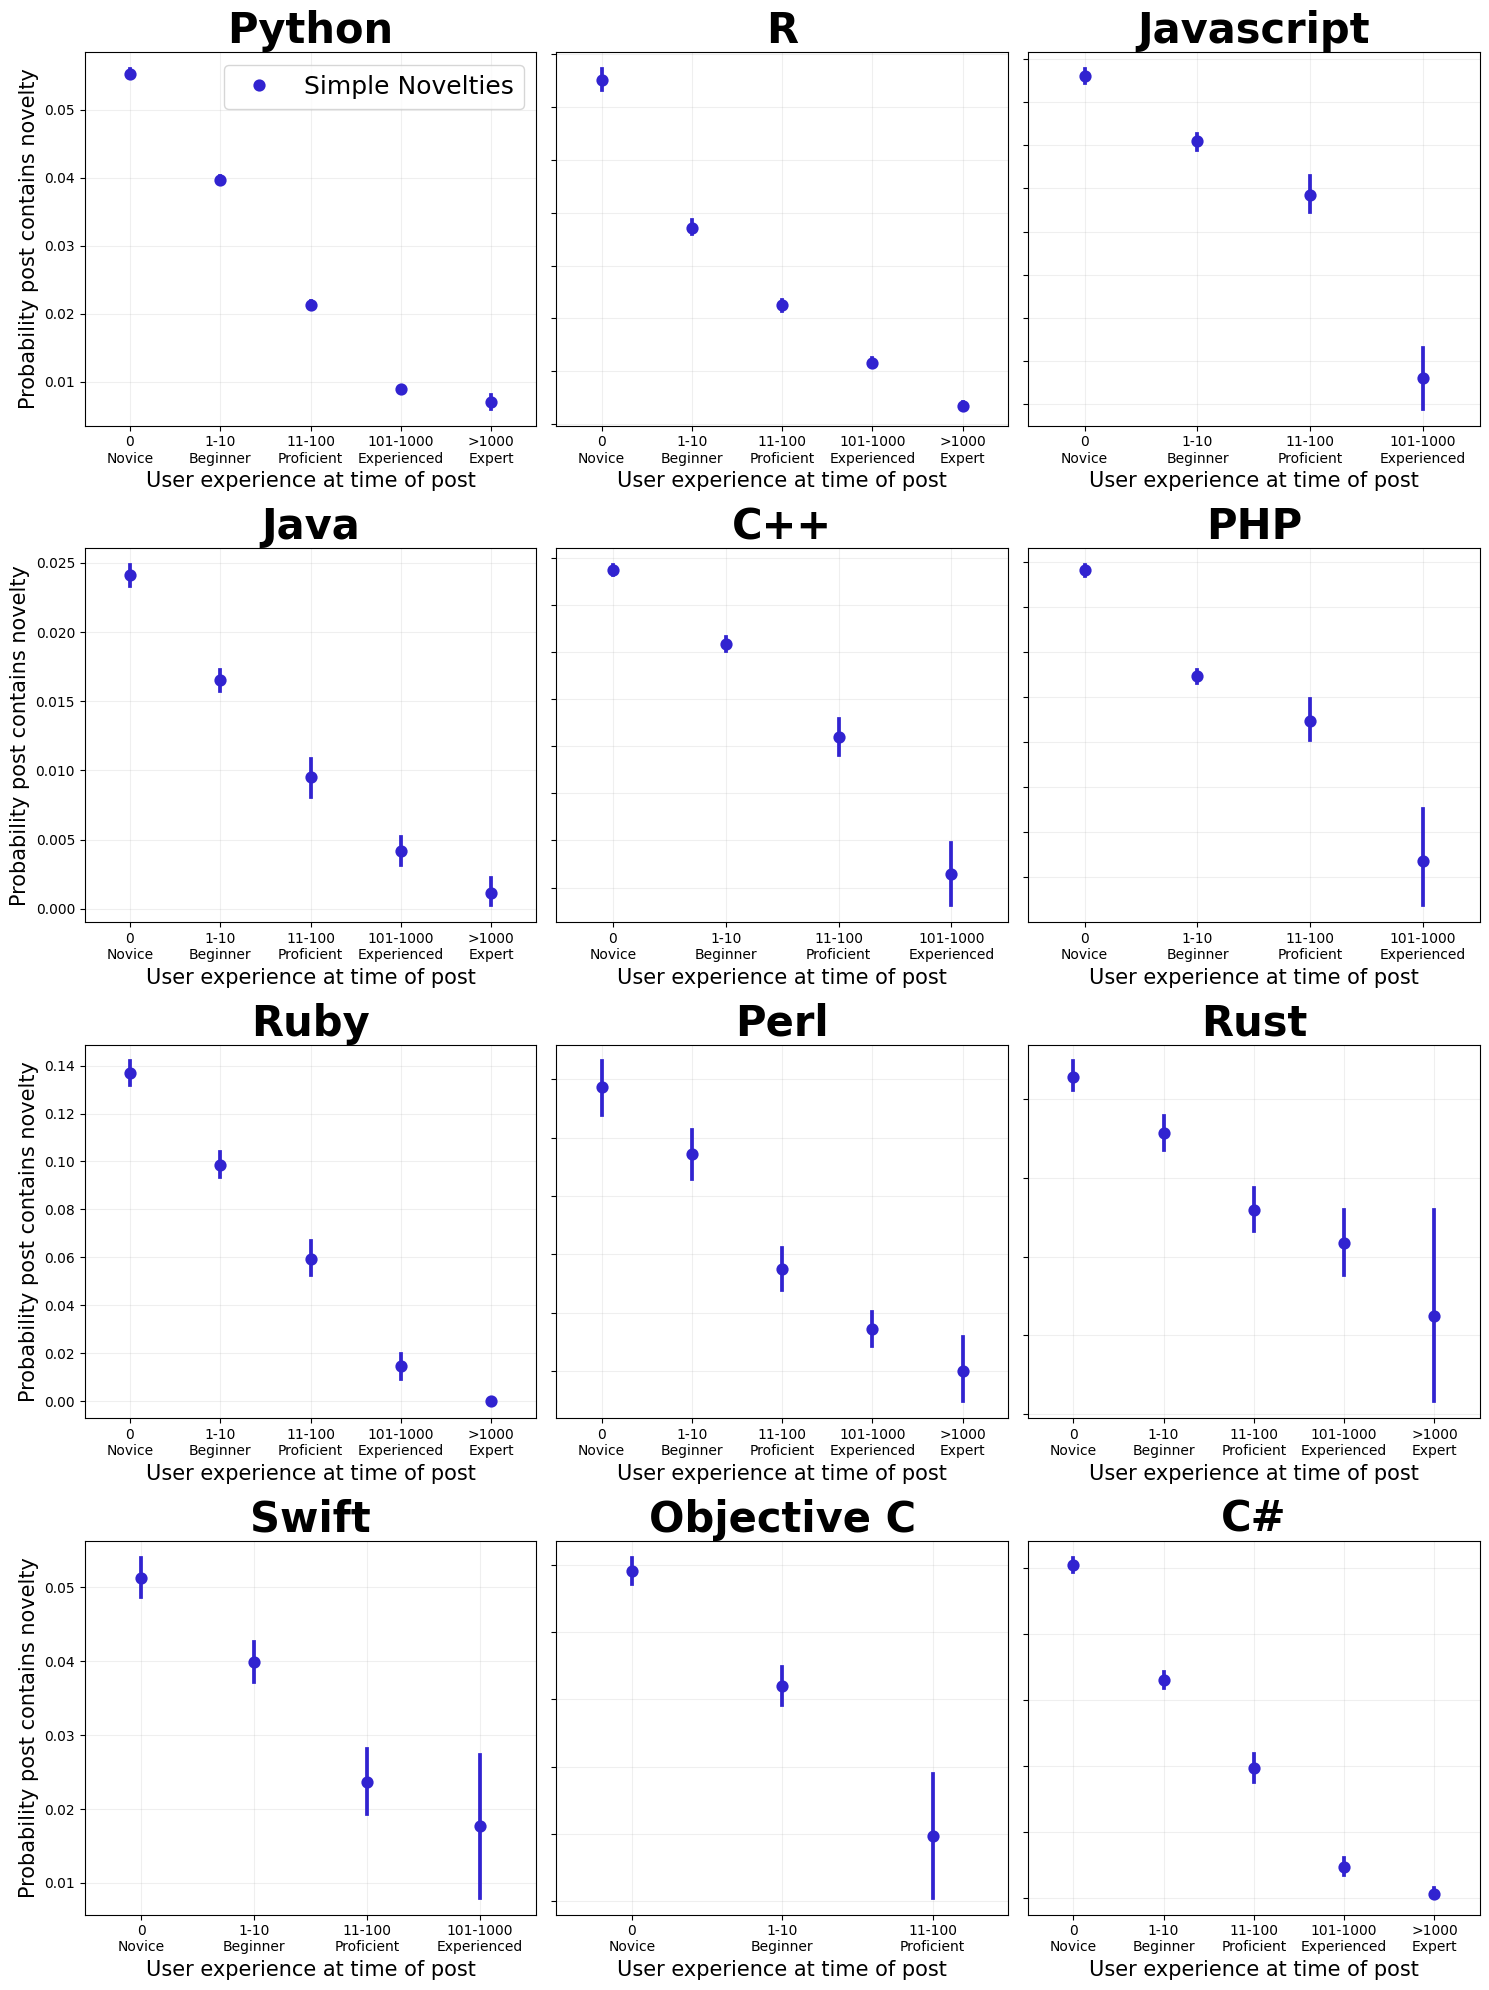

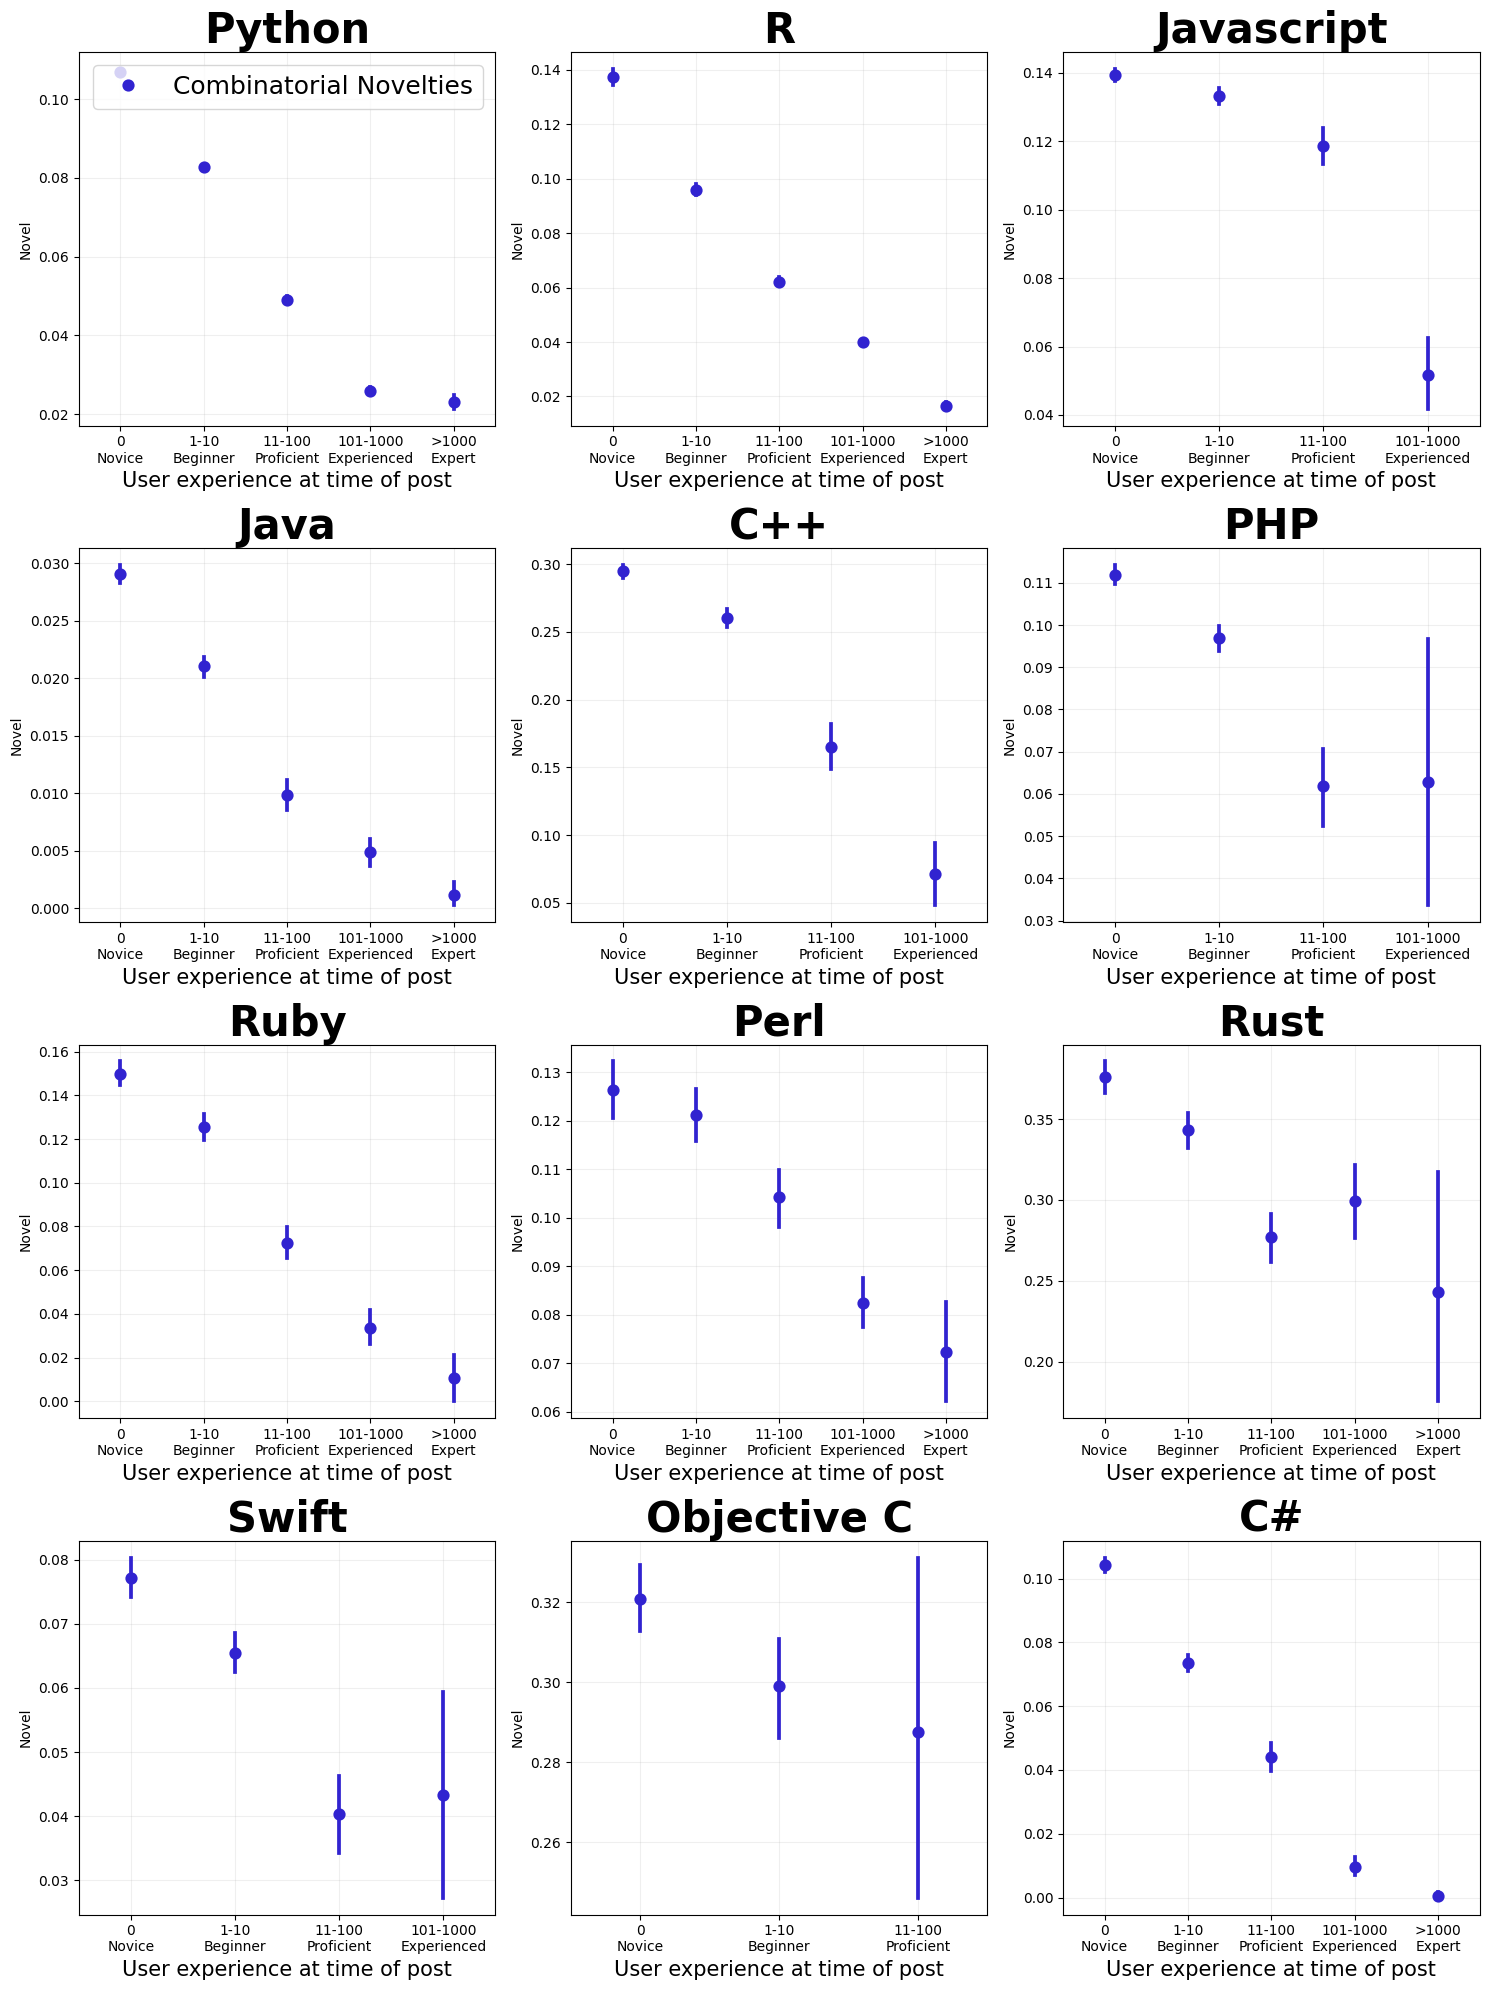

Processing python
	 Processing resource...
Processing r
	 Processing resource...
Processing javascript
	 Processing resource...
Processing java
	 Processing resource...
Processing cpp
	 Processing resource...
Processing php
	 Processing resource...
Processing ruby
	 Processing resource...
Processing perl
	 Processing resource...
Processing rust
	 Processing resource...
Processing swift
	 Processing resource...
Processing objectivec
	 Processing resource...
Processing c#
	 Processing resource...


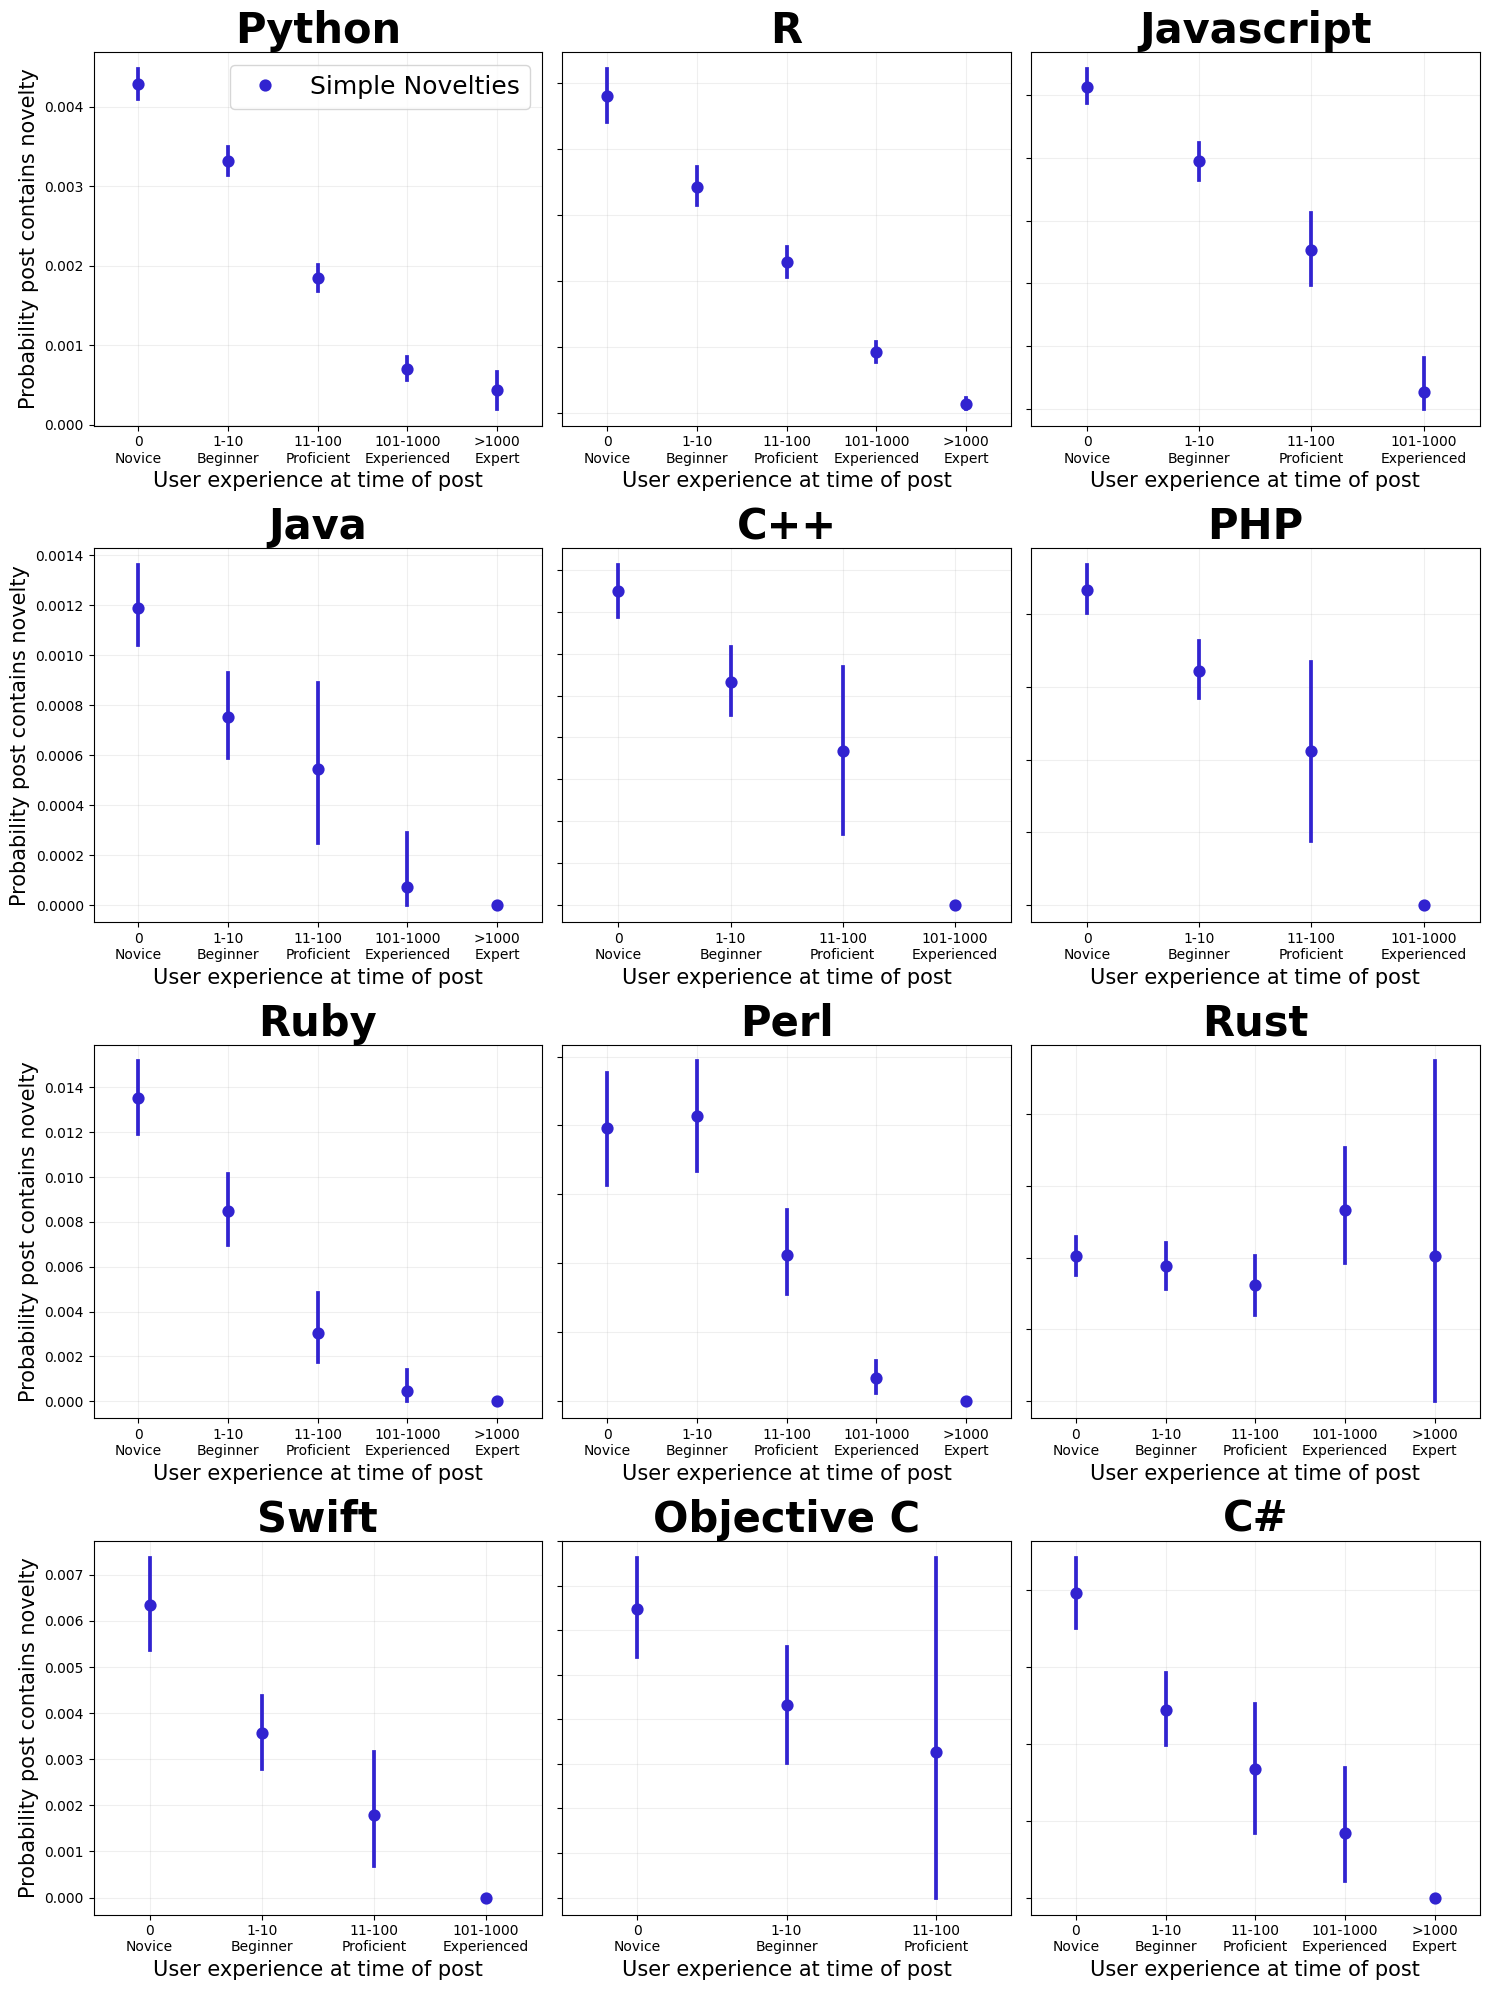

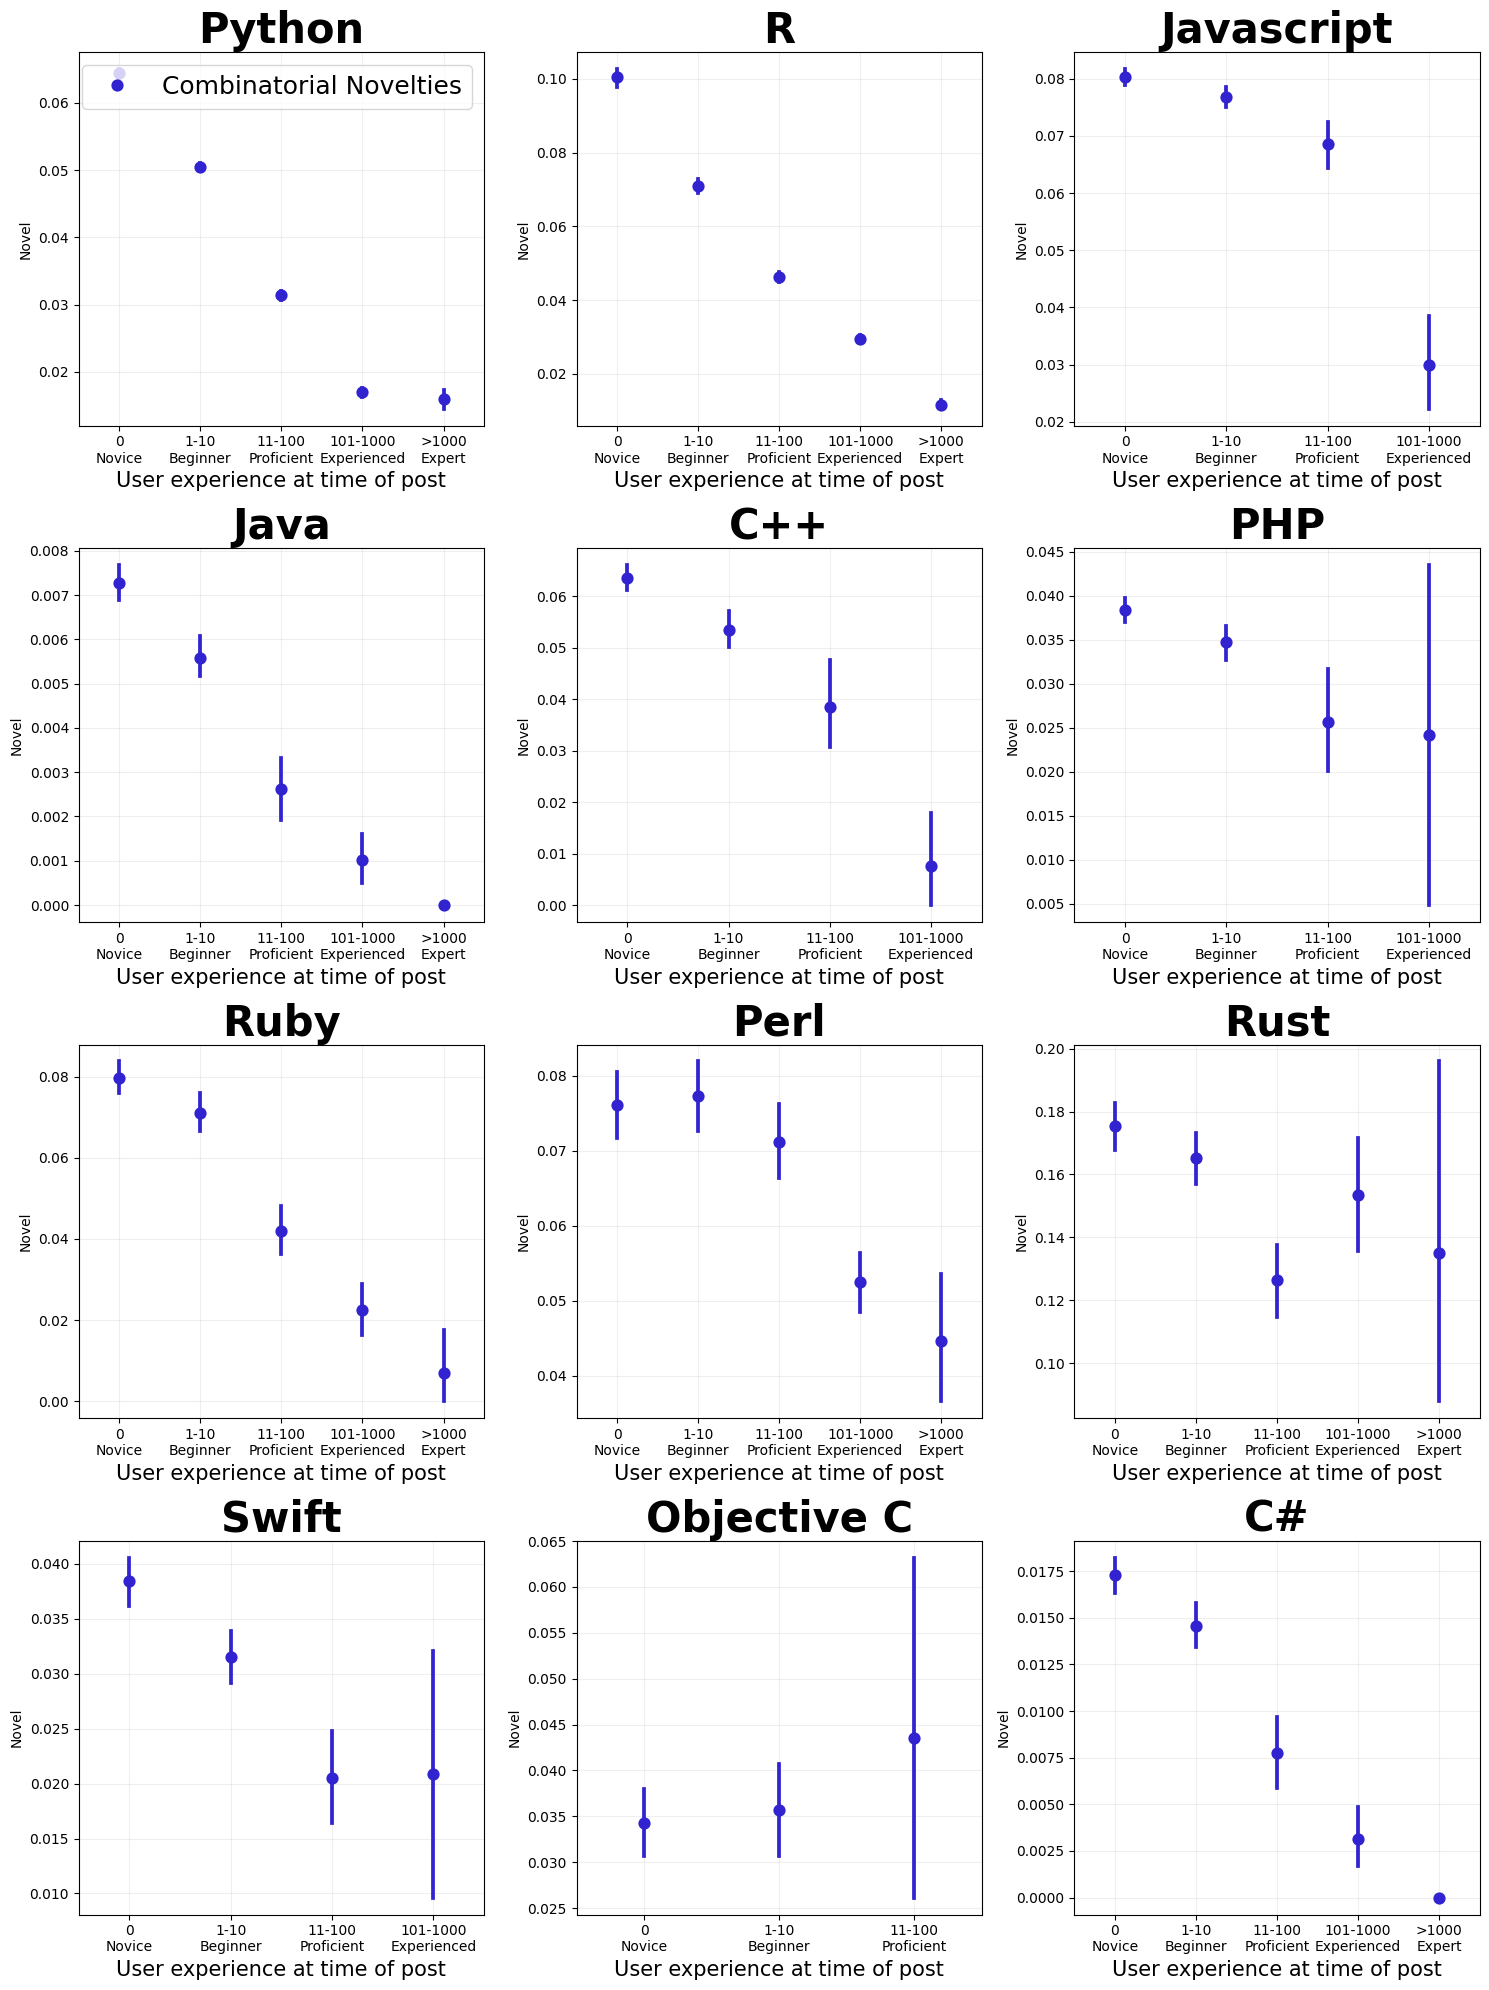

Processing python
	 Processing resource...
Processing r
	 Processing resource...
Processing javascript
	 Processing resource...
Processing java
	 Processing resource...
Processing cpp
	 Processing resource...
Processing php
	 Processing resource...
Processing ruby
	 Processing resource...
Processing perl
	 Processing resource...
Processing rust
	 Processing resource...
Processing swift
	 Processing resource...
Processing objectivec
	 Processing resource...
Processing c#
	 Processing resource...


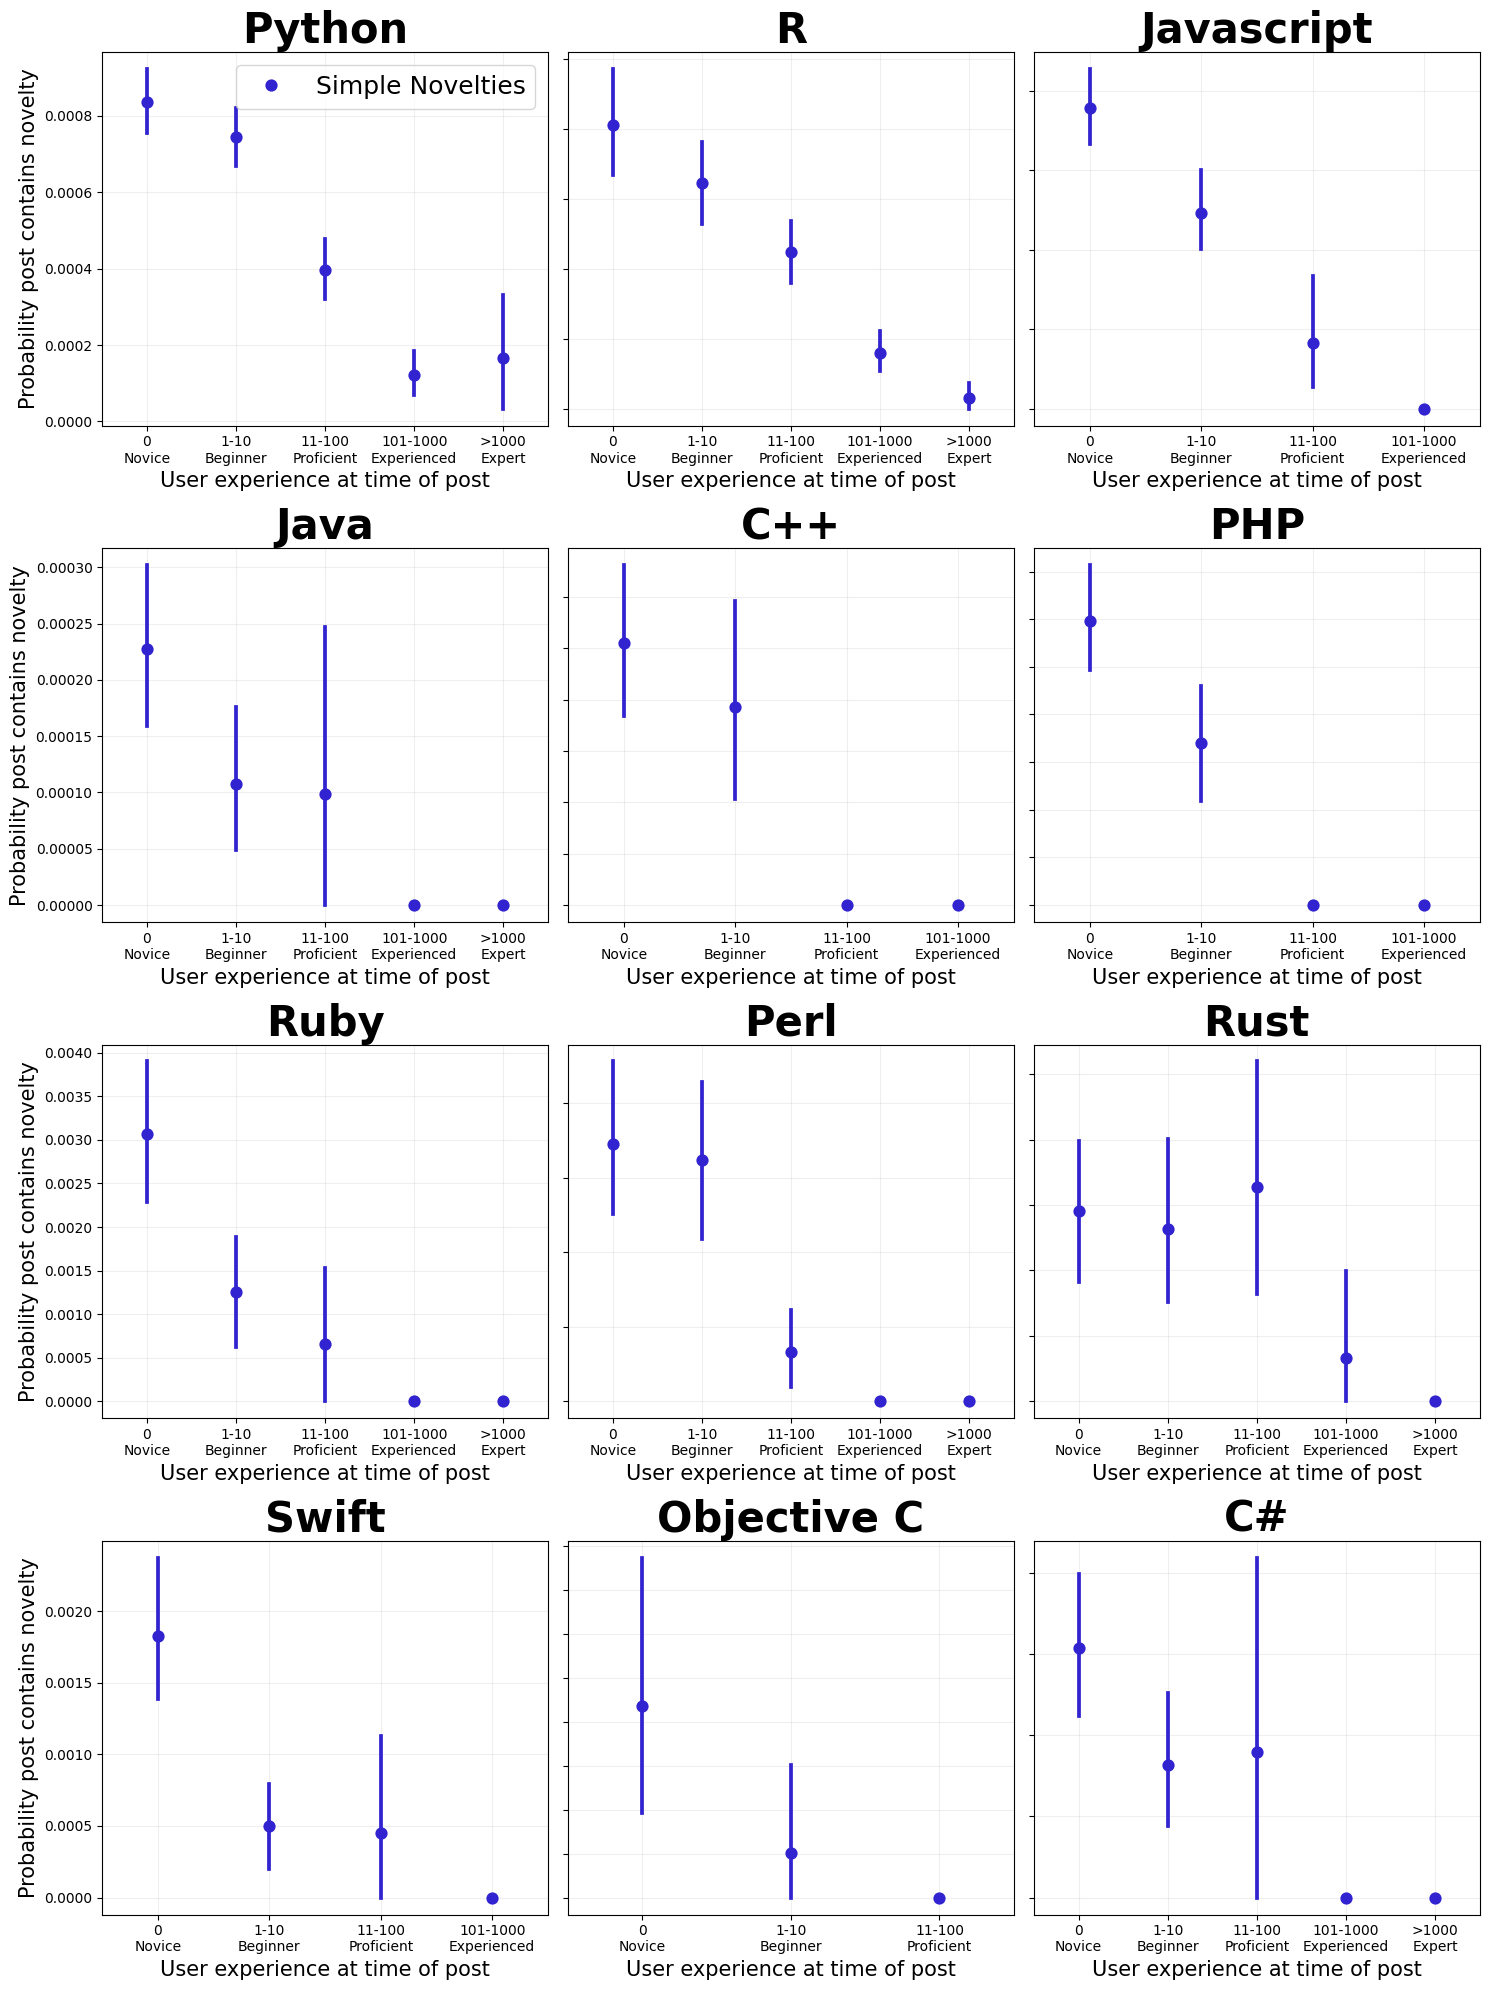

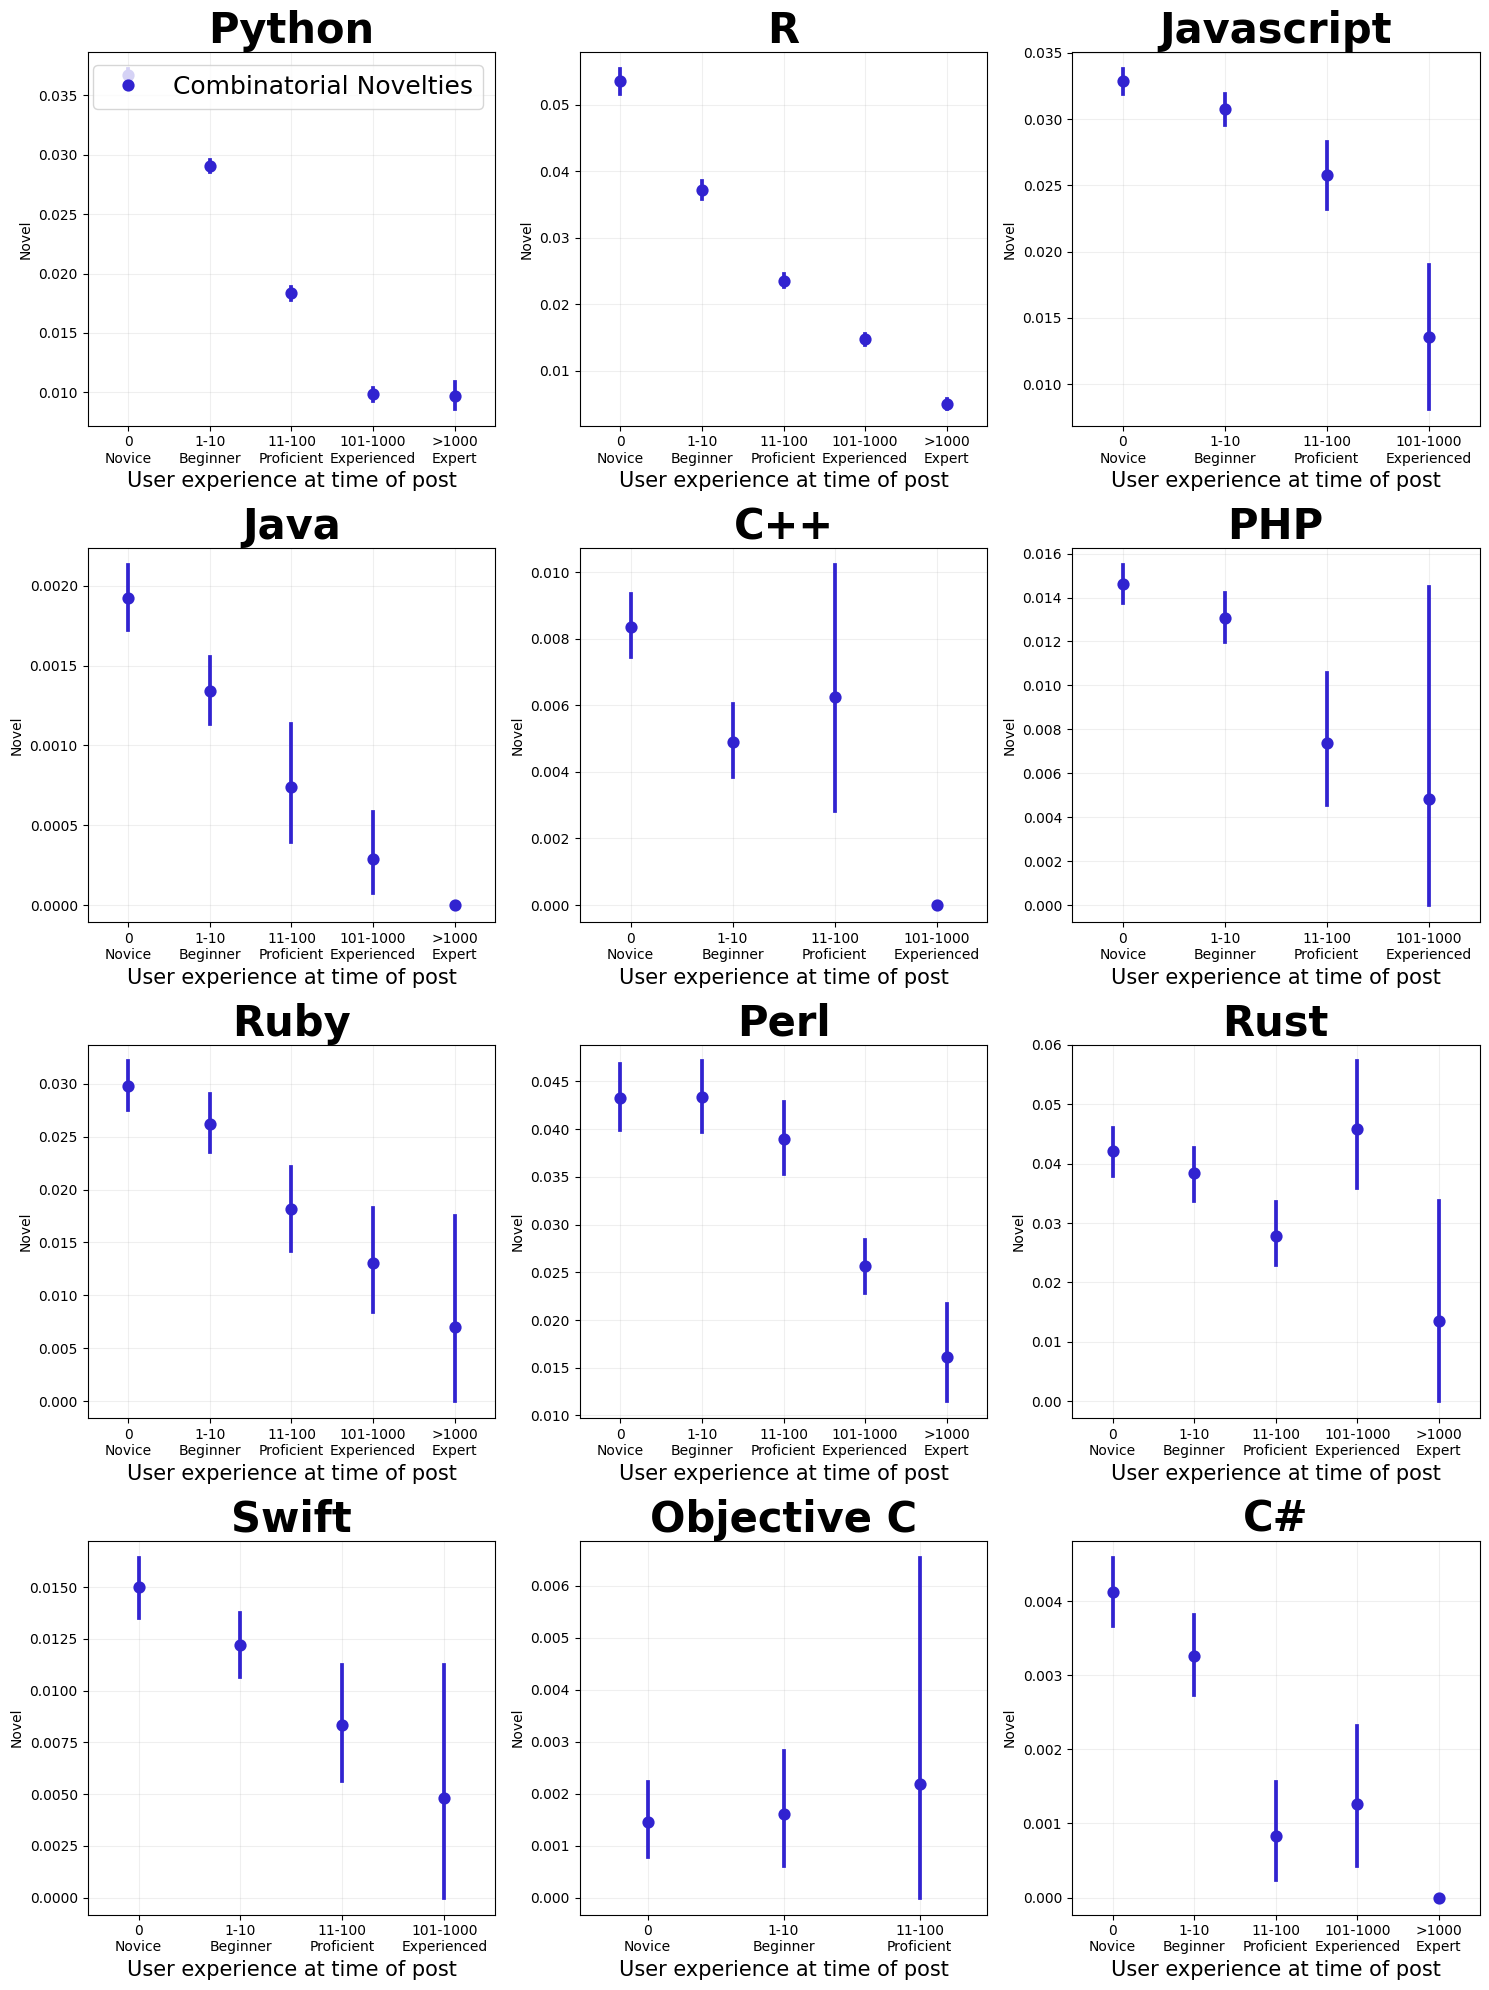

Processing python
	 Processing resource...
Processing r
	 Processing resource...
Processing javascript
	 Processing resource...
Processing java
	 Processing resource...
Processing cpp
	 Processing resource...
Processing php
	 Processing resource...
Processing ruby
	 Processing resource...
Processing perl
	 Processing resource...
Processing rust
	 Processing resource...
Processing swift
	 Processing resource...
Processing objectivec
	 Processing resource...
Processing c#
	 Processing resource...


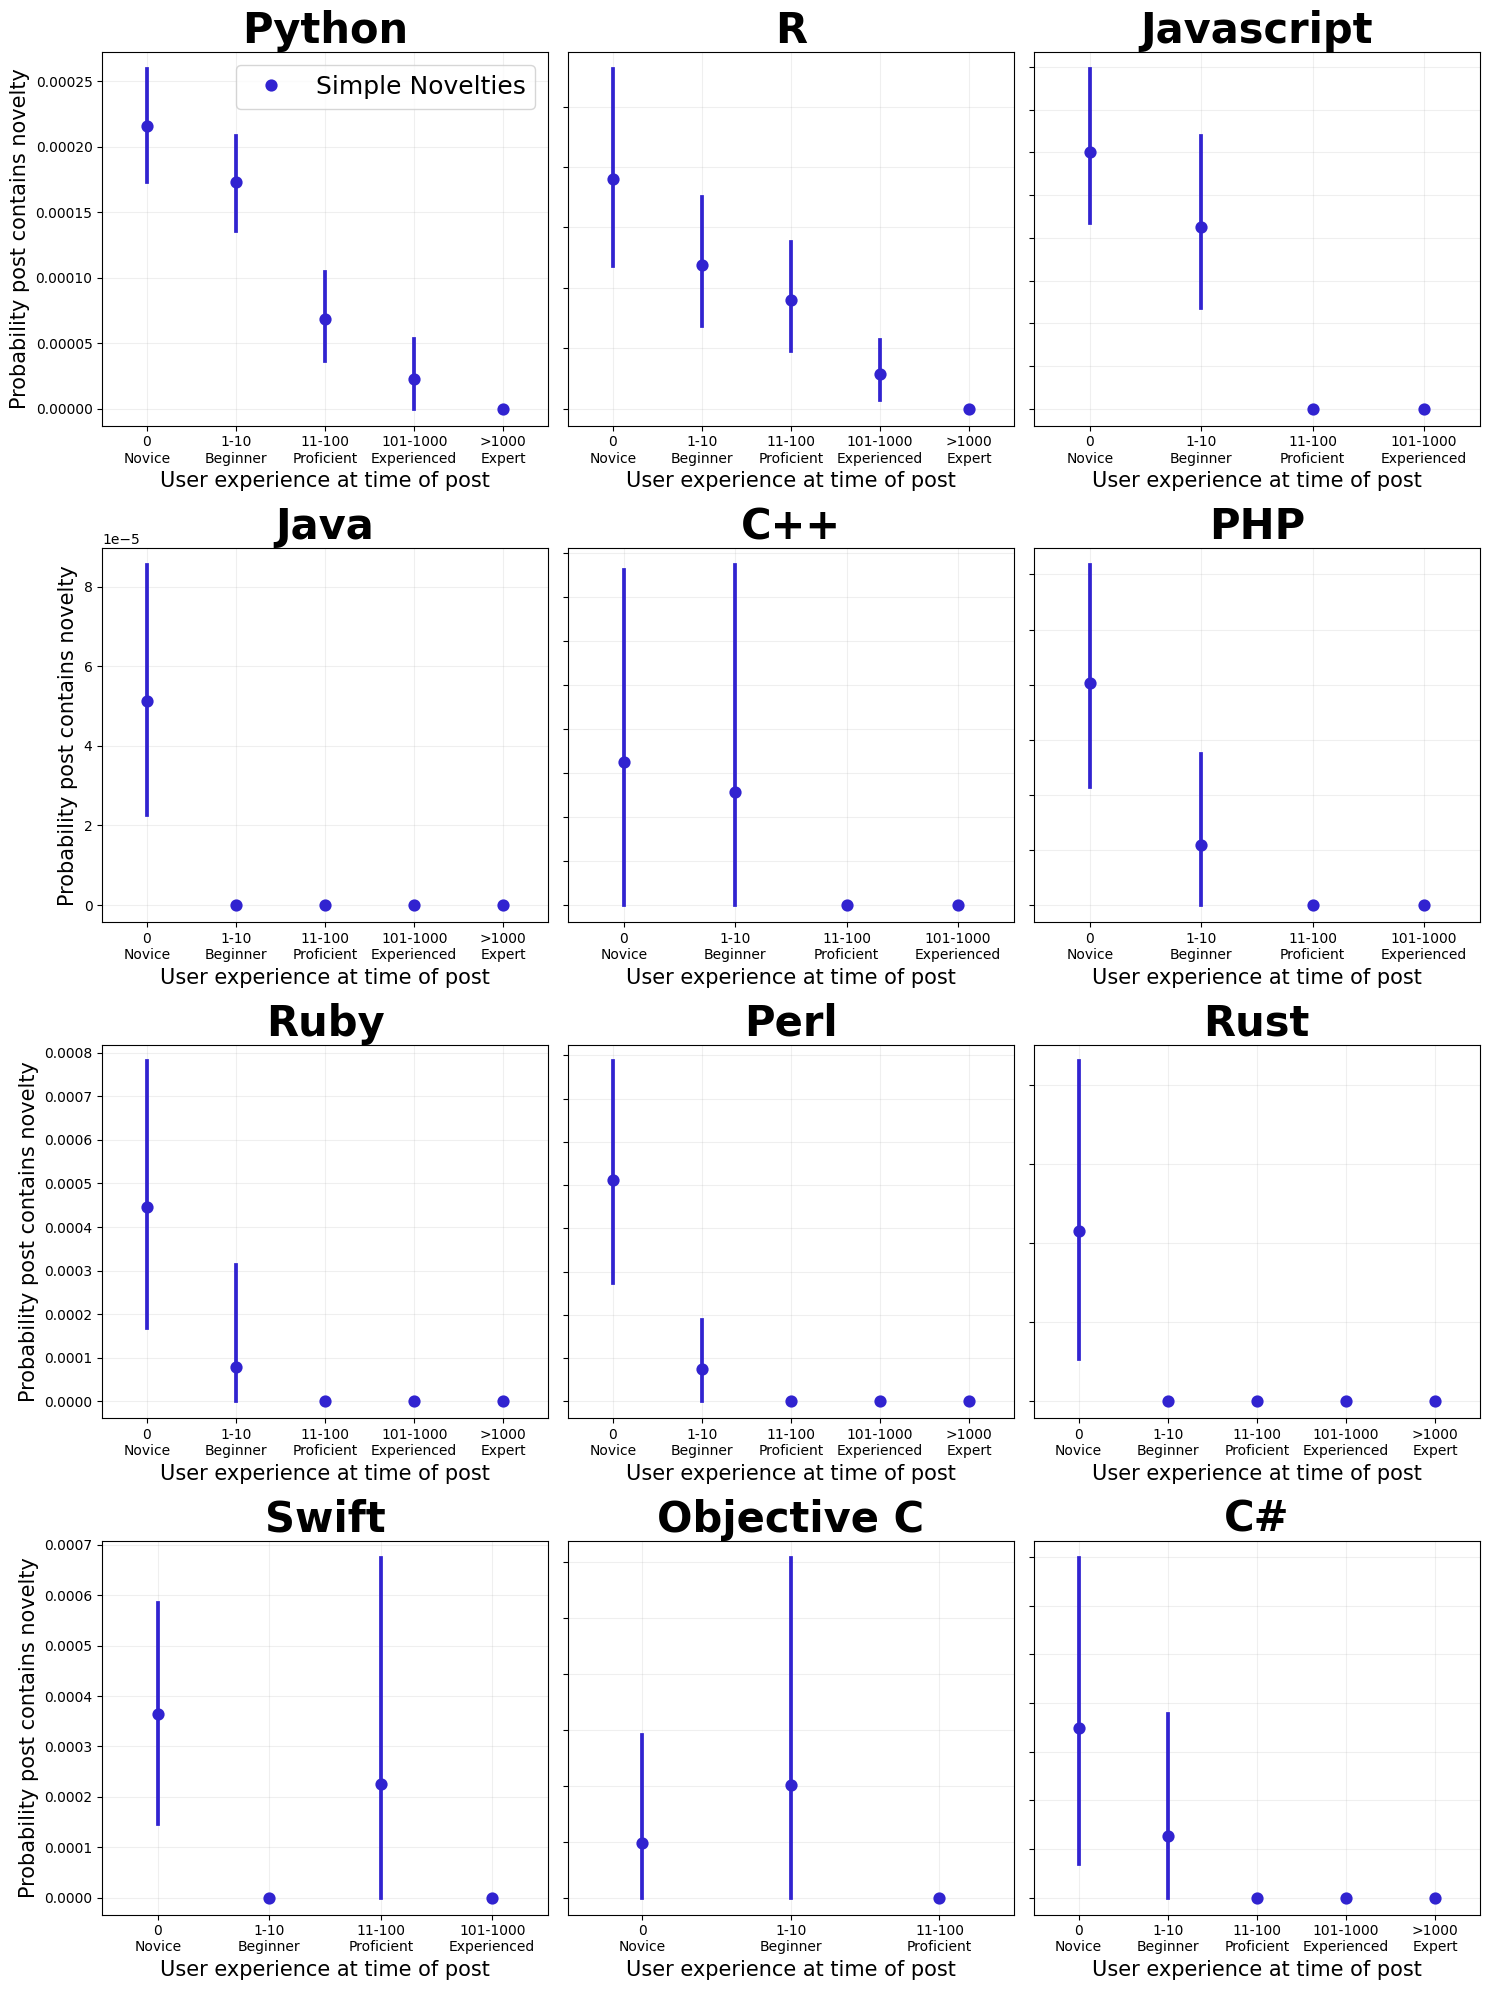

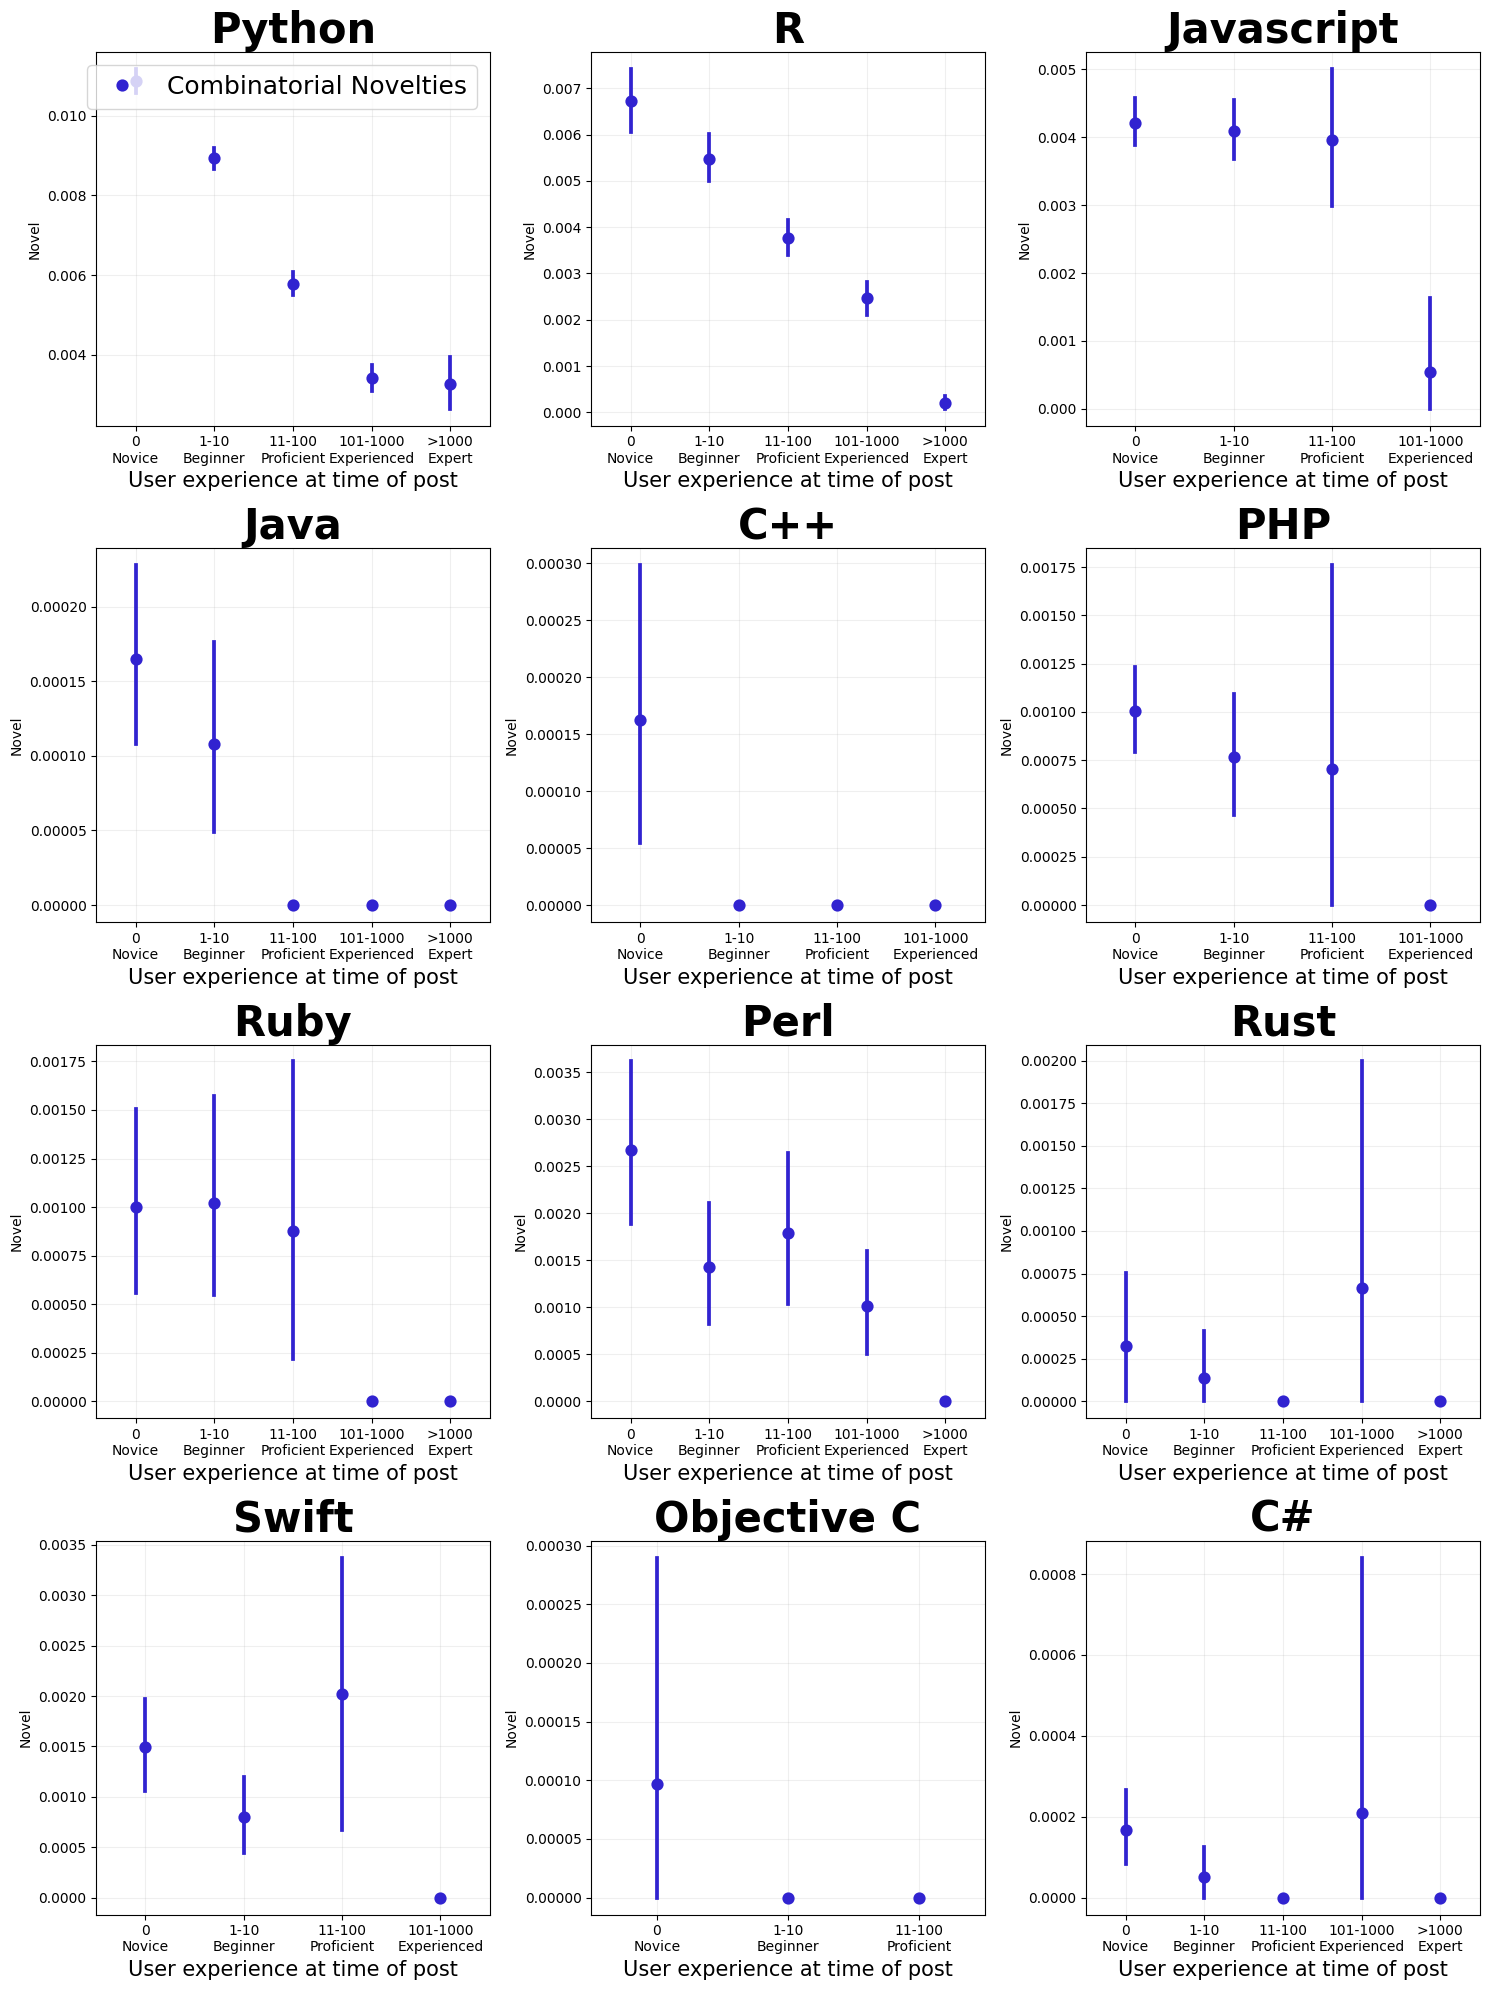

In [17]:
import json
import collections
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

%matplotlib inline

def get_user_category(number_of_previous_posts: int) -> str:
    if number_of_previous_posts == 0:
        return "0\nNovice"
    if 0 < number_of_previous_posts <= 10:
        return "1-10\nBeginner"
    if 10 < number_of_previous_posts <= 100:
        return "11-100\nProficient"
    if 100 < number_of_previous_posts <= 1000:
        return "101-1000\nExperienced"
    if 1000 < number_of_previous_posts:
        return ">1000\nExpert"
    raise ValueError(f"post count {number_of_previous_posts} should be a positive integer!")

# ---- Layout: 12 languages => 4 rows x 3 columns ----
ROWS, COLS = 4, 3
square_size = 5

for LIMIT in LIMITS:
    # Two separate figures: individuals and pairs
    fig_ind = plt.figure(figsize=(square_size * COLS, square_size * ROWS))
    gs_ind = GridSpec(ROWS, COLS, figure=fig_ind)

    fig_pair = plt.figure(figsize=(square_size * COLS, square_size * ROWS))
    gs_pair = GridSpec(ROWS, COLS, figure=fig_pair)

    # Optional: titles on top of figures
    #fig_ind.suptitle("12 languages all years individuals", fontsize=18, fontweight="bold", y=1.01)
    #fig_pair.suptitle("12 languages all years pairs", fontsize=18, fontweight="bold", y=1.01)

    TOTAL_INPUT = []  # kept because your original code had it

    for index, language in enumerate(LANGUAGES):
        print(f"Processing {language}")
        path_to_lib = f"data/results/{language}"

        print("\t Processing resource...")
        user_post_count = collections.defaultdict(int)

        libs_df_input = []
        pairs_df_input = []

        with open(f"{path_to_lib}/{language}_libs_count.json", "r") as handle:
            libs_count = json.load(handle)

        with open(f"{path_to_lib}/{language}_time_based_new.jsonl", "r") as handle:
            for line in handle:
                json_data = json.loads(line)
                TOTAL_INPUT.append(json_data)

                new_libs = [
                    item for item in json_data.get("new_libs", [])
                    if libs_count.get(item, 0) > LIMIT
                ]
                new_pairs = [
                    item for item in json_data.get("new_pairs", [])
                    if all(libs_count.get(lib_, 0) > LIMIT for lib_ in item.split("|"))
                ]

                category = get_user_category(user_post_count[json_data["user_id"]])

                libs_df_input.append([json_data["post_id"], bool(len(new_libs)), category])
                pairs_df_input.append([json_data["post_id"], bool(len(new_pairs)), category])

                user_post_count[json_data["user_id"]] += 1

        libs_df = pd.DataFrame(libs_df_input, columns=["Id", "Novel", "User_Type"])
        pairs_df = pd.DataFrame(pairs_df_input, columns=["Id", "Novel", "User_Type"])

        r, c = divmod(index, COLS)

        # ---- Individuals subplot ----
        ax_ind = fig_ind.add_subplot(gs_ind[r, c])
        sns.pointplot(
            data=libs_df,
            x="User_Type",
            y="Novel",
            linestyles="",
            ax=ax_ind,
            label="Simple Novelties",
            color=chrysler_blue,
        )
        ax_ind.set_title(f"{LANGUAGES[language]}", fontsize=30, fontweight="bold")
        ax_ind.set_xlabel("User experience at time of post", fontsize=15)
        if c == 0:
            ax_ind.set_ylabel("Probability post contains novelty", fontsize=15)
        else:
            ax_ind.set_ylabel("")
            ax_ind.tick_params(axis="y", labelleft=False)
        ax_ind.grid(alpha=0.2)
        ax_ind.tick_params(axis="x", rotation=0)

        # show legend only once (keeps plots cleaner)
        if index == 0:
            ax_ind.legend(fontsize=18, loc="upper right")
        else:
            leg = ax_ind.get_legend()
            if leg is not None:
                leg.remove()

        # ---- Pairs subplot ----
        ax_pair = fig_pair.add_subplot(gs_pair[r, c])
        sns.pointplot(
            data=pairs_df,
            x="User_Type",
            y="Novel",
            linestyles="",
            ax=ax_pair,
            label="Combinatorial Novelties",
            color=chrysler_blue,
        )
        ax_pair.set_title(f"{LANGUAGES[language]}", fontsize=30, fontweight="bold")
        ax_pair.set_xlabel("User experience at time of post", fontsize=15)
        if c == 0:
            ax_ind.set_ylabel("Probability post contains novelty", fontsize=15)
        else:
            ax_ind.set_ylabel("")
            ax_ind.tick_params(axis="y", labelleft=False)
        ax_pair.grid(alpha=0.2)
        ax_pair.tick_params(axis="x", rotation=0)

        if index == 0:
            ax_pair.legend(fontsize=18, loc="upper right")
        else:
            leg = ax_pair.get_legend()
            if leg is not None:
                leg.remove()

    # spacing + save
    fig_ind.tight_layout()
    fig_pair.tight_layout()

    # NOTE: if LIMITS has multiple values, these filenames would be overwritten each time.
    # If you want per-LIMIT files, change filenames to include LIMIT.
    fig_ind.savefig(f"experiences_flipped_12_languages_all_years_limit_{LIMIT}_individuals.png", dpi=300, bbox_inches="tight")
    fig_pair.savefig(f"experiences_flipped_12_languages_all_years_limit_{LIMIT}_pairs.png", dpi=300, bbox_inches="tight")

    plt.show()
